# Credit EDA Assignment

#### Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the    company.
It contains two types of scenarios:
1. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
2. All other cases: All other cases when the payment is paid on time.

### Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

 

#### Importing the libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

##  Data Cleaning 

#### Loading the Application Data set as df_app_data

In [6]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)

In [7]:
#read the data set of "application data" in df_app_data.
df_app_data = pd.read_csv("application_data.csv")
df_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
df_app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
df_app_data.shape

(307511, 122)

In [10]:
df_app_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
len(df_app_data)

307511

### Handling missing values

In [15]:
df_app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [16]:
#percencentage of missing value in application data
#100*(df_app_data.isnull().sum()/len(df_app_data))
df_app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [17]:
(df_app_data.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [18]:
# setting a threshold value 40 that means columns having more than 40% missing values
threshold_value= 40
columns_drop =list(df_app_data.columns[100*df_app_data.isnull().mean()>threshold_value])
print(columns_drop)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [19]:
#Dropping the columns having more than 40% missing values
df_app_data=df_app_data.drop(columns_drop,axis=1)

In [20]:
df_app_data.shape

(307511, 73)

In [21]:
#Checking missing value % after dropping columns
df_app_data.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [22]:
(df_app_data.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [24]:
df_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### Handling the missing values of OCCUPATION_TYPE 

In [26]:
df_app_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [27]:
df_app_data.shape

(307511, 73)

In [32]:
#imputing missing values with 'Missing'
df_app_data['OCCUPATION_TYPE'] = df_app_data['OCCUPATION_TYPE'].replace(np.nan, "Missing")

In [35]:
df_app_data['OCCUPATION_TYPE'].isnull().sum()

0

#### Handling the missing values of EXT_SOURCE_2 and EXT_SOURCE_3 

In [42]:
#Imputing missing values by mean

In [49]:
df_app_data['EXT_SOURCE_2'].describe()  

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [52]:
df_app_data['EXT_SOURCE_2'].value_counts()

EXT_SOURCE_2
0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: count, Length: 119831, dtype: int64

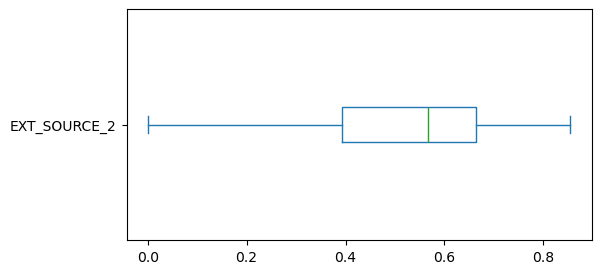

In [54]:
plt.figure(figsize=(6,3))
df_app_data['EXT_SOURCE_2'].plot.box(vert=False)
plt.show()

In [56]:
df_app_data['EXT_SOURCE_2'].mean()

0.5143926741308462

In [58]:
df_app_data['EXT_SOURCE_2'] = df_app_data['EXT_SOURCE_2'].fillna(df_app_data['EXT_SOURCE_2'].mean())

In [60]:
df_app_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

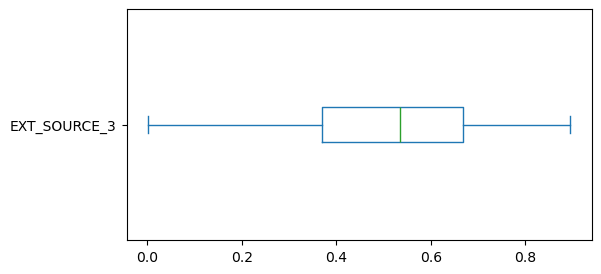

In [62]:
plt.figure(figsize=(6,3))
df_app_data['EXT_SOURCE_3'].plot.box(vert=False)
plt.show()
# as there are no outliers so we can fill nan values with mean. mean and median are very close that means data is distributed uniformly

In [64]:
df_app_data['EXT_SOURCE_3'].mean()

0.5108529061799658

In [66]:
df_app_data['EXT_SOURCE_3'] = df_app_data['EXT_SOURCE_3'].fillna(df_app_data['EXT_SOURCE_3'].mean())

In [68]:
df_app_data['EXT_SOURCE_3'].isnull().sum()

0

#### Handling the missing values of 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'

##### Imputing missing values by mode as we can see from box plot.

In [72]:
df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: >

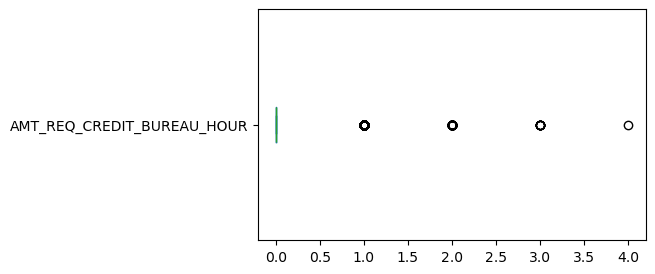

In [74]:
plt.figure(figsize=(5,3))
df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.box(vert=False)

In [76]:
df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

In [78]:
df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])

In [80]:
df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [82]:
df_app_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<Axes: >

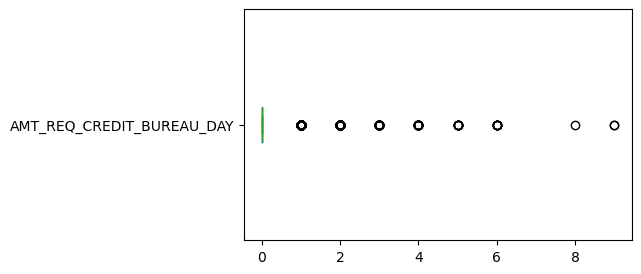

In [84]:
plt.figure(figsize=(5,3))
df_app_data['AMT_REQ_CREDIT_BUREAU_DAY'].plot.box(vert=False)

In [86]:
df_app_data['AMT_REQ_CREDIT_BUREAU_DAY'] = df_app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])

In [88]:
df_app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [90]:
df_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<Axes: >

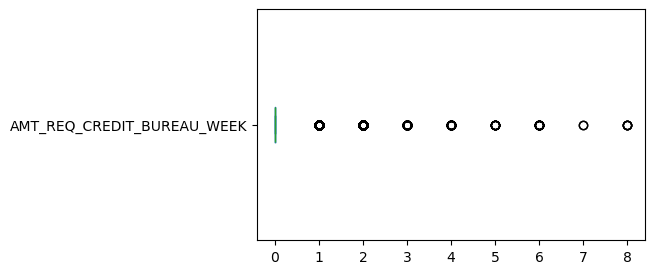

In [92]:
plt.figure(figsize=(5,3))
df_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.box(vert=False)

In [94]:
df_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])

In [96]:
df_app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [98]:
df_app_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Axes: >

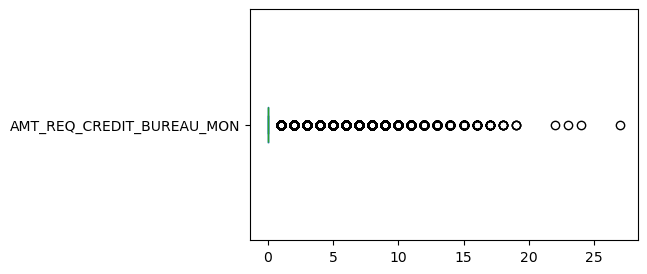

In [100]:
plt.figure(figsize=(5,3))
df_app_data['AMT_REQ_CREDIT_BUREAU_MON'].plot.box(vert=False)

In [101]:
df_app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]

0.0

In [104]:
df_app_data['AMT_REQ_CREDIT_BUREAU_MON'] = df_app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])

In [106]:
df_app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [108]:
df_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [110]:
df_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

0.0

<Axes: >

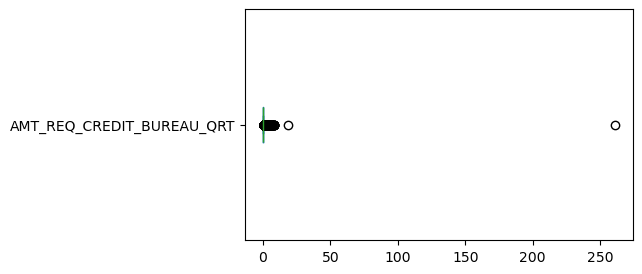

In [112]:
plt.figure(figsize=(5,3))
df_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].plot.box(vert=False)

In [113]:
df_app_data['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])

In [116]:
df_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [118]:
df_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<Axes: >

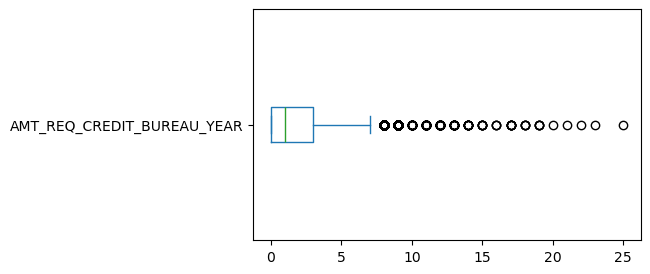

In [120]:
plt.figure(figsize=(5,3))
df_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.box(vert=False)

In [122]:
df_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]

0.0

In [124]:
df_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])

In [126]:
df_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [128]:
df_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

#### Handling the missing values of 'AMT_ANNUITY','AMT_GOODS_PRICE'

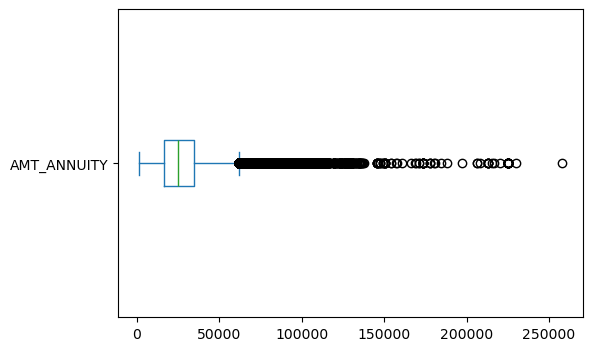

In [131]:
plt.figure(figsize=(6,4))
df_app_data['AMT_ANNUITY'].plot.box(vert=False)
plt.show()

In [133]:
df_app_data['AMT_ANNUITY'].describe()    

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [135]:
df_app_data['AMT_ANNUITY'].mode()

0    9000.0
Name: AMT_ANNUITY, dtype: float64

In [137]:
df_app_data['AMT_ANNUITY'].median()

24903.0

In [139]:
#As we can see there are many outliers so imputing missing value with median rather then mean.
df_app_data['AMT_ANNUITY'] = df_app_data['AMT_ANNUITY'].fillna(df_app_data['AMT_ANNUITY'].median())

In [141]:
df_app_data['AMT_ANNUITY'].isnull().sum()

0

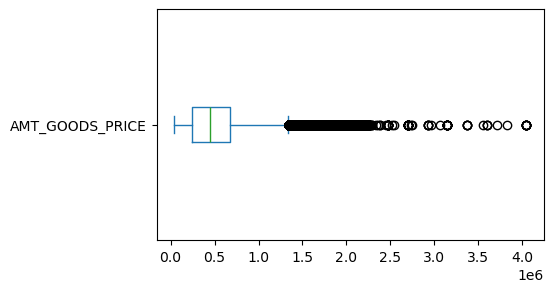

In [143]:
plt.figure(figsize=(5,3))
df_app_data['AMT_GOODS_PRICE'].plot.box(vert=False) 
plt.show()

In [145]:
df_app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [147]:
df_app_data['AMT_GOODS_PRICE'].median()

450000.0

In [149]:
#there are outliers present as we can see from box plot so imputing missing value by median
df_app_data['AMT_GOODS_PRICE'] = df_app_data['AMT_GOODS_PRICE'].fillna(df_app_data['AMT_GOODS_PRICE'].median())

In [151]:
df_app_data['AMT_GOODS_PRICE'].isnull().sum()

0

### Handling the missing values of 'CNT_FAM_MEMBERS' and 'DAYS_LAST_PHONE_CHANGE'

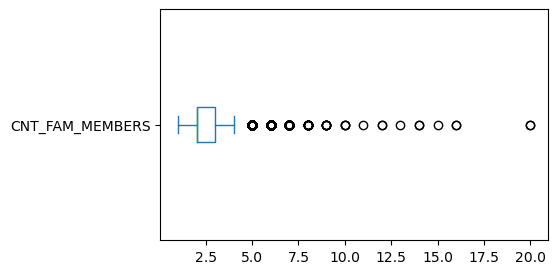

In [154]:
plt.figure(figsize=(5,3))
df_app_data['CNT_FAM_MEMBERS'].plot.box(vert=False)
plt.show()

In [156]:
#there are outliers present as we can see from box plot so imputing missing value by median
df_app_data['CNT_FAM_MEMBERS']= df_app_data['CNT_FAM_MEMBERS'].fillna(df_app_data['CNT_FAM_MEMBERS'].median())

In [158]:
df_app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

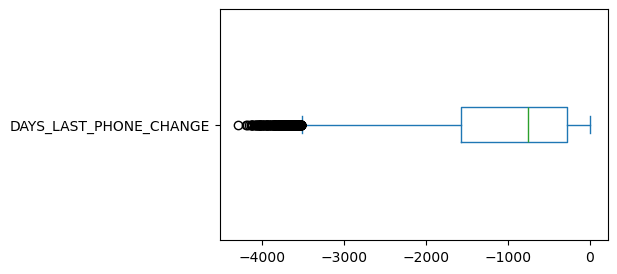

In [160]:
plt.figure(figsize=(5,3))
df_app_data['DAYS_LAST_PHONE_CHANGE'].plot.box(vert=False)
plt.show()

In [162]:
#outliers are there so best choice is to impute with median
df_app_data['DAYS_LAST_PHONE_CHANGE']= df_app_data['DAYS_LAST_PHONE_CHANGE'].fillna(df_app_data['DAYS_LAST_PHONE_CHANGE'].median())

In [164]:
df_app_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [166]:
df_app_data.isnull().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.004201
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


### Now we can see there are no missing values left in columns.

Checking the correlation between these 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',     'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR' columns

In [170]:
CREDIT_BUREAU_COLS = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [172]:
corr_credit = df_app_data[CREDIT_BUREAU_COLS].corr()
corr_credit

AMT_REQ_CREDIT_BUREAU_HOUR  \
AMT_REQ_CREDIT_BUREAU_HOUR                    1.000000   
AMT_REQ_CREDIT_BUREAU_DAY                     0.230873   
AMT_REQ_CREDIT_BUREAU_WEEK                    0.006422   
AMT_REQ_CREDIT_BUREAU_MON                     0.002973   
AMT_REQ_CREDIT_BUREAU_QRT                     0.000725   
AMT_REQ_CREDIT_BUREAU_YEAR                    0.005508   

                            AMT_REQ_CREDIT_BUREAU_DAY  \
AMT_REQ_CREDIT_BUREAU_HOUR                   0.230873   
AMT_REQ_CREDIT_BUREAU_DAY                    1.000000   
AMT_REQ_CREDIT_BUREAU_WEEK                   0.218370   
AMT_REQ_CREDIT_BUREAU_MON                   -0.002750   
AMT_REQ_CREDIT_BUREAU_QRT                   -0.001551   
AMT_REQ_CREDIT_BUREAU_YEAR                   0.004981   

                            AMT_REQ_CREDIT_BUREAU_WEEK  \
AMT_REQ_CREDIT_BUREAU_HOUR                    0.006422   
AMT_REQ_CREDIT_BUREAU_DAY                     0.218370   
AMT_REQ_CREDIT_BUREAU_WEEK                    1.000000   
AMT_REQ_CREDIT_BUREAU_MON                    -0.007423   
AMT_REQ_CREDIT_BUREAU_QRT                    -0.007466   
AMT_REQ_CREDIT_BUREAU_YEAR                    0.039229   

                            AMT_REQ_CREDIT_BUREAU_MON  \
AMT_REQ_CREDIT_BUREAU_HOUR                   0.002973   
AMT_REQ_CREDIT_BUREAU_DAY                   -0.002750   
AMT_REQ_CREDIT_BUREAU_WEEK                  -0.007423   
AMT_REQ_CREDIT_BUREAU_MON                    1.000000   
AMT_REQ_CREDIT_BUREAU_QRT                    0.005318   
AMT_REQ_CREDIT_BUREAU_YEAR                   0.032681   

                            AMT_REQ_CREDIT_BUREAU_QRT  \
AMT_REQ_CREDIT_BUREAU_HOUR                   0.000725   
AMT_REQ_CREDIT_BUREAU_DAY                   -0.001551   
AMT_REQ_CREDIT_BUREAU_WEEK                  -0.007466   
AMT_REQ_CREDIT_BUREAU_MON                    0.005318   
AMT_REQ_CREDIT_BUREAU_QRT                    1.000000   
AMT_REQ_CREDIT_BUREAU_YEAR                   0.113519   

                            AMT_REQ_CREDIT_BUREAU_YEAR  
AMT_REQ_CREDIT_BUREAU_HOUR                    0.005508  
AMT_REQ_CREDIT_BUREAU_DAY                     0.004981  
AMT_REQ_CREDIT_BUREAU_WEEK                    0.039229  
AMT_REQ_CREDIT_BUREAU_MON                     0.032681  
AMT_REQ_CREDIT_BUREAU_QRT                     0.113519  
AMT_REQ_CREDIT_BUREAU_YEAR                    1.000000

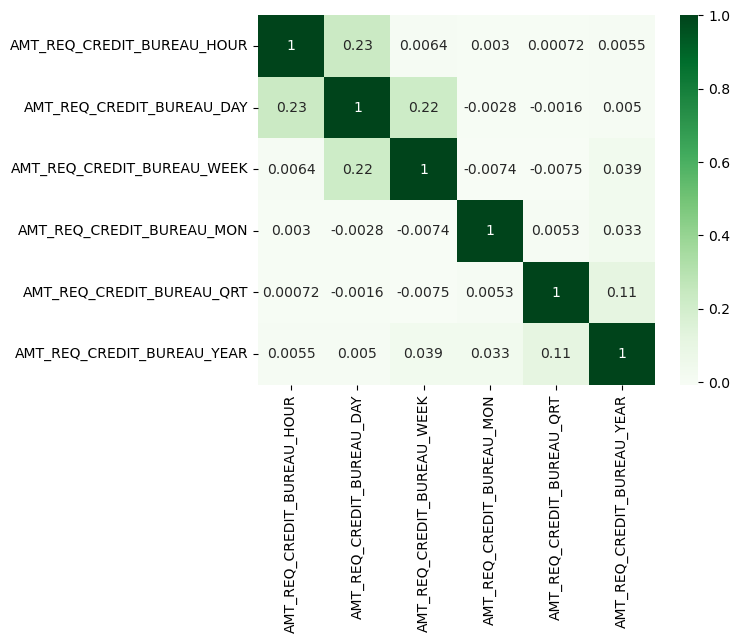

In [174]:
sns.heatmap(corr_credit,annot = True,cmap='Greens')
plt.show()

In [175]:
corr_credit_target = df_app_data[['TARGET'] + [i for i in corr_credit]].corr()
corr_credit_target

TARGET  AMT_REQ_CREDIT_BUREAU_HOUR  \
TARGET                      1.000000                   -0.000074   
AMT_REQ_CREDIT_BUREAU_HOUR -0.000074                    1.000000   
AMT_REQ_CREDIT_BUREAU_DAY   0.001701                    0.230873   
AMT_REQ_CREDIT_BUREAU_WEEK -0.001306                    0.006422   
AMT_REQ_CREDIT_BUREAU_MON  -0.014794                    0.002973   
AMT_REQ_CREDIT_BUREAU_QRT  -0.005833                    0.000725   
AMT_REQ_CREDIT_BUREAU_YEAR  0.005522                    0.005508   

                            AMT_REQ_CREDIT_BUREAU_DAY  \
TARGET                                       0.001701   
AMT_REQ_CREDIT_BUREAU_HOUR                   0.230873   
AMT_REQ_CREDIT_BUREAU_DAY                    1.000000   
AMT_REQ_CREDIT_BUREAU_WEEK                   0.218370   
AMT_REQ_CREDIT_BUREAU_MON                   -0.002750   
AMT_REQ_CREDIT_BUREAU_QRT                   -0.001551   
AMT_REQ_CREDIT_BUREAU_YEAR                   0.004981   

                            AMT_REQ_CREDIT_BUREAU_WEEK  \
TARGET                                       -0.001306   
AMT_REQ_CREDIT_BUREAU_HOUR                    0.006422   
AMT_REQ_CREDIT_BUREAU_DAY                     0.218370   
AMT_REQ_CREDIT_BUREAU_WEEK                    1.000000   
AMT_REQ_CREDIT_BUREAU_MON                    -0.007423   
AMT_REQ_CREDIT_BUREAU_QRT                    -0.007466   
AMT_REQ_CREDIT_BUREAU_YEAR                    0.039229   

                            AMT_REQ_CREDIT_BUREAU_MON  \
TARGET                                      -0.014794   
AMT_REQ_CREDIT_BUREAU_HOUR                   0.002973   
AMT_REQ_CREDIT_BUREAU_DAY                   -0.002750   
AMT_REQ_CREDIT_BUREAU_WEEK                  -0.007423   
AMT_REQ_CREDIT_BUREAU_MON                    1.000000   
AMT_REQ_CREDIT_BUREAU_QRT                    0.005318   
AMT_REQ_CREDIT_BUREAU_YEAR                   0.032681   

                            AMT_REQ_CREDIT_BUREAU_QRT  \
TARGET                                      -0.005833   
AMT_REQ_CREDIT_BUREAU_HOUR                   0.000725   
AMT_REQ_CREDIT_BUREAU_DAY                   -0.001551   
AMT_REQ_CREDIT_BUREAU_WEEK                  -0.007466   
AMT_REQ_CREDIT_BUREAU_MON                    0.005318   
AMT_REQ_CREDIT_BUREAU_QRT                    1.000000   
AMT_REQ_CREDIT_BUREAU_YEAR                   0.113519   

                            AMT_REQ_CREDIT_BUREAU_YEAR  
TARGET                                        0.005522  
AMT_REQ_CREDIT_BUREAU_HOUR                    0.005508  
AMT_REQ_CREDIT_BUREAU_DAY                     0.004981  
AMT_REQ_CREDIT_BUREAU_WEEK                    0.039229  
AMT_REQ_CREDIT_BUREAU_MON                     0.032681  
AMT_REQ_CREDIT_BUREAU_QRT                     0.113519  
AMT_REQ_CREDIT_BUREAU_YEAR                    1.000000

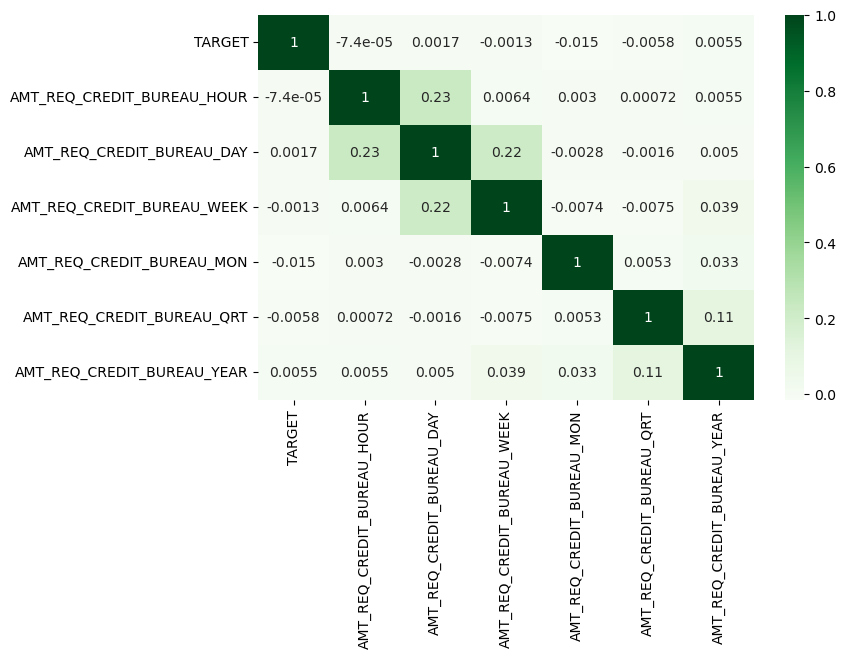

In [178]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_credit_target,annot = True,cmap='Greens')
plt.show()

We can observe that there is not significant correlation so we can drop some of these column as they hold same kind of information also. we can consider these 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR' as these will be helpful to check creditworthiness while week,day,hour information are less relevant. 

In [181]:
#Dropping 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK' these columns	
df_app_data = df_app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'],axis=1)

Now we can see that there are 19 columns of named FLAG_DOCUMENT 2 to 21 .so we can check correlation w.r.t TARGET variable.If there are no as such correalation then we can drop some of.

#### Finding correlation between FLAG_DOCUMENT with TARGET variable

In [185]:
flag_doc_cols =['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [187]:
corr_flag = df_app_data[flag_doc_cols].corr()
corr_flag

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
FLAG_DOCUMENT_2          1.000000        -0.010174        -0.000059   
FLAG_DOCUMENT_3         -0.010174         1.000000        -0.014110   
FLAG_DOCUMENT_4         -0.000059        -0.014110         1.000000   
FLAG_DOCUMENT_5         -0.000805        -0.193850        -0.001117   
FLAG_DOCUMENT_6         -0.002020        -0.486238        -0.002802   
FLAG_DOCUMENT_7         -0.000090        -0.021677        -0.000125   
FLAG_DOCUMENT_8         -0.001935        -0.465730        -0.002684   
FLAG_DOCUMENT_9         -0.000407        -0.097859        -0.000564   
FLAG_DOCUMENT_10        -0.000031        -0.007466        -0.000043   
FLAG_DOCUMENT_11        -0.000407        -0.093242        -0.000565   
FLAG_DOCUMENT_12        -0.000017        -0.001180        -0.000023   
FLAG_DOCUMENT_13        -0.000387        -0.020274        -0.000536   
FLAG_DOCUMENT_14        -0.000353         0.002099        -0.000489   
FLAG_DOCUMENT_15        -0.000226         0.000592        -0.000314   
FLAG_DOCUMENT_16        -0.000651         0.033418        -0.000903   
FLAG_DOCUMENT_17        -0.000106         0.002536        -0.000147   
FLAG_DOCUMENT_18        -0.000589         0.007976        -0.000816   
FLAG_DOCUMENT_19        -0.000159         0.009423        -0.000220   
FLAG_DOCUMENT_20        -0.000146         0.007396        -0.000203   
FLAG_DOCUMENT_21        -0.000119        -0.025510        -0.000165   

                  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
FLAG_DOCUMENT_2         -0.000805        -0.002020        -0.000090   
FLAG_DOCUMENT_3         -0.193850        -0.486238        -0.021677   
FLAG_DOCUMENT_4         -0.001117        -0.002802        -0.000125   
FLAG_DOCUMENT_5          1.000000        -0.038495        -0.001716   
FLAG_DOCUMENT_6         -0.038495         1.000000        -0.004305   
FLAG_DOCUMENT_7         -0.001716        -0.004305         1.000000   
FLAG_DOCUMENT_8         -0.036871        -0.092485        -0.004123   
FLAG_DOCUMENT_9         -0.007747        -0.019433        -0.000866   
FLAG_DOCUMENT_10        -0.000591        -0.001483        -0.000066   
FLAG_DOCUMENT_11        -0.007764        -0.018738        -0.000868   
FLAG_DOCUMENT_12        -0.000316        -0.000792        -0.000035   
FLAG_DOCUMENT_13        -0.007368        -0.017514        -0.000824   
FLAG_DOCUMENT_14        -0.006723        -0.014318        -0.000752   
FLAG_DOCUMENT_15        -0.004311        -0.009824        -0.000482   
FLAG_DOCUMENT_16        -0.012137        -0.026603        -0.001387   
FLAG_DOCUMENT_17        -0.002023        -0.004372        -0.000226   
FLAG_DOCUMENT_18        -0.010622        -0.023915        -0.001254   
FLAG_DOCUMENT_19        -0.003023        -0.004759        -0.000338   
FLAG_DOCUMENT_20        -0.002791        -0.005981        -0.000312   
FLAG_DOCUMENT_21         0.000645        -0.005688        -0.000254   

                  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
FLAG_DOCUMENT_2         -0.001935        -0.000407         -0.000031   
FLAG_DOCUMENT_3         -0.465730        -0.097859         -0.007466   
FLAG_DOCUMENT_4         -0.002684        -0.000564         -0.000043   
FLAG_DOCUMENT_5         -0.036871        -0.007747         -0.000591   
FLAG_DOCUMENT_6         -0.092485        -0.019433         -0.001483   
FLAG_DOCUMENT_7         -0.004123        -0.000866         -0.000066   
FLAG_DOCUMENT_8          1.000000        -0.018613         -0.001420   
FLAG_DOCUMENT_9         -0.018613         1.000000         -0.000298   
FLAG_DOCUMENT_10        -0.001420        -0.000298          1.000000   
FLAG_DOCUMENT_11        -0.017509        -0.003919         -0.000299   
FLAG_DOCUMENT_12         0.003905        -0.000159         -0.000012   
FLAG_DOCUMENT_13         0.077019         0.000684         -0.000284   
FLAG_DOCUMENT_14         0.030228         0.001430         -0.000259   
FLAG_DOCUMENT_15         0

In [188]:
# plt.figure(figsize=(22,14))
# sns.heatmap(corr_flag,annot = True,cmap='Greens')
# plt.show()

In [191]:
#corr_flag_target = df_app_data[['TARGET'] + [f'FLAG_DOCUMENT_{i}' for i in range(2,22)]].corr()
corr_flag_target = df_app_data[['TARGET'] + [i for i in flag_doc_cols]].corr() 
corr_flag_target

TARGET  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
TARGET            1.000000         0.005417         0.044346        -0.002672   
FLAG_DOCUMENT_2   0.005417         1.000000        -0.010174        -0.000059   
FLAG_DOCUMENT_3   0.044346        -0.010174         1.000000        -0.014110   
FLAG_DOCUMENT_4  -0.002672        -0.000059        -0.014110         1.000000   
FLAG_DOCUMENT_5  -0.000316        -0.000805        -0.193850        -0.001117   
FLAG_DOCUMENT_6  -0.028602        -0.002020        -0.486238        -0.002802   
FLAG_DOCUMENT_7  -0.001520        -0.000090        -0.021677        -0.000125   
FLAG_DOCUMENT_8  -0.008040        -0.001935        -0.465730        -0.002684   
FLAG_DOCUMENT_9  -0.004352        -0.000407        -0.097859        -0.000564   
FLAG_DOCUMENT_10 -0.001414        -0.000031        -0.007466        -0.000043   
FLAG_DOCUMENT_11 -0.004229        -0.000407        -0.093242        -0.000565   
FLAG_DOCUMENT_12 -0.000756        -0.000017        -0.001180        -0.000023   
FLAG_DOCUMENT_13 -0.011583        -0.000387        -0.020274        -0.000536   
FLAG_DOCUMENT_14 -0.009464        -0.000353         0.002099        -0.000489   
FLAG_DOCUMENT_15 -0.006536        -0.000226         0.000592        -0.000314   
FLAG_DOCUMENT_16 -0.011615        -0.000651         0.033418        -0.000903   
FLAG_DOCUMENT_17 -0.003378        -0.000106         0.002536        -0.000147   
FLAG_DOCUMENT_18 -0.007952        -0.000589         0.007976        -0.000816   
FLAG_DOCUMENT_19 -0.001358        -0.000159         0.009423        -0.000220   
FLAG_DOCUMENT_20  0.000215        -0.000146         0.007396        -0.000203   
FLAG_DOCUMENT_21  0.003709        -0.000119        -0.025510        -0.000165   

                  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
TARGET                  -0.000316        -0.028602        -0.001520   
FLAG_DOCUMENT_2         -0.000805        -0.002020        -0.000090   
FLAG_DOCUMENT_3         -0.193850        -0.486238        -0.021677   
FLAG_DOCUMENT_4         -0.001117        -0.002802        -0.000125   
FLAG_DOCUMENT_5          1.000000        -0.038495        -0.001716   
FLAG_DOCUMENT_6         -0.038495         1.000000        -0.004305   
FLAG_DOCUMENT_7         -0.001716        -0.004305         1.000000   
FLAG_DOCUMENT_8         -0.036871        -0.092485        -0.004123   
FLAG_DOCUMENT_9         -0.007747        -0.019433        -0.000866   
FLAG_DOCUMENT_10        -0.000591        -0.001483        -0.000066   
FLAG_DOCUMENT_11        -0.007764        -0.018738        -0.000868   
FLAG_DOCUMENT_12        -0.000316        -0.000792        -0.000035   
FLAG_DOCUMENT_13        -0.007368        -0.017514        -0.000824   
FLAG_DOCUMENT_14        -0.006723        -0.014318        -0.000752   
FLAG_DOCUMENT_15        -0.004311        -0.009824        -0.000482   
FLAG_DOCUMENT_16        -0.012137        -0.026603        -0.001387   
FLAG_DOCUMENT_17        -0.002023        -0.004372        -0.000226   
FLAG_DOCUMENT_18        -0.010622        -0.023915        -0.001254   
FLAG_DOCUMENT_19        -0.003023        -0.004759        -0.000338   
FLAG_DOCUMENT_20        -0.002791        -0.005981        -0.000312   
FLAG_DOCUMENT_21         0.000645        -0.005688        -0.000254   

                  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
TARGET                  -0.008040        -0.004352         -0.001414   
FLAG_DOCUMENT_2         -0.001935        -0.000407         -0.000031   
FLAG_DOCUMENT_3         -0.465730        -0.097859         -0.007466   
FLAG_DOCUMENT_4         -0.002684        -0.000564         -0.000043   
FLAG_DOCUMENT_5         -0.036871        -0.007747         -0.000591   
FLAG_DOCUMENT_6         -0.092485        -0.019433         -0.001483   
FLAG_DOCUMENT_7         -0.004123        -0.000866         -0.000066   
FLAG_DOCUMENT_8          1.000000        -0.018613         -0.001420   
FLAG_DOCUMENT_9         -0

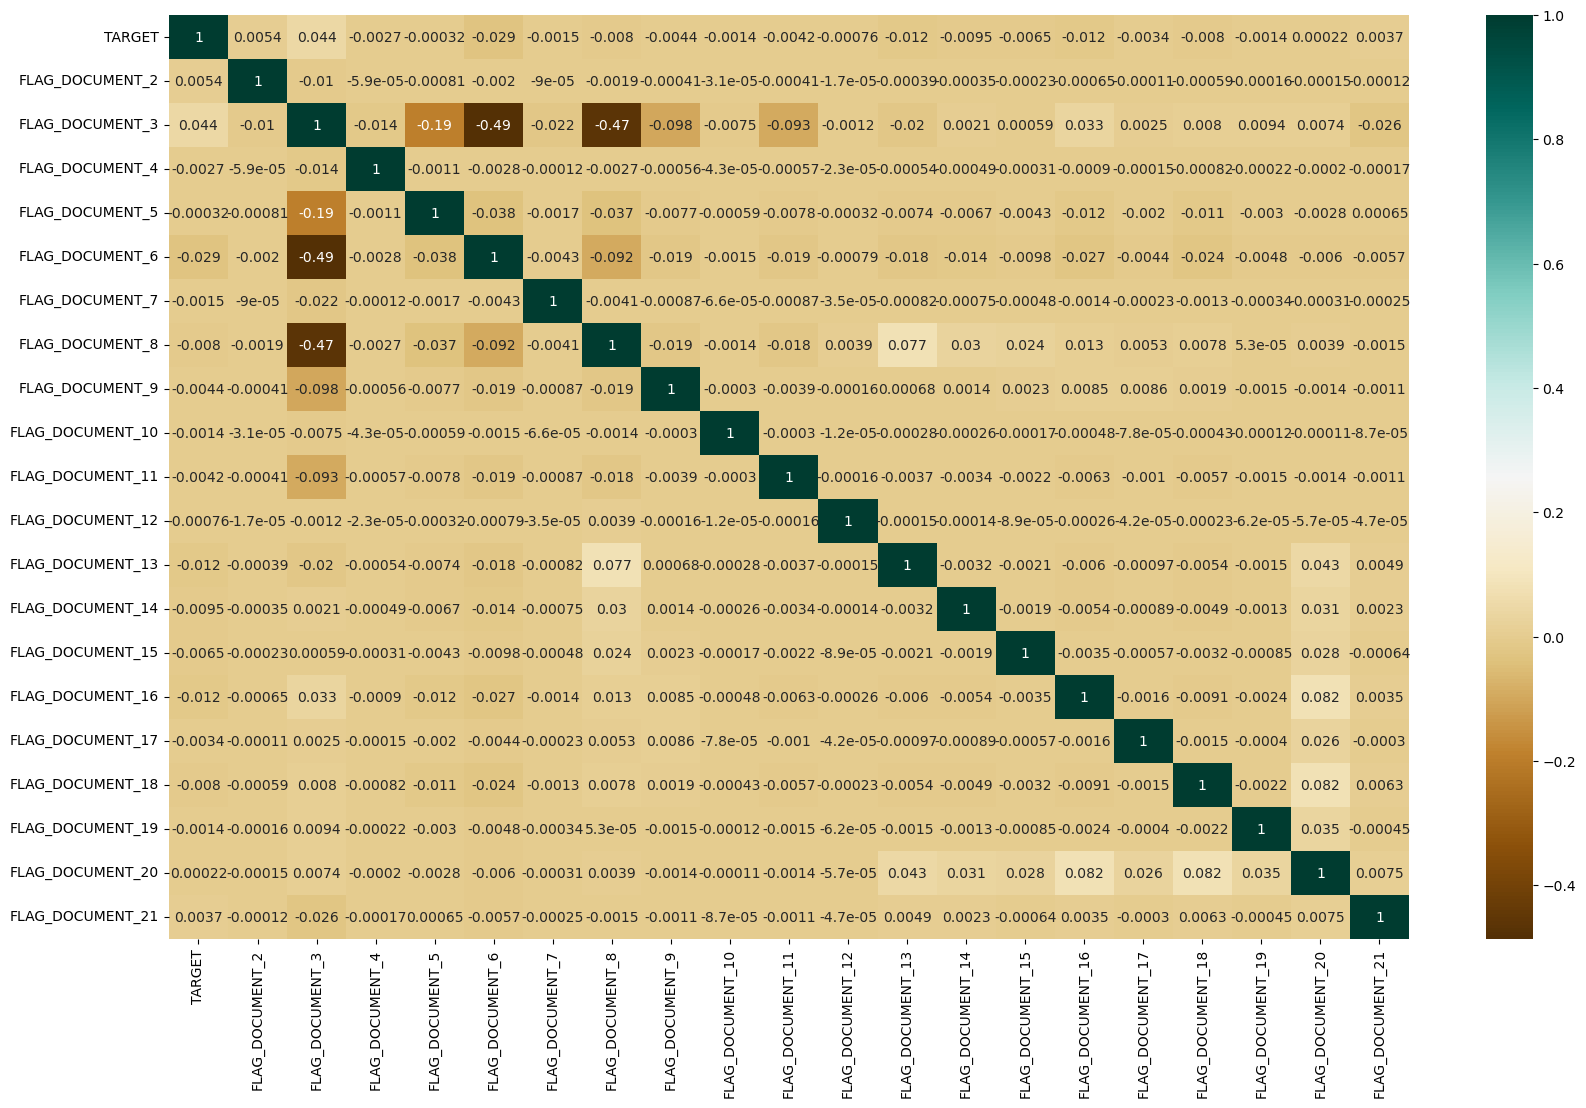

In [192]:
plt.figure(figsize=(20,12))
sns.heatmap(corr_flag_target,annot=True,cmap='BrBG')
plt.show()

We can drop those flag document columns who have low correlation with TARGET variable.Now we can see as compared to other flag columns ,flag document 3 has some correlation with TARGET.So we can drop rest of flag document columns except flag_document_3.

In [195]:
#Dropping FLAG_DOCUMENT columns except FLAG_DOCUMENT 3
df_app_data = df_app_data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1)

Some of columns are not that much useful for our analysis as we have many more useful columns to provide better insights so we can drop some not useful columns

In [197]:
columns_not_useful = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_MOBIL','REGION_POPULATION_RELATIVE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
        'WEEKDAY_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION','HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','NAME_TYPE_SUITE']


In [201]:
df_app_data = df_app_data.drop(columns_not_useful ,axis=1)

In [203]:
df_app_data.shape

(307511, 33)

#### Data types

In [206]:
#as family member count can not be float so converting it to int type.
df_app_data['CNT_FAM_MEMBERS'] = df_app_data['CNT_FAM_MEMBERS'].astype(int)

In [208]:
df_app_data['TARGET'] = df_app_data['TARGET'].astype('category') 

## Handling Outliers

#### Handling outliers in CNT_CHILDREN

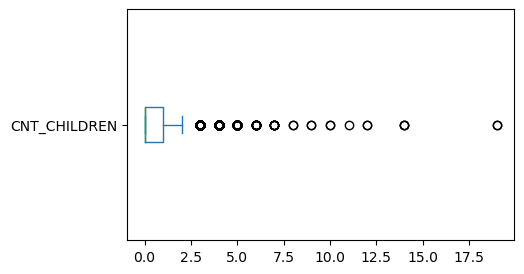

In [212]:
plt.figure(figsize=(5,3))
df_app_data['CNT_CHILDREN'].plot.box(vert=False)
plt.show()

So we can clearly see there are outliers.it is somewhat unrealistic data as maximum children count is 19 so we can use capping method to reduce the effect of outliers.

In [215]:
df_app_data['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [217]:
#Capping the values ,if greater than 5 then cap .
df_app_data['CNT_CHILDREN'] =df_app_data['CNT_CHILDREN'].apply(lambda x: 5 if x > 5 else x)

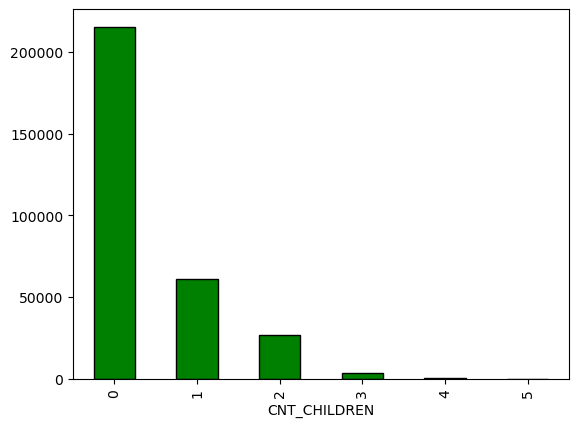

In [219]:
df_app_data['CNT_CHILDREN'].value_counts().plot.bar(color='g',edgecolor='black')
plt.show()

#### Handling outliers in AMT_GOODS_PRICE

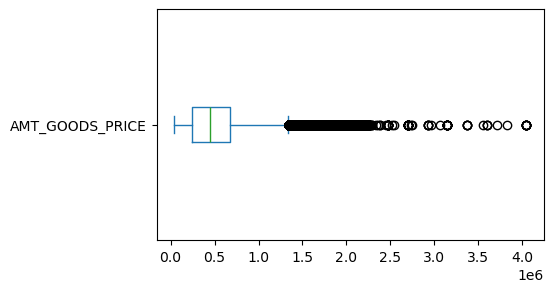

In [222]:
plt.figure(figsize=(5,3))
df_app_data['AMT_GOODS_PRICE'].plot.box(vert=False)
plt.show()

In [224]:
df_app_data['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [226]:
#Outliers are there in AMT_GOODS_PRICE so here we can use Binning method.we can make buckets and this will reduce impact of outliers.
#so buckets are ['VL,'L','M','H','VH'] as VL for very low,L for low,M for medium,H for high,VH for very high.
df_app_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(df_app_data['AMT_GOODS_PRICE'],[0,100000,250000,500000,1000000,5000000],labels = ['VL','L','M','H','VH'])
df_app_data['AMT_GOODS_PRICE_RANGE'].describe()

count     307511
unique         5
top            M
freq       98005
Name: AMT_GOODS_PRICE_RANGE, dtype: object

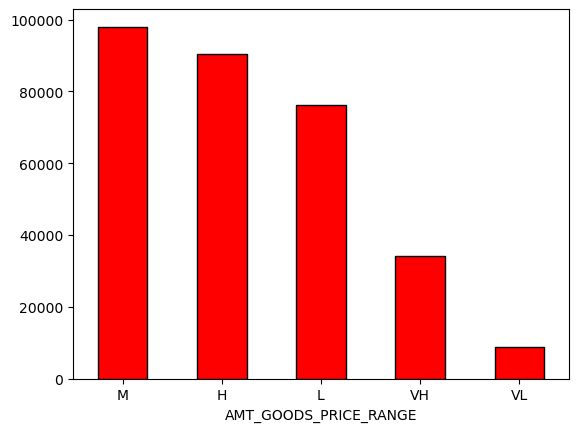

In [228]:
df_app_data['AMT_GOODS_PRICE_RANGE'].value_counts().plot.bar(color='r',edgecolor='black')
plt.xticks(rotation=0)
plt.show()

#### Handling outliers in AMT_INCOME_TOTAL

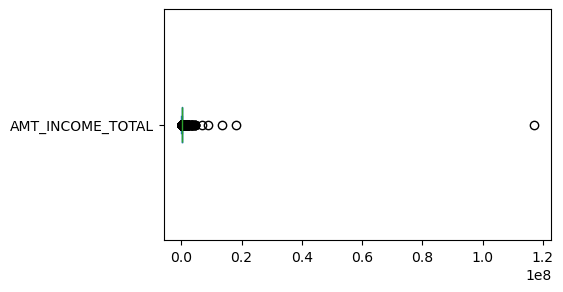

In [231]:
plt.figure(figsize=(5,3))
df_app_data['AMT_INCOME_TOTAL'].plot.box(vert=False)
plt.show()

In [233]:
# for handling outliers we can use binning.we can make buckets and this will reduce impact of outliers.
#so buckets are  very low, low,medium, high, very high.
df_app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [235]:
df_app_data['AMT_INCOME_TOTAL_RANGE'] = pd.cut(df_app_data['AMT_INCOME_TOTAL'],[0,100000,250000,500000,1000000,120000000],labels = ['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])

In [237]:
df_app_data['AMT_INCOME_TOTAL_RANGE'].describe()

count     307511
unique         5
top          LOW
freq      204035
Name: AMT_INCOME_TOTAL_RANGE, dtype: object

In [239]:
df_app_data['AMT_INCOME_TOTAL_RANGE'].value_counts()

AMT_INCOME_TOTAL_RANGE
LOW          204035
VERY LOW      63698
MEDIUM        37076
HIGH           2452
VERY HIGH       250
Name: count, dtype: int64

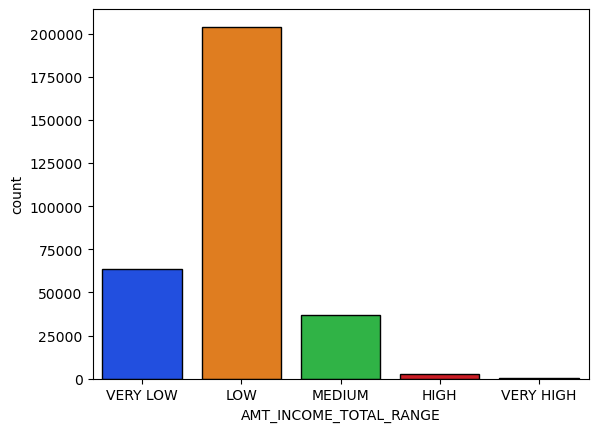

In [241]:
sns.countplot(x ='AMT_INCOME_TOTAL_RANGE' ,data =df_app_data,palette='bright',edgecolor='black')
plt.show()

#### Handling outliers in AMT_CREDIT

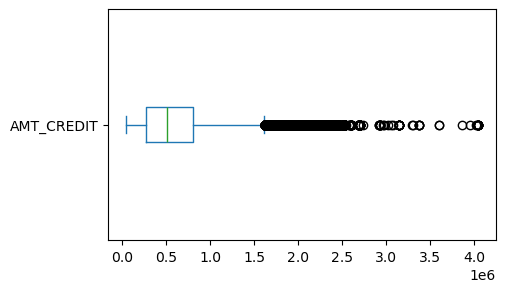

In [243]:
plt.figure(figsize=(5,3))
df_app_data['AMT_CREDIT'].plot.box(vert=False)
plt.show()

In [246]:
# for handling outliers we can use binning.we can make buckets and this will reduce impact of outliers.
#so buckets are  very low, low,medium, high, very high.
df_app_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [248]:
df_app_data['AMT_CREDIT_RANGE'] = pd.cut(df_app_data['AMT_CREDIT'],[0,100000,250000,500000,1000000,4500000],labels = ['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])

In [250]:
df_app_data['AMT_CREDIT_RANGE'].describe()

count     307511
unique         5
top         HIGH
freq      108193
Name: AMT_CREDIT_RANGE, dtype: object

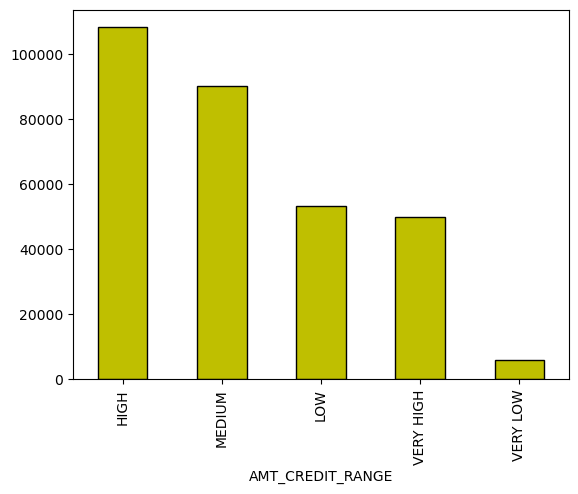

In [252]:
df_app_data['AMT_CREDIT_RANGE'].value_counts().plot.bar(color='y',edgecolor='black')
plt.show()

#### Handling outliers in AMT_ANNUITY

In [255]:
# for handling outliers we can use binning.we can make buckets and this will reduce impact of outliers.
#so buckets are 'VL','L','M','H','VH'.

df_app_data['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

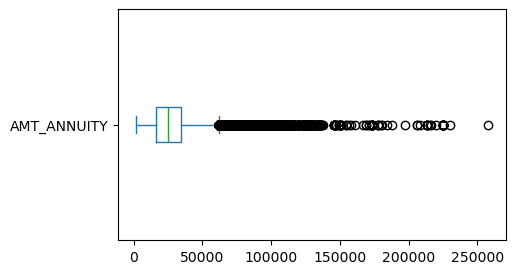

In [257]:
plt.figure(figsize=(5,3))
df_app_data['AMT_ANNUITY'].plot.box(vert=False)
plt.show()

In [258]:
df_app_data['AMT_ANNUITY_RANGE'] = pd.cut(df_app_data['AMT_ANNUITY'],[2000,25000,35000,50000,100000,260000],labels = ['VL','L','M','H','VH'])

In [261]:
df_app_data['AMT_ANNUITY_RANGE'].value_counts()

AMT_ANNUITY_RANGE
VL    154875
L      77772
M      53563
H      20792
VH       505
Name: count, dtype: int64

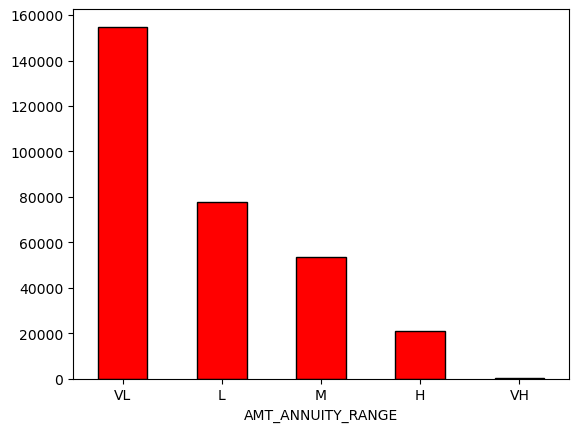

In [263]:
df_app_data['AMT_ANNUITY_RANGE'].value_counts().plot.bar(color='r',edgecolor='black')
plt.xticks(rotation=0)
plt.show()

## Standardising values

'DAYS_BIRTH' ,'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' have negative values so converting these into positive values and also in years by using abs() function and dividing them by 365.25 as number of days not same in each year.Taking floor division to take whole number. 

In [267]:
df_app_data['AGE_YEARS'] = abs(df_app_data['DAYS_BIRTH']//365.25).astype(int)
df_app_data['YEARS_EMPLOYED'] = abs(df_app_data['DAYS_EMPLOYED']//365.25).astype(int)
df_app_data['YEARS_REGISTRATION'] = abs(df_app_data['DAYS_REGISTRATION']//365.25).astype(int)
df_app_data['YEARS_ID_PUBLISH'] = abs(df_app_data['DAYS_ID_PUBLISH']//365.25).astype(int)

In [269]:
df_app_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

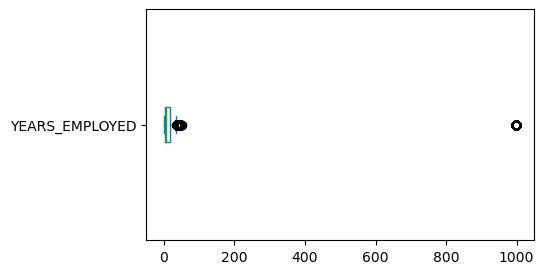

In [271]:
plt.figure(figsize=(5,3))
df_app_data['YEARS_EMPLOYED'].plot.box(vert=False)
plt.show()

From above box plot,we can observe that given data is unrealistic like 200 years and so on .we can use capping to reduce error.

In [274]:
#Capping the values ,if greater than 40 then cap .
df_app_data['YEARS_EMPLOYED'] =df_app_data['YEARS_EMPLOYED'].apply(lambda x: 40 if x > 40 else x)

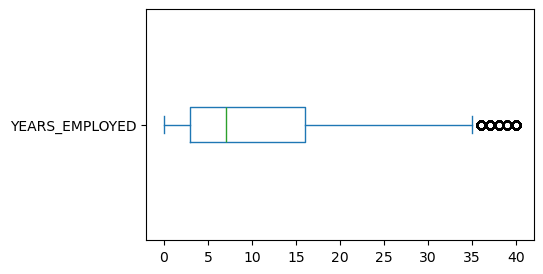

In [276]:
plt.figure(figsize=(5,3))
df_app_data['YEARS_EMPLOYED'].plot.box(vert=False)
plt.show()

In [277]:
df_app_data['DAYS_LAST_PHONE_CHANGE'] = df_app_data['DAYS_LAST_PHONE_CHANGE'].abs()

In [280]:
#Now we can drop 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH' columns as we already converted in to years.
df_app_data = df_app_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'], axis=1)

In [282]:
#Creating AGE GROUPS using bins:
df_app_data['AGE_YEARS'].describe()

count    307511.000000
mean         44.404607
std          11.945771
min          21.000000
25%          34.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE_YEARS, dtype: float64

In [284]:
df_app_data['AGE_YEARS_GROUP'] = pd.cut(df_app_data['AGE_YEARS'],[20,40,50,60,75],labels = ['adult','Middle age','older','Sr.citizen'])

In [286]:
df_app_data['AGE_YEARS_GROUP'].value_counts()

AGE_YEARS_GROUP
adult         127535
Middle age     76581
older          68109
Sr.citizen     35286
Name: count, dtype: int64

Replacing 'XNA' values with 'Unknown' in ORGANIZATION_TYPE column

In [289]:
df_app_data['ORGANIZATION_TYPE'].value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

As there are large number of' XNA' value so replacing it with 'Unknown'.

In [292]:
# We can make seperate category as unknown and replace XNA with unknown
df_app_data['ORGANIZATION_TYPE'] = df_app_data['ORGANIZATION_TYPE'].apply(lambda x: x.replace('XNA','Unknown'))

In [294]:
df_app_data['ORGANIZATION_TYPE'].value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

In [296]:
df_app_data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Replacing 'XNA' value with 'F' in 'CODE_GENDER' column as XNA values are just 4.

In [299]:
df_app_data['CODE_GENDER'] = df_app_data['CODE_GENDER'].apply(lambda x: x.replace('XNA','F'))

In [301]:
df_app_data['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Finding categorical and numeric and feature Engg. category type columns for ease of analysis:

In [304]:
categorical_features=[feature for feature in df_app_data.columns if df_app_data[feature].dtype=="O"]
print(len(categorical_features))
print(categorical_features)


10
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


In [306]:
numeric_features=[feature for feature in df_app_data.columns if df_app_data[feature].dtype != "O" and df_app_data[feature].dtype != "category" ]
print(len(numeric_features))
print(numeric_features)

22
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']


In [308]:
#after binning new columns type will also be category
category_feature=[feature for feature in df_app_data.columns if df_app_data[feature].dtype == "category" ]
print(len(category_feature))
print(category_feature)                  

6
['TARGET', 'AMT_GOODS_PRICE_RANGE', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'AGE_YEARS_GROUP']


In [310]:
df_app_data.shape

(307511, 38)

## Univariate analysis

### Categorical univariate analysis

#### Categorical unordered univariate analysis

In [315]:
categorical_unordered=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','ORGANIZATION_TYPE']

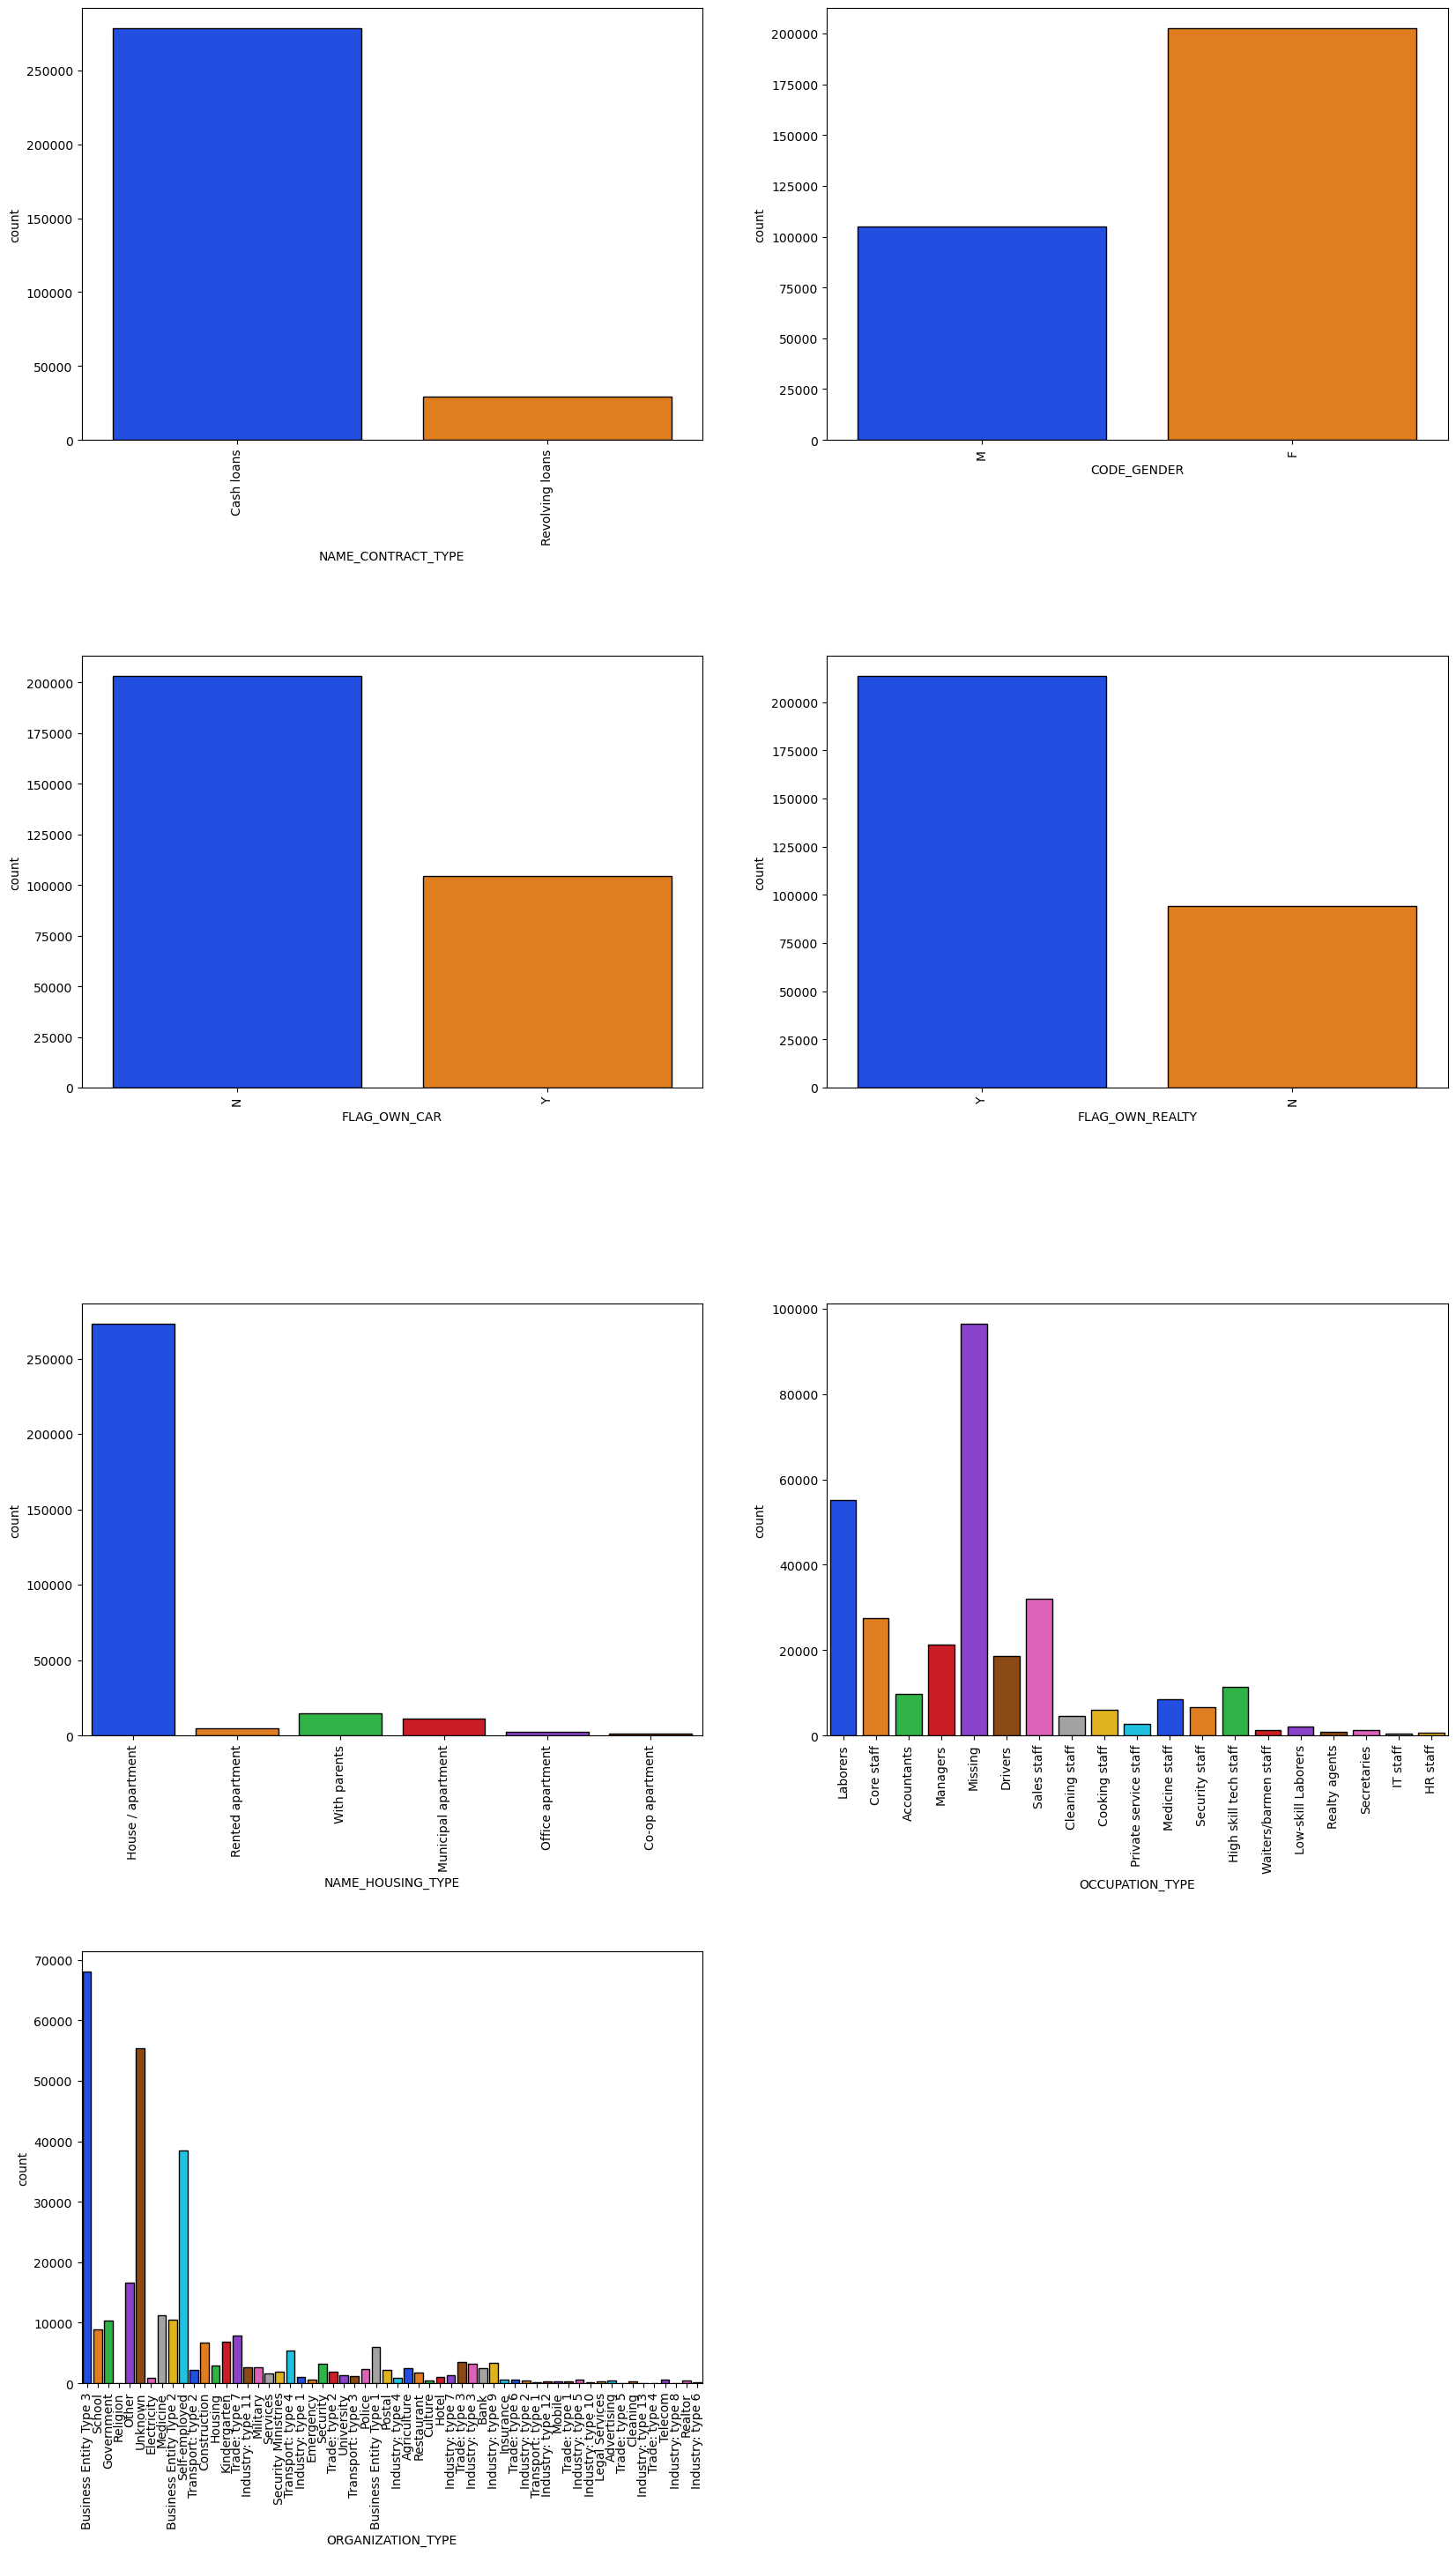

In [317]:
plt.figure(figsize=(20,35))

for i in enumerate([feature for feature in categorical_unordered]):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(data=df_app_data, x=i[1],palette='bright',edgecolor='black')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.5)

### Insights: 
    1. Revolving loans are less as compared to cash loans.
    2. Females are more in number as compared to males.
    3. Clients with car are less in number as compared to without car.
    4. Clients who owns house are more in number.
    5. The number of laborers are more as compared to other occupation category.
    6. Clients are more in number who belong to business entity type 3.
            

#### Categorical ordered univariate analysis

In [320]:
categorical_ordered=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

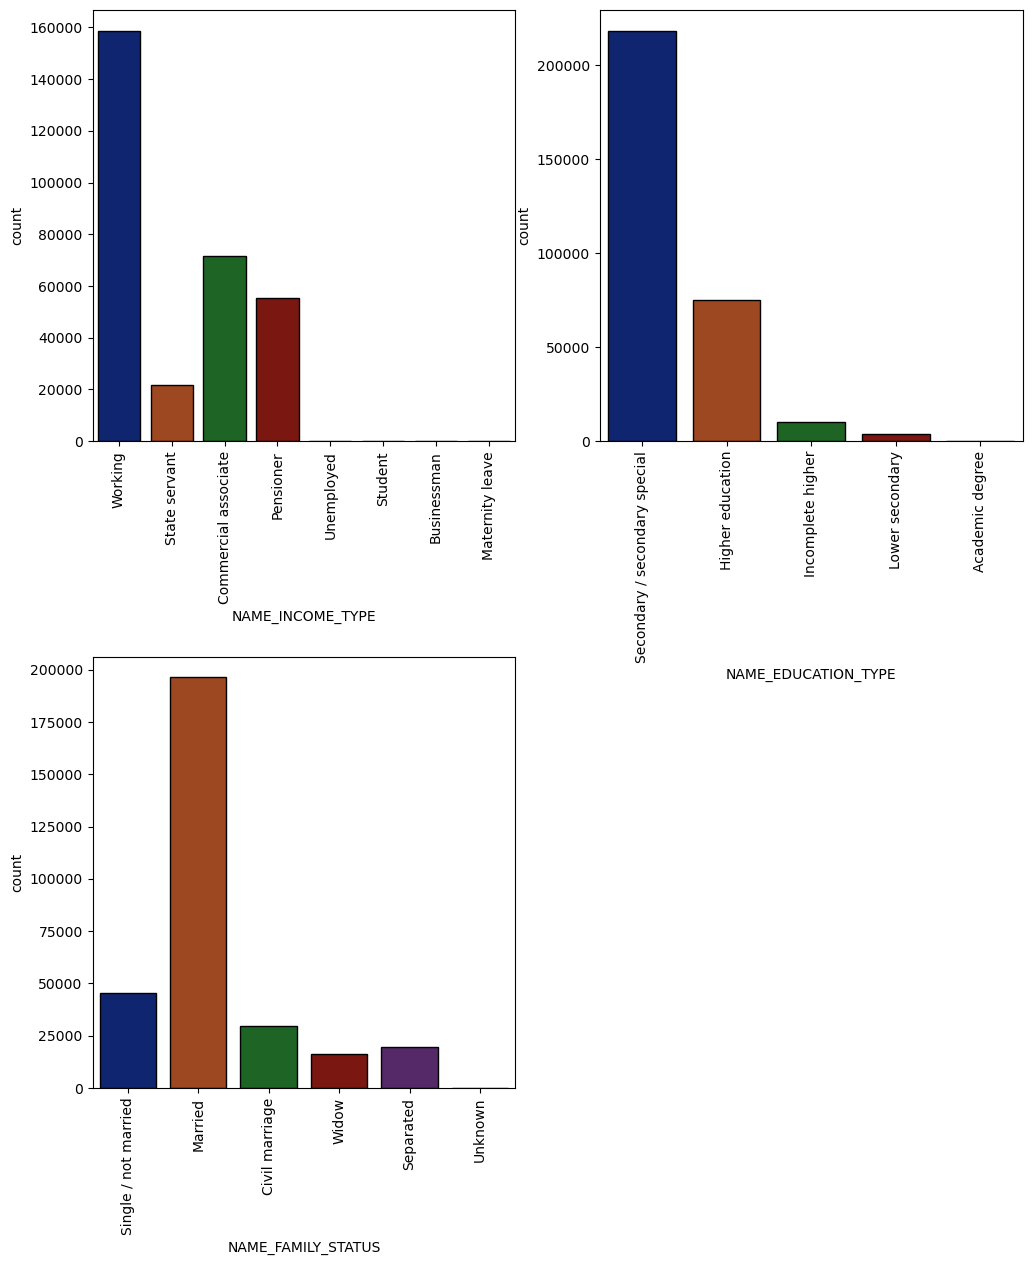

In [321]:
plt.figure(figsize=(12,14))

for i in enumerate([feature for feature in categorical_ordered]):
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(data=df_app_data, x=i[1],palette='dark',edgecolor='black')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.5)

### Insights:
      1. Clients with working status are more as compared to other income type.
      2. Clients with secondary/secondary special are more in number as compared to other education category.
      3. Married people are more in number.
   

## Numeric univariate analysis

In [324]:
numeric_features

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH']

In [325]:
#Here we can divide numeric variables to obtain some useful insights:'AGE_YEARS',  'YEARS_EMPLOYED', 'YEARS_REGISTRATION',  'YEARS_ID_PUBLISH'
 
numeric_yrs_col = ['AGE_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH']

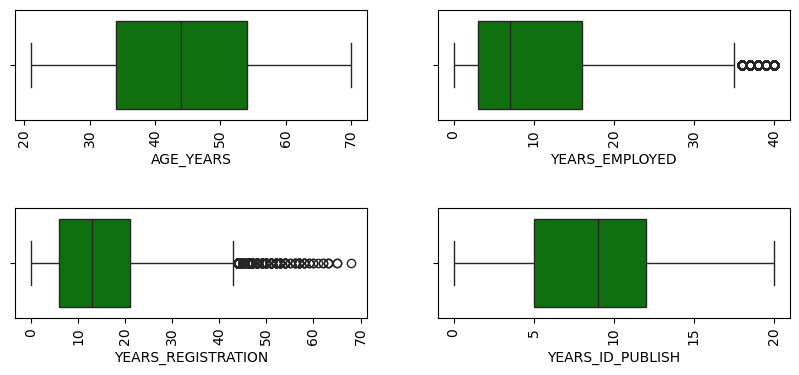

In [326]:
plt.figure(figsize=(10,4))

for i in enumerate([feature for feature in numeric_yrs_col]):
    plt.subplot(2, 2, i[0]+1)
    palette=['g']
    sns.boxplot(data=df_app_data, x=i[1],palette=palette)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.8)
   

#### Insights:
  1. Clients average age is around 44 years.
  2. there are some outliers in YEARS_EMPLOYED column and we can ignore that because its impractical data we can do capping  
  3. Married people are more in number.

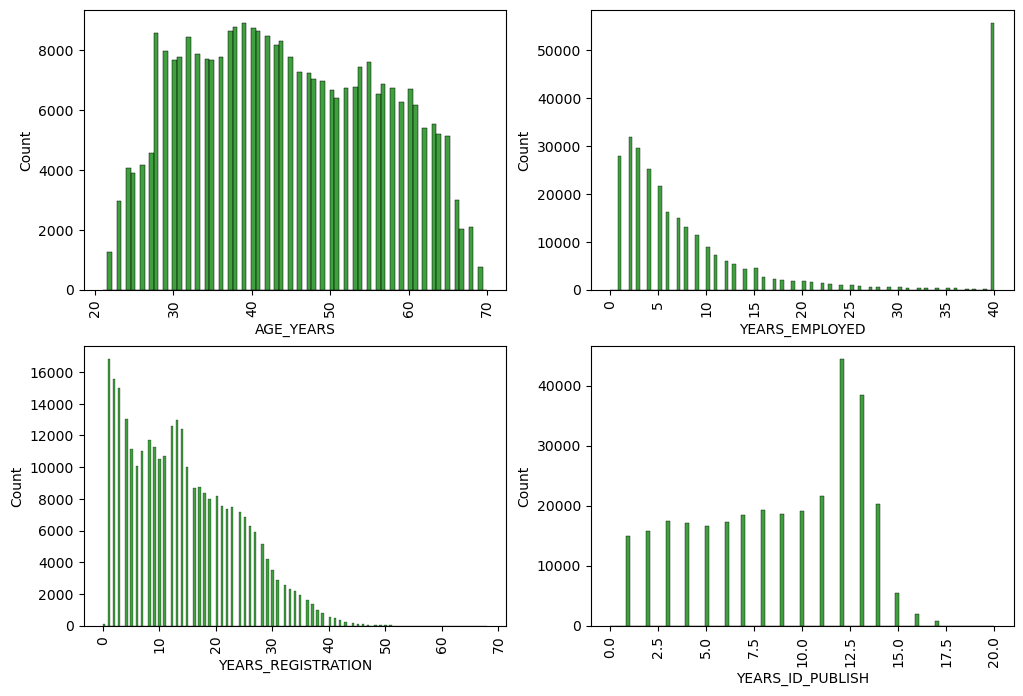

In [328]:
plt.figure(figsize=(12,8))

for i in enumerate([feature for feature in numeric_yrs_col]):
    plt.subplot(2, 2, i[0]+1)
    sns.histplot(data=df_app_data, x=i[1],color='green',edgecolor='black')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.2)
   

In [329]:
ext_source=['EXT_SOURCE_2', 'EXT_SOURCE_3']

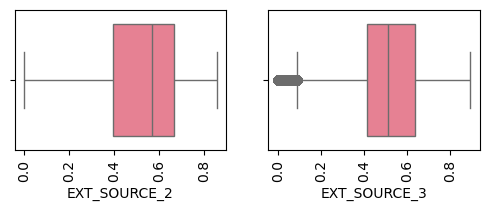

In [330]:
plt.figure(figsize=(6,4))

for i in enumerate([feature for feature in ext_source ]):
    plt.subplot(2, 2, i[0]+1)
    sns.boxplot(data=df_app_data, x=i[1],palette='husl')
    plt.xticks(rotation=90)

In [331]:
numeric_col_1=['CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION']

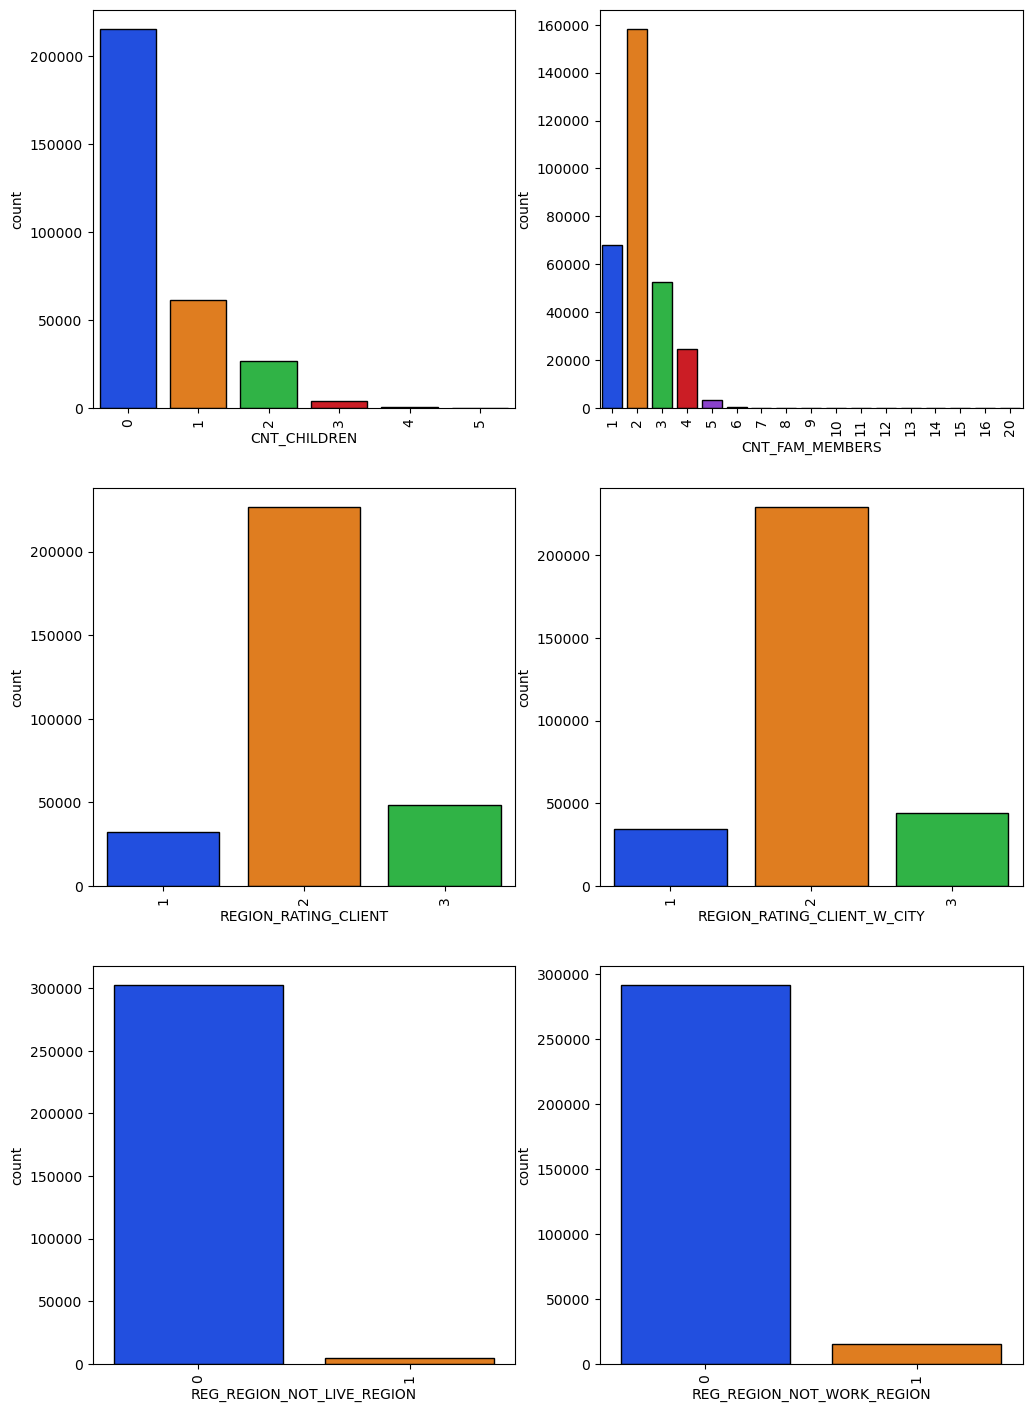

In [332]:
plt.figure(figsize=(12,30))

for i in enumerate([feature for feature in numeric_col_1 ]):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(data=df_app_data, x=i[1],palette='bright',edgecolor='black')
    plt.xticks(rotation=90)
   

#### Insights: 
1. We can observe number of clients are more who do not have children.
2. Clients with 2 family members are more in numbers.
3. Clients with region rating 2 are more.
4. Clients with region rating with city 2 are also more in number.
5. Clients whose REG region not live region 0 are more.

## Data Imbalance

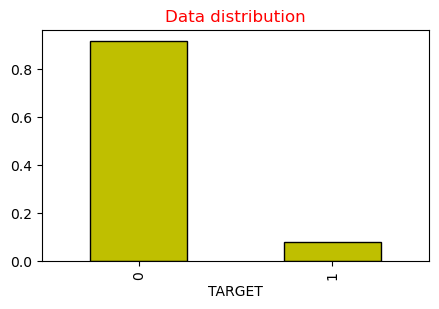

In [335]:
plt.figure(figsize=(5,3))
df_app_data.TARGET.value_counts(normalize=True).plot.bar(color='y',edgecolor='black')
plt.title('Data distribution',color='r')
plt.show()

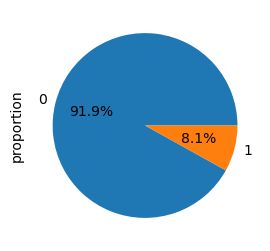

In [338]:
plt.figure(figsize=(5,3))
df_app_data.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

#### Insights:
1. We can see ,data is highly imbalance that means number of non-defaulters are more than number of defaulters.so now we will segment our data w.r.t TARGET as target0 and target 1 to analyse the result who is going to be defaulter in each category. for target 0 ,percentage is 91.9 % and for target 1 it is 8.1%.
  

## Segmented Univariate Analysis

Now as per problem statement, we need to segment data w.r.t. TARGET variable and find the insights for univariate,bivarite and multivarite so now   dividind data set as df_app_target1 as defaulter and df_app_target0
  1. clients with payment difficulties ( TARGET = 1 ) 
  2. all other cases (TARGET =0)

In [342]:
#clients with payment difficulties(TARGET=1)
df_target1 = df_app_data[df_app_data.TARGET == 1]
df_target1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
26      100031      1         Cash loans           F            N   
40      100047      1         Cash loans           M            N   
42      100049      1         Cash loans           F            N   
81      100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0   Single / not married  House / apartment        Laborers                1   
26                 Widow  House / apartment   Cooking staff                1   
40               Married  House / apartment        Laborers                2   
42        Civil marriage  House / apartment     Sales staff                2   
81               Married  House / apartment         Missing                2   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

         ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0   Business Entity Type 3      0.262949      0.139376   
26  Business Entity Type 3      0.548477      0.190706   
40  Business Entity Type 3      0.306841      0.320163   
42           Self-employed      0.674203      0.399676   
81                 Unknown      0.023952      0.720944   

    DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_MON  \
0                   1134.0                1                        0.0   
26                   161.0                1                        0.0   
40                  1075.0                1                        2.0   
42                  1480.0                1                        0.0   
81                     0.0                0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                         0.0                         1.0   
26                        2.0                         2.0   
40                        0.0                         4.0   
42                        0.0                         2.0   
81                        0.0                         0.0   

   AMT_GOODS_PRICE_RANGE AMT_INCOME_TOTAL_RANGE AMT_CREDIT_RANGE  \
0                      M                    LOW           MEDIUM   
26                     H                    LOW             HIGH   
40                     H                    LOW        VERY HIGH   
42                     L   

In [344]:
df_target1.shape

(24825, 38)

In [347]:
#clients with all other cases(TARGET = 0)
df_target0 = df_app_data[df_app_data.TARGET == 0]
df_target0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   
5      100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1               Married  House / apartment      Core staff                2   
2  Single / not married  House / apartment        Laborers                1   
3        Civil marriage  House / apartment        Laborers                2   
4  Single / not married  House / apartment      Core staff                1   
5               Married  House / apartment        Laborers                2   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  \
1                  School      0.622246      0.510853                   828.0   
2              Government      0.555912      0.729567                   815.0   
3  Business Entity Type 3      0.650442      0.510853                   617.0   
4                Religion      0.322738      0.510853                  1106.0   
5                   Other      0.354225      0.621226                  2536.0   

   FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1                1                        0.0                        0.0   
2                0                        0.0                        0.0   
3                1                        0.0                        0.0   
4                0                        0.0                        0.0   
5                1                        0.0                        1.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_GOODS_PRICE_RANGE AMT_INCOME_TOTAL_RANGE  \
1                         0.0                    VH                 MEDIUM   
2                         0.0                     L               VERY LOW   
3                         0.0                     M                    LOW   
4                         0.0                     H                    LOW   
5                         1.0                     M               VERY LOW   

  AMT_CREDIT_RANGE AMT_ANNUITY_RANGE  AGE_YEARS  YEARS_EMPLOYED  \
1        VERY HIGH                 M         

In [348]:
df_target1.shape

(24825, 38)

#### Data imbalance ratio

In [350]:
print(round(len(df_target0)/len(df_target1),2))

11.39


it is clearly seen that data is highly imbalanced.so results can be biased.

### Segmented Categorical unordered univariate

#### Analysing CODE_GENDER for both df_target1 and df_target0

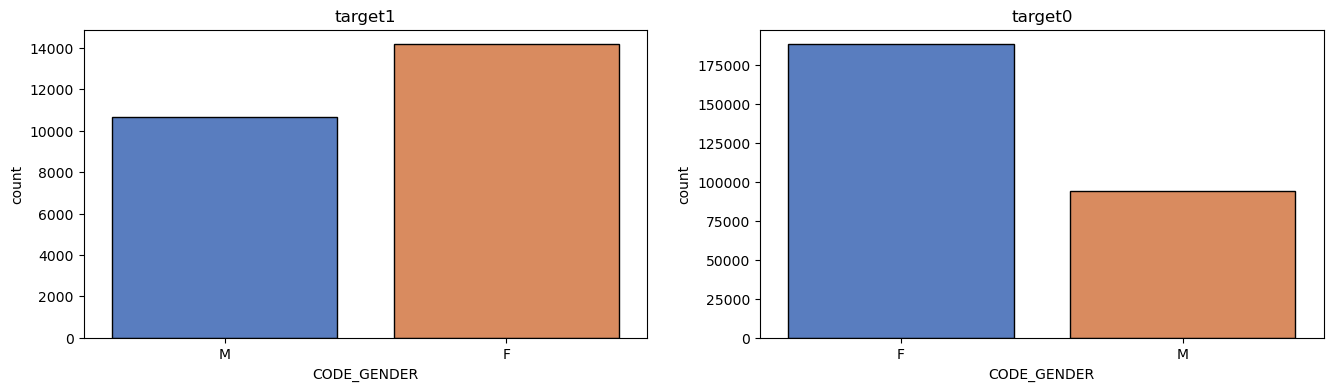

In [355]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(x='CODE_GENDER' ,data=df_target1,palette='muted',edgecolor='black')
plt.title('target1')

plt.subplot(1,2,2)
sns.countplot(x='CODE_GENDER' ,data=df_target0,palette='muted',edgecolor='black')
plt.title('target0')
plt.show()

#### Insight from above graph:
1. We can see that female percent is more as compared to male.
2. If we calculate percent of female (no.of females in target 1 /by total no. of females) and same for male then we can observe that male percent is slightly higher than female so chances are male can default.

####  Analysing OCCUPATION_TYPE for both df_target1 and df_target0

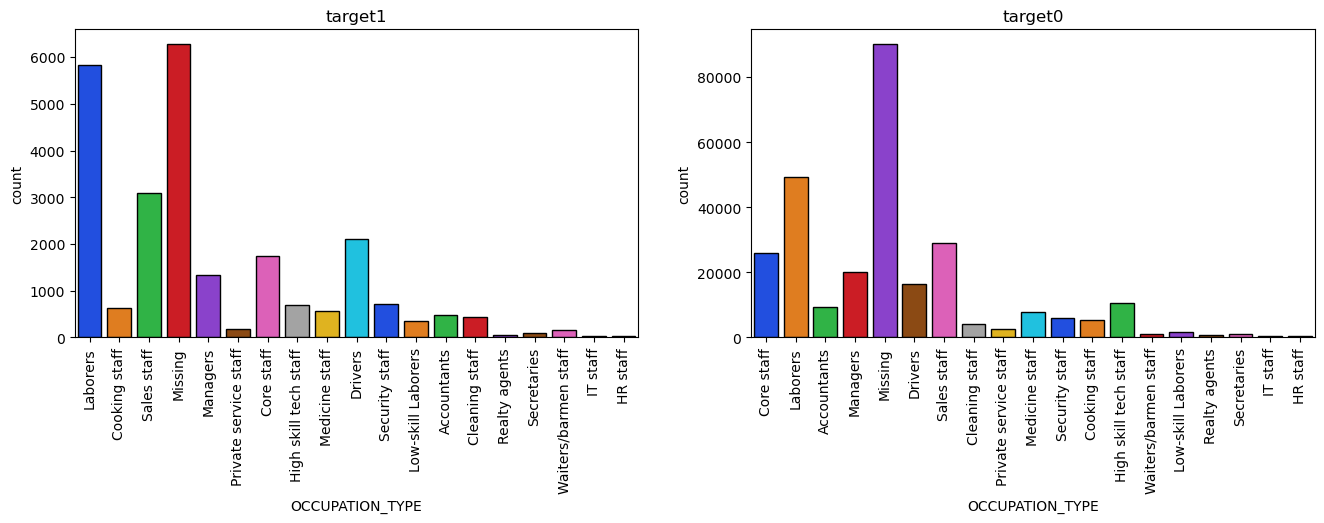

In [360]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(x='OCCUPATION_TYPE' ,data=df_target1,palette='bright',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='OCCUPATION_TYPE' ,data=df_target0,palette='bright',edgecolor='black' )
plt.title('target0')
plt.xticks(rotation=90)
plt.show()

#### Insight from above graph :
 Here we filled missing values by 'Missing' so we can ignore this while concluding the result as it will not provide right insight.After ignoring 'Missing', We can see that laborers percent is more as compared to other types so we can conclude that laborers are more likely to be defaulter.

#### Analysing NAME_CONTRACT_TYPE for both df_target1 and df_target0

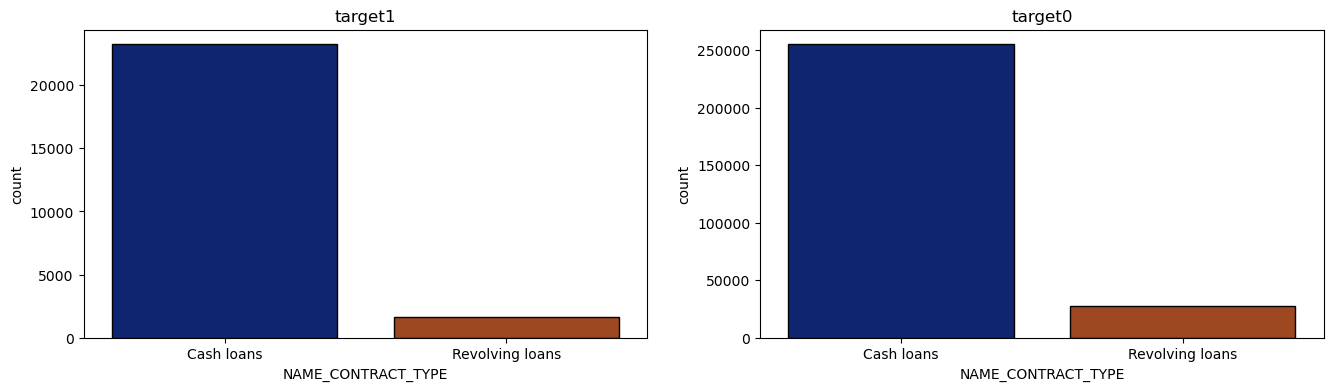

In [365]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE' ,data=df_target1,palette='dark',edgecolor='black')
plt.title('target1')

plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE' ,data=df_target0,palette='dark',edgecolor='black')
plt.title('target0')

plt.show()

#### Insight from above graph: 
1. We can see that Cash loan percent is more as compared to revolving loans in both the cases for target 0 and target1 .
2. Clients are more in number for cash loans.

#### Analysing FLAG_OWN_CAR for both df_target1 and df_target0

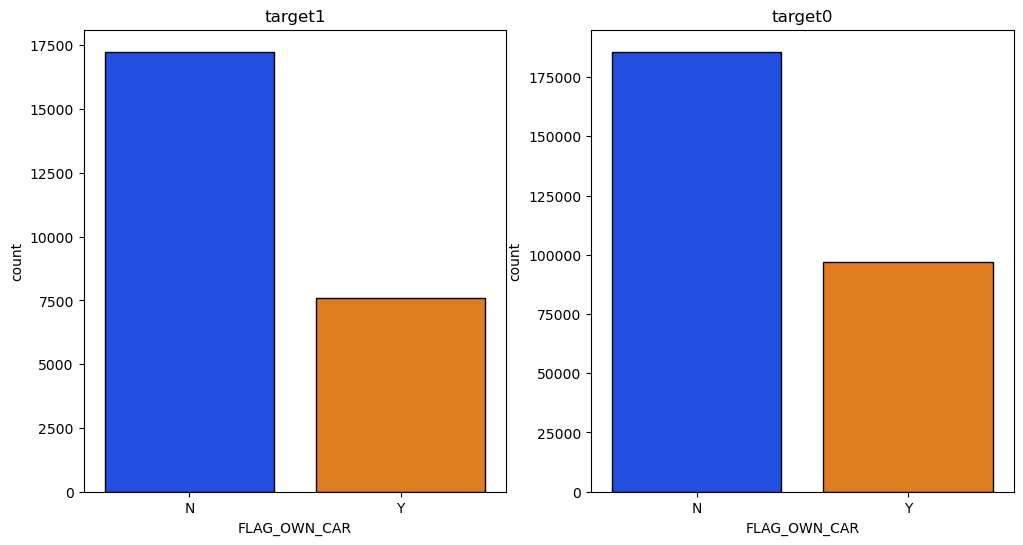

In [368]:
plt.figure(figsize=(12,6))


plt.subplot(1,2,1)
sns.countplot(x='FLAG_OWN_CAR' ,data=df_target1,palette='bright',edgecolor='black')
plt.title('target1')

plt.subplot(1,2,2)
sns.countplot(x='FLAG_OWN_CAR' ,data=df_target0,palette='bright',edgecolor='black' )
plt.title('target0')

plt.show()

#### Insight from above graph: 
1. We can see that percentage is more for clients who do not have own car as compared to who owns and if we calculate the percentage of clients who do not have car is more in target 1 data set that means defaulter as compared to target 0 data set that means clients who do not have cars are likely to be defaulted .
2. Moreover having car shows the worthiness of client.

### Analysing NAME_HOUSING_TYPE for both df_target1 and df_target0

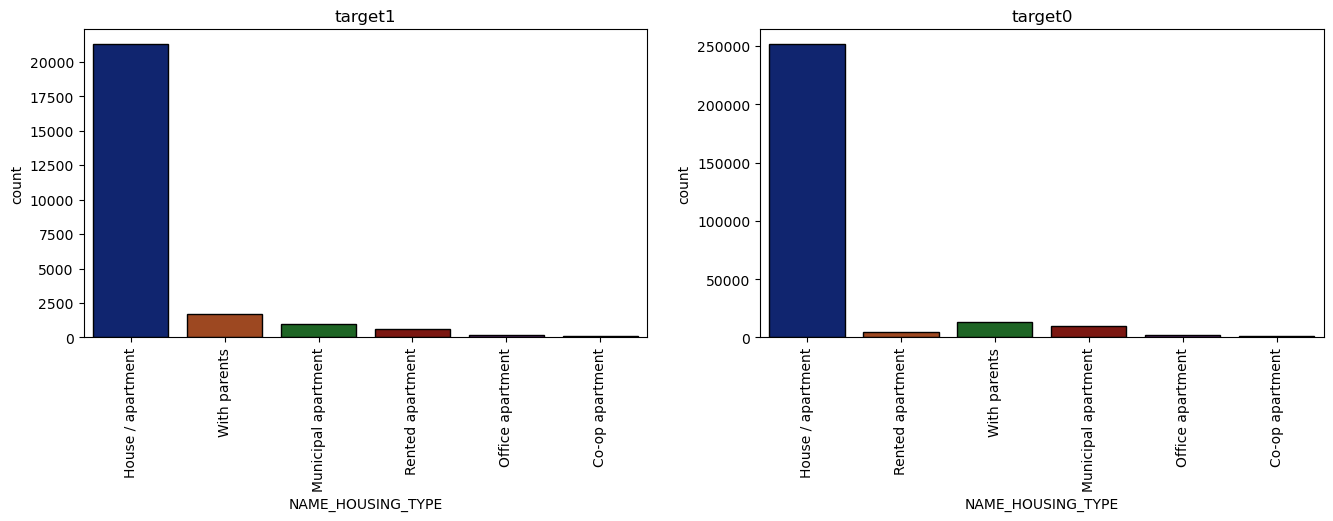

In [371]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(x='NAME_HOUSING_TYPE' ,data=df_target1,palette='dark',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='NAME_HOUSING_TYPE' ,data=df_target0,palette='dark',edgecolor='black' )
plt.title('target0')
plt.xticks(rotation=90)

plt.show()

#### Insight from above graph:
1. We can observe that number of clients are more who owns their house and they are likely to take more loans.

#### Analysing ORGANIZATION_TYPE for both df_target1 and df_target0

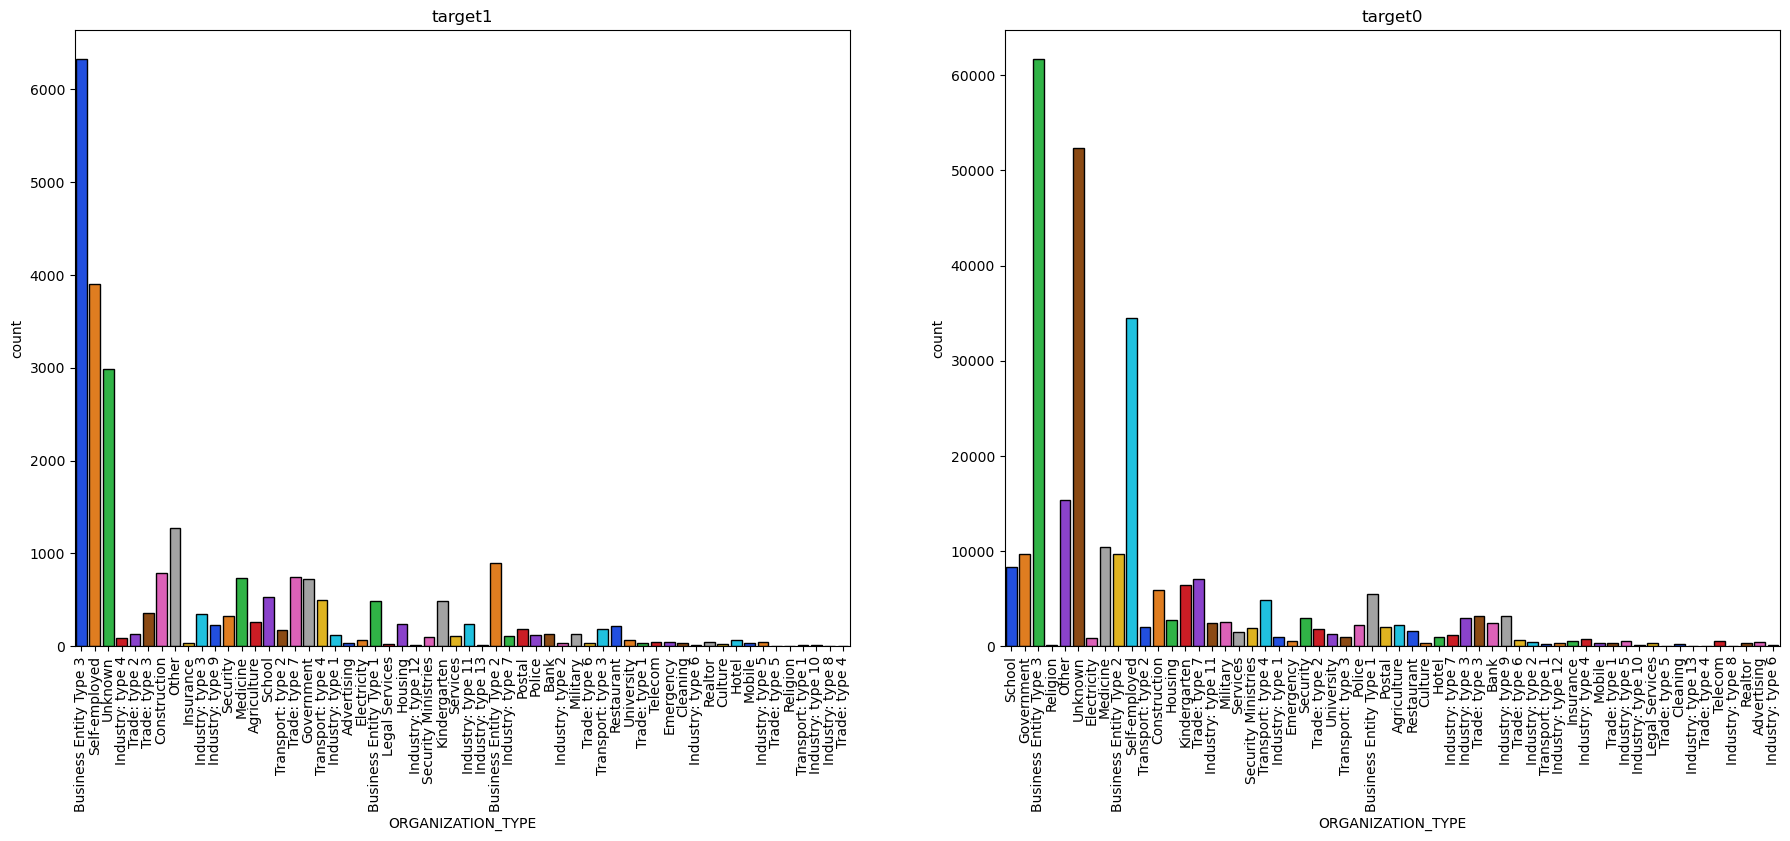

In [378]:
plt.figure(figsize=(22,8))

plt.subplot(1,2,1)
sns.countplot(x='ORGANIZATION_TYPE' ,data=df_target1,palette='bright',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='ORGANIZATION_TYPE' ,data=df_target0,palette='bright',edgecolor='black')
plt.title('target0')
plt.xticks(rotation=90)

plt.show()

#### Insight from above graph : 
clients with business entity type 3 are likely to be defaulted as their percentage in target1 is more as compared to target 0 data set.


## Segmented Categorical ordered univariate analysis

#### Analysing NAME_EDUCATION_TYPE for both df_target1 and df_target0

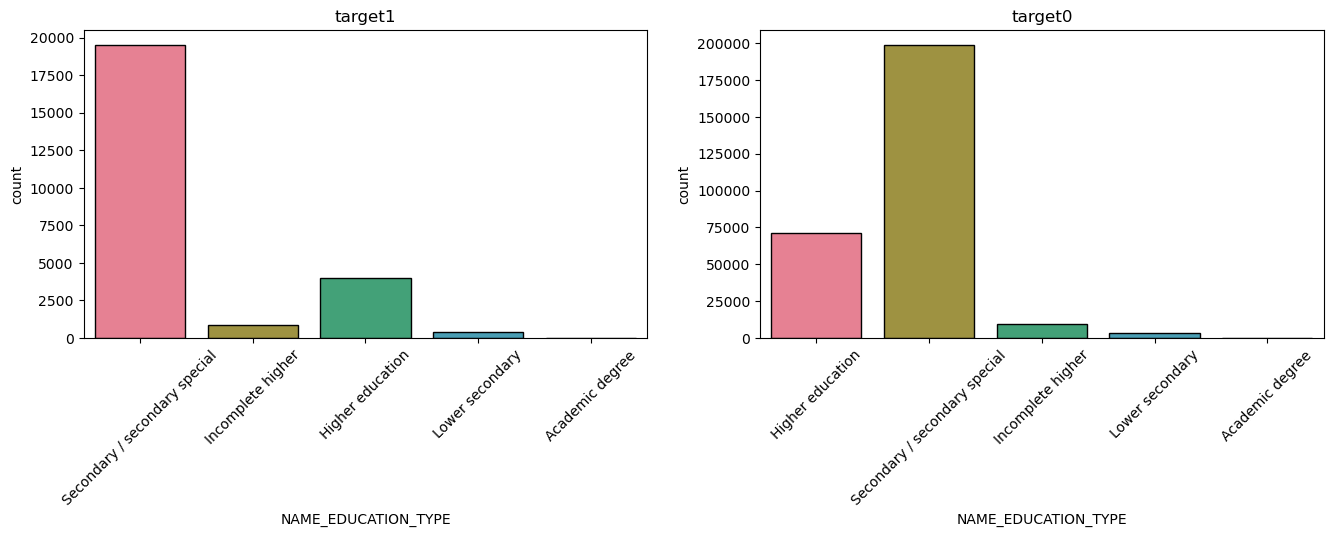

In [387]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(x='NAME_EDUCATION_TYPE' ,data=df_target1,palette='husl',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE' ,data=df_target0,palette='husl',edgecolor='black' )
plt.title('target0')
plt.xticks(rotation=45)
plt.show()

#### Insight from above graph:
We can see that clients with education secodary/secondary special are more likely to be defaulted as their percentage is more in target1 data set as compered to targeto data set.

#### Analysing NAME_INCOME_TYPE for both df_target1 and df_target0

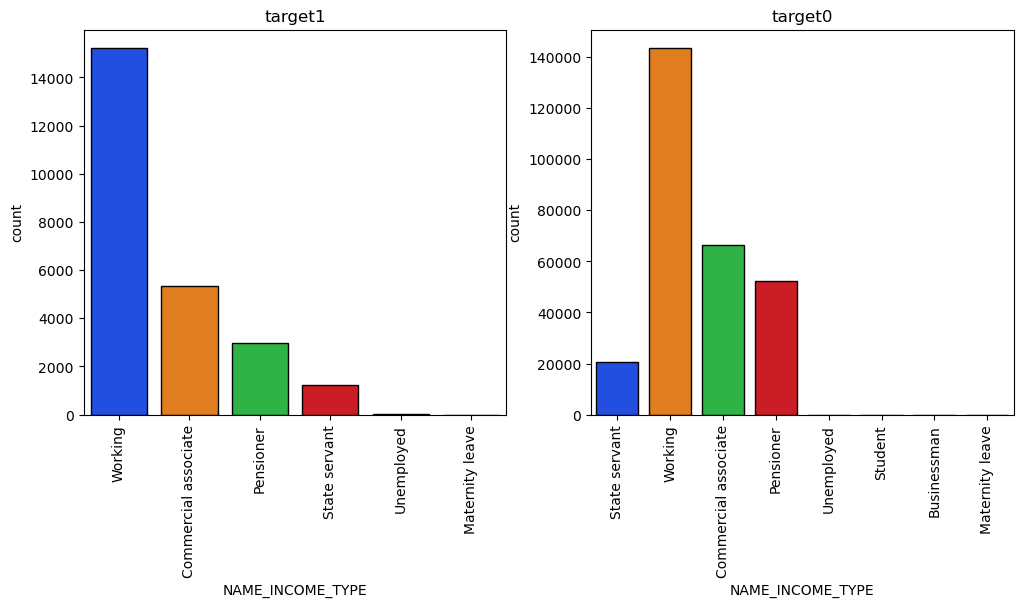

In [391]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE' ,data=df_target1,palette='bright',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE' ,data=df_target0,palette='bright',edgecolor='black' )
plt.title('target0')
plt.xticks(rotation=90)
plt.show()

#### Insight from above graph: 
1. Working income type clients are more in number to take loans.
2. they are more likely to be defaulted as their percentage is more in target1 data set as compered to target0 data set.

#### Analysing NAME_FAMILY_STATUS for both df_target1 and df_target0


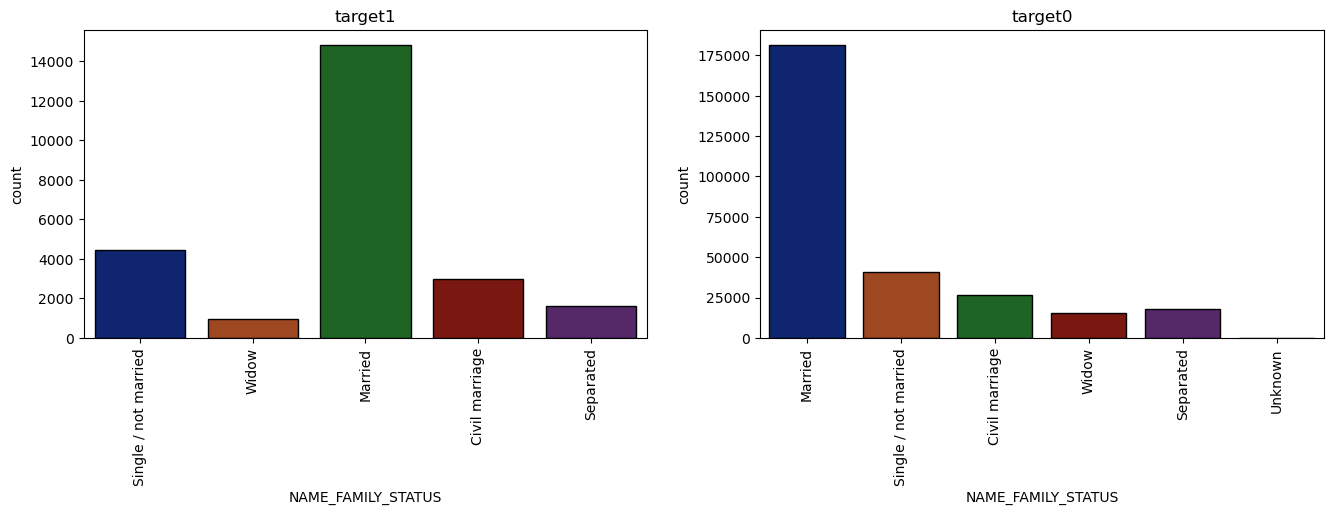

In [395]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.countplot(x='NAME_FAMILY_STATUS' ,data=df_target1,palette='dark',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='NAME_FAMILY_STATUS' ,data=df_target0 ,palette='dark',edgecolor='black')
plt.title('target0')
plt.xticks(rotation=90)
plt.show()

#### Insight from above graph: 
We can see that married clients are more likely to take loans and also more likely to be defaulted as their percentage is more in target1 data set as compered to target0 data set.

### Segmented Numeric variable univariate analysis

#### Analysing REGION_RATING_CLIENT for both df_target1 and df_target0

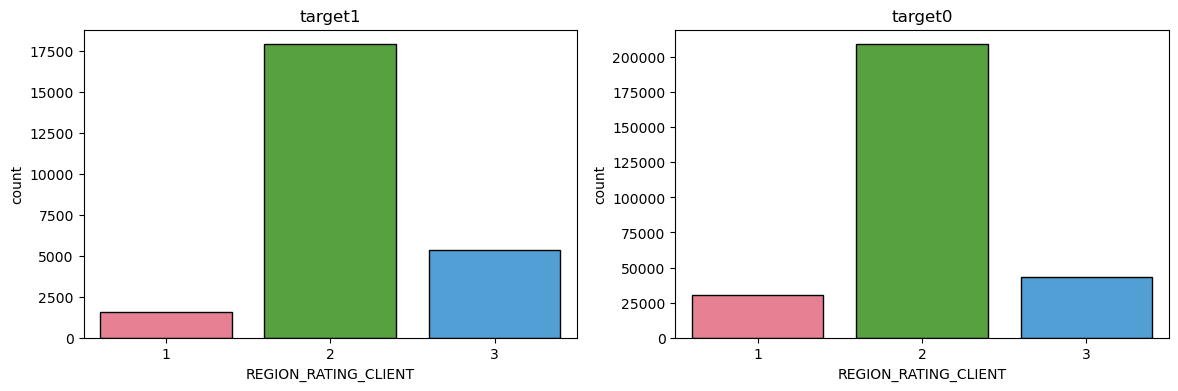

In [401]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.countplot(x='REGION_RATING_CLIENT' ,data=df_target1,palette='husl',edgecolor='black')
plt.title('target1')

plt.subplot(1,2,2)
sns.countplot(x='REGION_RATING_CLIENT' ,data=df_target0,palette='husl',edgecolor='black' )
plt.title('target0')

plt.show()

#### Insight from above graph: 
We can see that clients with region rating 2 are more likely to be defaulted as their percentage is more in target1 data set as compered to target0 data set.

#### Analysing CNT_CHILDREN for both df_target1 and df_target0

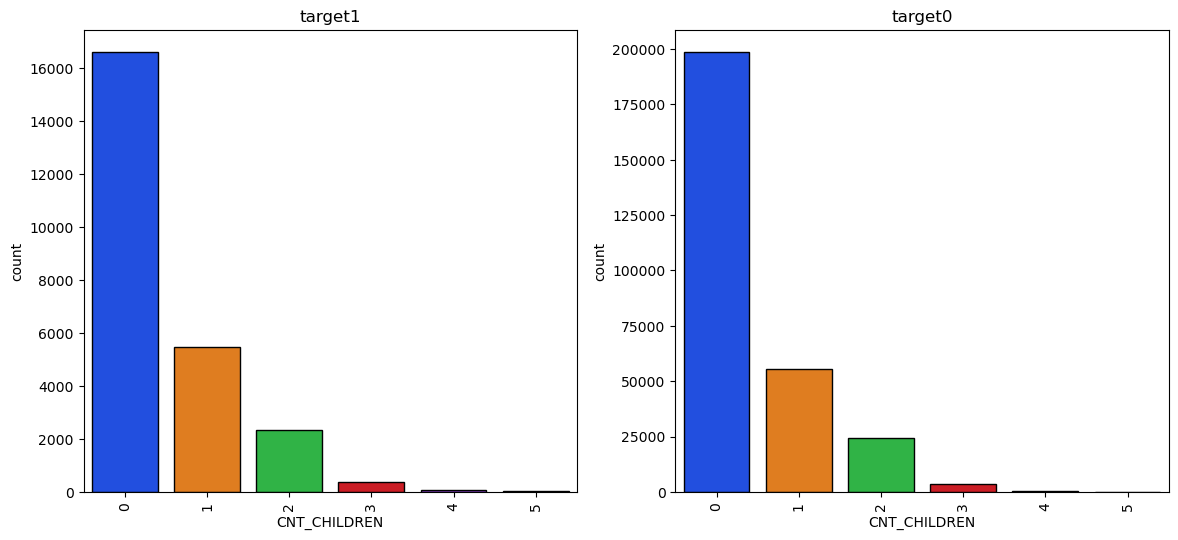

In [404]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(x='CNT_CHILDREN',data=df_target1,palette='bright',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='CNT_CHILDREN',data=df_target0 ,palette='bright',edgecolor='black')
plt.title('target0')
plt.xticks(rotation=90)

plt.show()

#### Insight from above graph:
1. People with no children are more in number to take loans.
2. Also they are more likely to be defaulted as their percentage is more in target1 data set as compered to target0 data set.

### Segmented univariate analysis for Feauture engineering

#### Analysing AGE_YEARS_GROUP for both df_target1 and df_target0

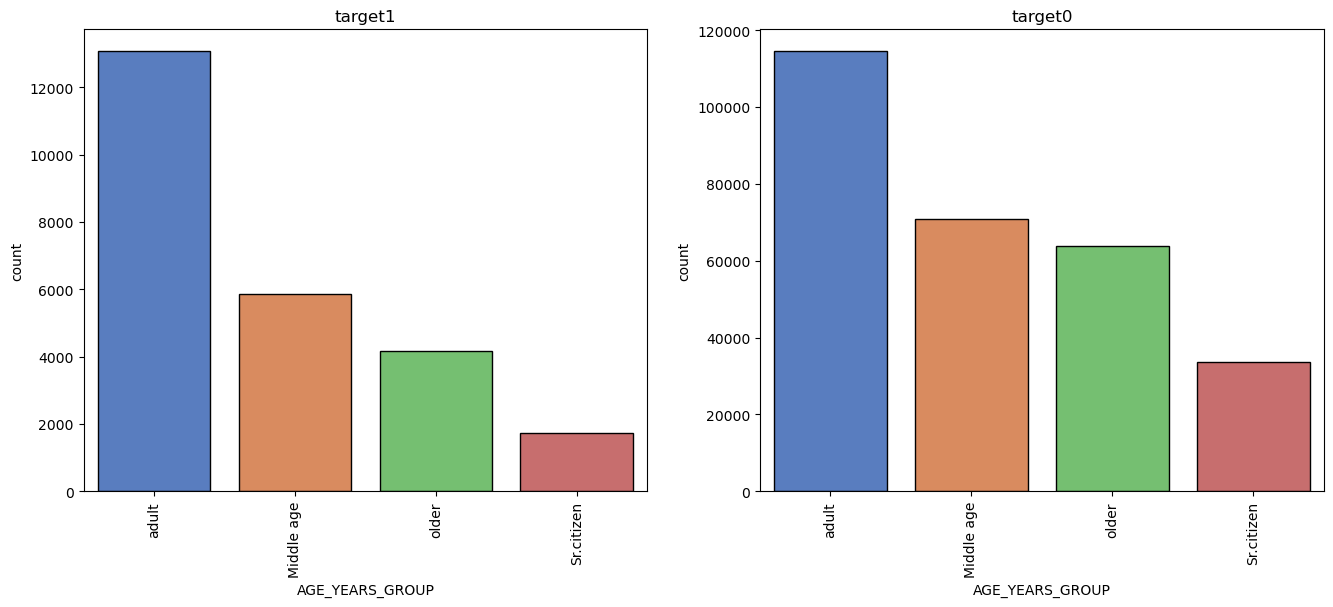

In [409]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(x='AGE_YEARS_GROUP',data=df_target1,palette='muted',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='AGE_YEARS_GROUP',data=df_target0 ,palette='muted',edgecolor='black')
plt.title('target0')
plt.xticks(rotation=90)

plt.show()

#### Insight from above graph: 
1. Adults are more in numbers to apply for loan.
2. They are also more likely to be defaulted as their percentage is more in target1 data set as compered to target0 data set.

#### Analysing AMT_GOODS_PRICE_RANGE for both df_target1 and df_target0


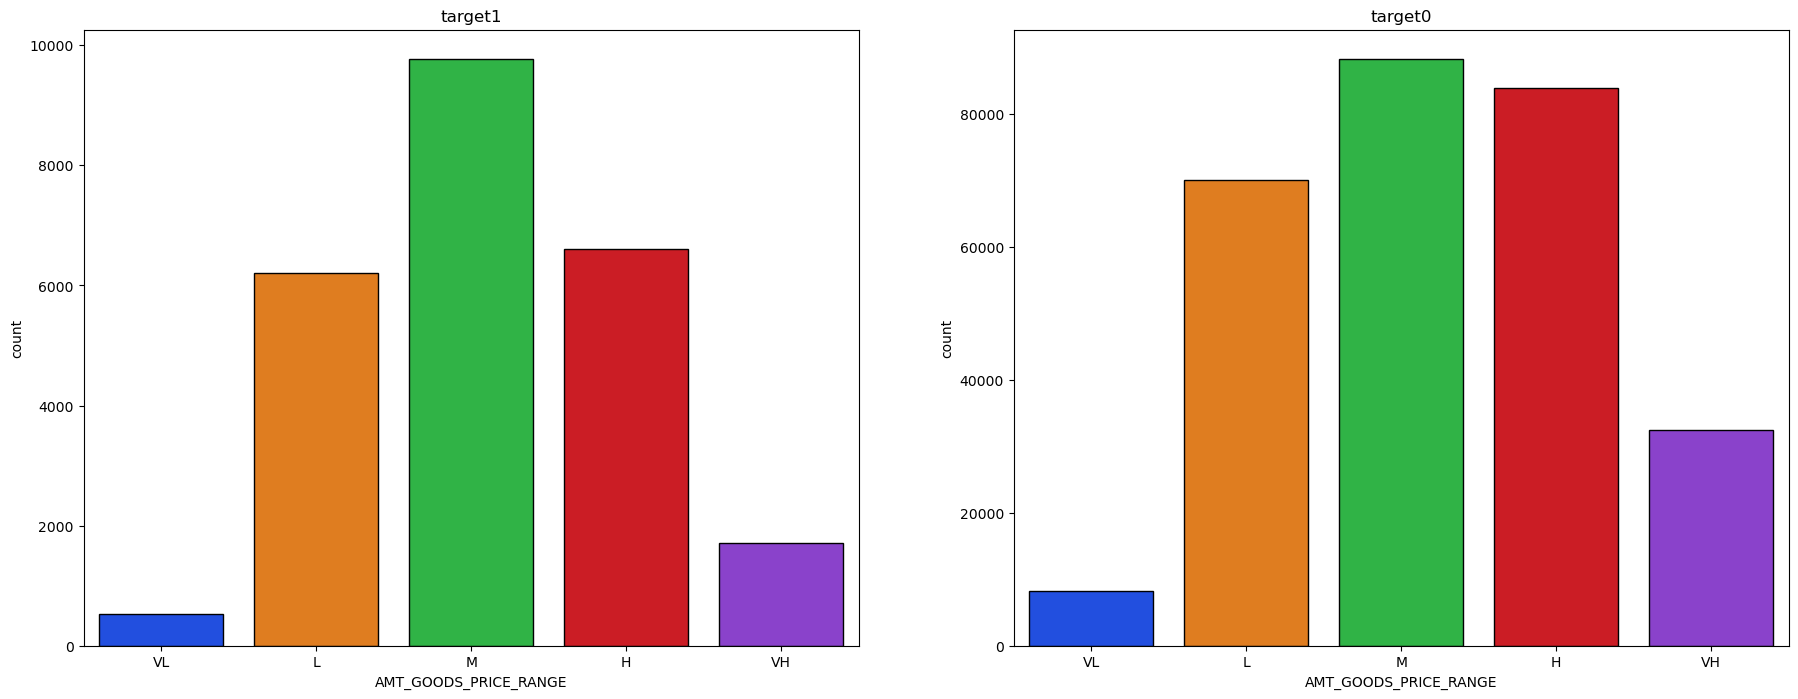

In [413]:
plt.figure(figsize=(22,8))

plt.subplot(1,2,1)
sns.countplot(x='AMT_GOODS_PRICE_RANGE' ,data=df_target1,palette='bright',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
ax = sns.countplot(x='AMT_GOODS_PRICE_RANGE' ,data=df_target0,palette='bright',edgecolor='black' )
plt.title('target0')
plt.xticks(rotation=0)

plt.show()

#### Insight from above graph:
1. Clients whose goods price range is in M are more in numbers to apply for loan.
2. They are also more likely to be defaulted as their percentage is more in target1 data set as compered to target0 data set.

#### Analysing AMT_ANNUITY_PRICE_RANGE for both df_target1 and df_target0

In [417]:
df_app_data['AMT_ANNUITY_RANGE'].value_counts()

AMT_ANNUITY_RANGE
VL    154875
L      77772
M      53563
H      20792
VH       505
Name: count, dtype: int64

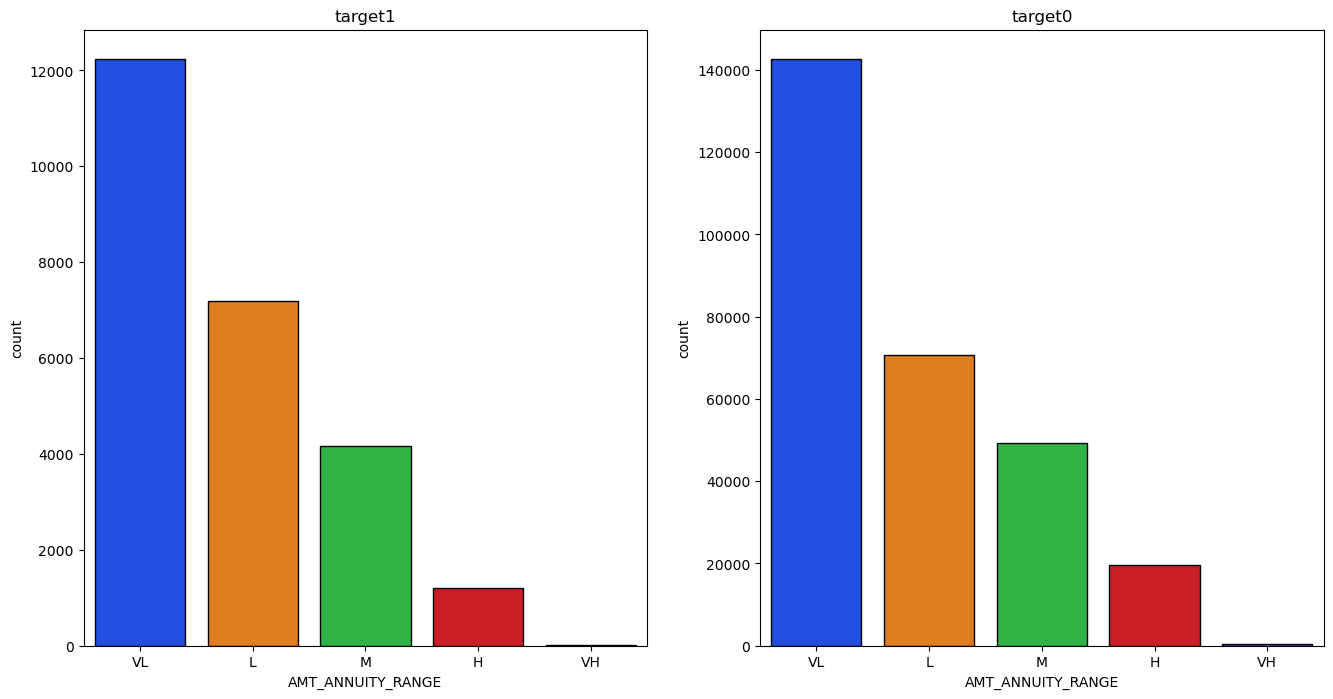

In [418]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.countplot(x='AMT_ANNUITY_RANGE' ,data=df_target1,palette='bright',edgecolor='black')
plt.title('target1')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
sns.countplot(x='AMT_ANNUITY_RANGE' ,data=df_target0,palette='bright',edgecolor='black' )
plt.title('target0')
plt.xticks(rotation=0)

plt.show()

#### Insight from above graph : 
We can observe that mostly clients having annunity range VL are likely to apply for loan and defaulter percentage is also more for this range.

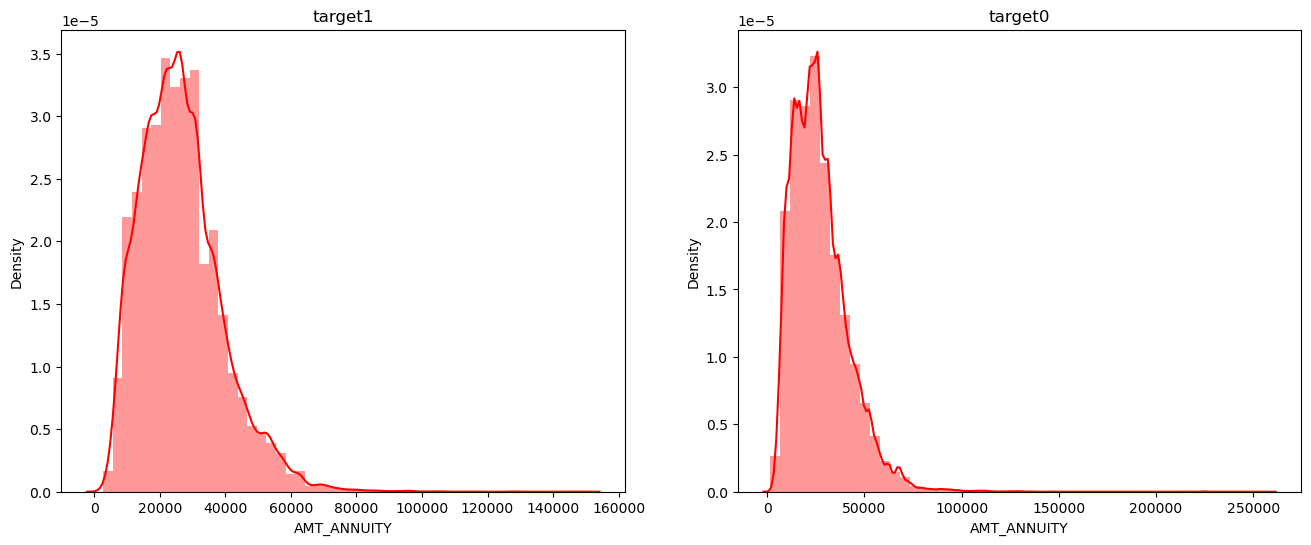

In [421]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.distplot(df_target1['AMT_ANNUITY'],color='red')
plt.title('target1')

plt.subplot(1,2,2)
sns.distplot(df_target0['AMT_ANNUITY'] ,color='red')
plt.title('target0')

plt.show()#hist =false

# Bivariate and Multivariate Analysis

## Numeric- numeric analysis

#### Analysing 'AMT_INCOME_TOTAL' Vs 'AMT_CREDIT'

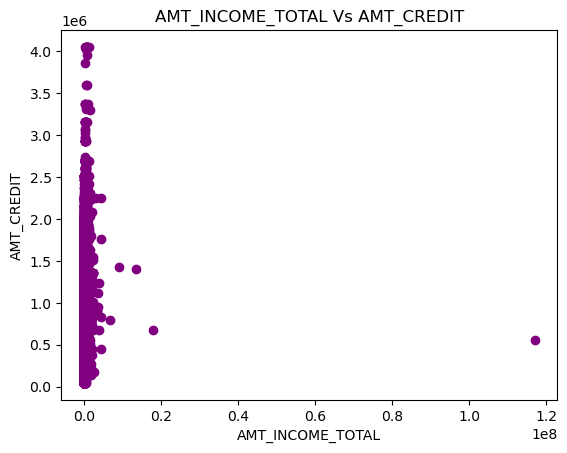

In [427]:
plt.scatter(df_app_data['AMT_INCOME_TOTAL'],df_app_data['AMT_CREDIT'],color='purple' )
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL Vs AMT_CREDIT')
plt.show()

#### Insights from above graph : 
there is a trend like clients with higher income have higher credit amounts. we can see that lower income is associated with lower credit.There are outliers also. 

#### Analysing 'AMT_INCOME_TOTAL_RANGE' Vs 'TARGET'


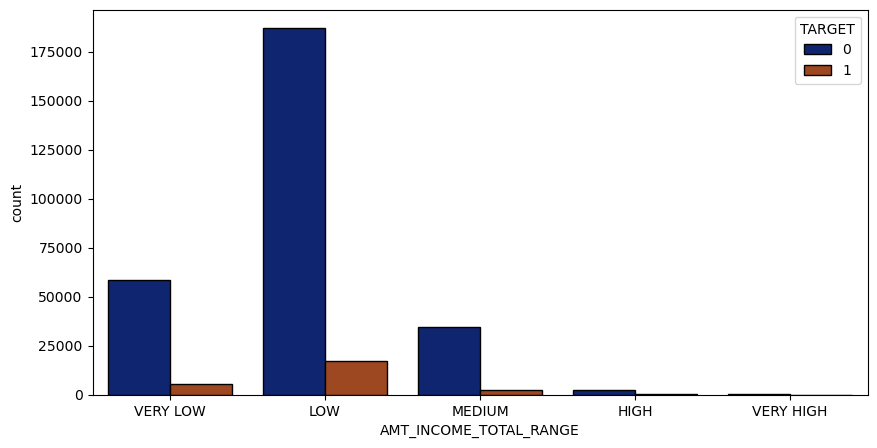

In [431]:
plt.figure(figsize=(10,5))
sns.countplot(x='AMT_INCOME_TOTAL_RANGE',data=df_app_data,hue='TARGET',palette = 'dark',edgecolor='black' )
plt.show()

#### Insight from above graph : 
clients with LOW income range are likely to be defaulted as low income range has more value.

#### Analysing 'AMT_CREDIT_RANGE' Vs 'TARGET

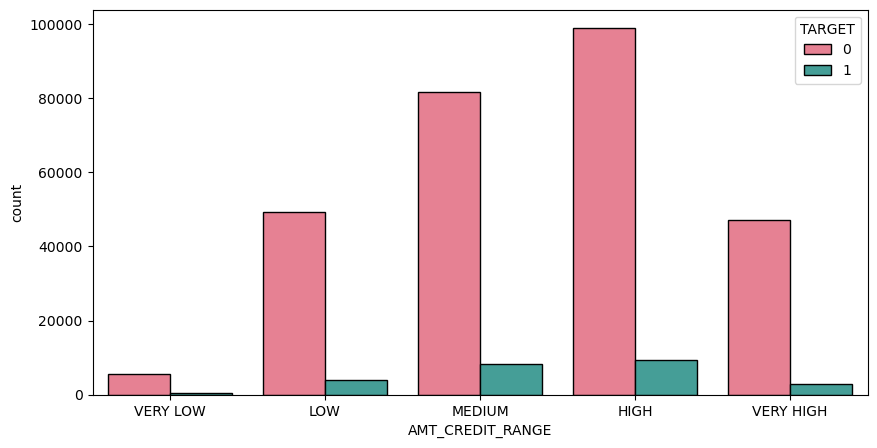

In [437]:
plt.figure(figsize=(10,5))
sns.countplot(x='AMT_CREDIT_RANGE',data=df_app_data,hue='TARGET',palette='husl',edgecolor='black')
plt.show()

#### Insight from above graph : 
1. Clients having HIGH credit range are more.
2. Clients with HIGH & MEDIUM credit are likely to be defaulters than others.

#### Finding top 10 correlation  

In [440]:
corr_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE_YEARS','CNT_CHILDREN','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION']

In [441]:
corr_columns_target = df_app_data[['TARGET'] + [i for i in corr_columns]].corr()
corr_columns_target

TARGET  AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                       1.000000         -0.003982   -0.030369   
AMT_INCOME_TOTAL            -0.003982          1.000000    0.156870   
AMT_CREDIT                  -0.030369          0.156870    1.000000   
AMT_ANNUITY                 -0.012815          0.191657    0.770127   
AGE_YEARS                   -0.078200         -0.027270    0.055460   
CNT_CHILDREN                 0.019164          0.013020    0.002310   
CNT_FAM_MEMBERS              0.009308          0.016341    0.063160   
REGION_RATING_CLIENT         0.058899         -0.085465   -0.101776   
REGION_RATING_CLIENT_W_CITY  0.060893         -0.091735   -0.110915   
REG_REGION_NOT_LIVE_REGION   0.005576          0.031191    0.024010   
REG_REGION_NOT_WORK_REGION   0.006942          0.062340    0.051929   

                             AMT_ANNUITY  AGE_YEARS  CNT_CHILDREN  \
TARGET                         -0.012815  -0.078200      0.019164   
AMT_INCOME_TOTAL                0.191657  -0.027270      0.013020   
AMT_CREDIT                      0.770127   0.055460      0.002310   
AMT_ANNUITY                     1.000000  -0.009453      0.021629   
AGE_YEARS                      -0.009453   1.000000     -0.332902   
CNT_CHILDREN                    0.021629  -0.332902      1.000000   
CNT_FAM_MEMBERS                 0.075541  -0.278865      0.877524   
REGION_RATING_CLIENT           -0.128516  -0.009393      0.025657   
REGION_RATING_CLIENT_W_CITY    -0.141674  -0.008110      0.024987   
REG_REGION_NOT_LIVE_REGION      0.041291  -0.065485     -0.013371   
REG_REGION_NOT_WORK_REGION      0.079403  -0.095788      0.008381   

                             CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET                              0.009308              0.058899   
AMT_INCOME_TOTAL                    0.016341             -0.085465   
AMT_CREDIT                          0.063160             -0.101776   
AMT_ANNUITY                         0.075541             -0.128516   
AGE_YEARS                          -0.278865             -0.009393   
CNT_CHILDREN                        0.877524              0.025657   
CNT_FAM_MEMBERS                     1.000000              0.029688   
REGION_RATING_CLIENT                0.029688              1.000000   
REGION_RATING_CLIENT_W_CITY         0.030778              0.950842   
REG_REGION_NOT_LIVE_REGION         -0.017133             -0.044166   
REG_REGION_NOT_WORK_REGION          0.003133             -0.139890   

                             REGION_RATING_CLIENT_W_CITY  \
TARGET                                          0.060893   
AMT_INCOME_TOTAL                               -0.091735   
AMT_CREDIT                                     -0.110915   
AMT_ANNUITY                                    -0.141674   
AGE_YEARS                                      -0.008110   
CNT_CHILDREN                                    0.024987   
CNT_FAM_MEMBERS                                 0.030778   
REGION_RATING_CLIENT                            0.950842   
REGION_RATING_CLIENT_W_CITY                     1.000000   
REG_REGION_NOT_LIVE_REGION                     -0.041143   
REG_REGION_NOT_WORK_REGION                     -0.133423   

                             REG_REGION_NOT_LIVE_REGION  \
TARGET                                         0.005576   
AMT_INCOME_TOTAL                               0.031191   
AMT_CREDIT                                     0.024010   
AMT_ANNUITY                                    0.041291   
AGE_YEARS                                     -0.065485   
CNT_CHILDREN                                  -0.013371   
CNT_FAM_MEMBERS                               -0.017133   
REGION_RATING_CLIENT                          -0.044166   
REGION_RATING_CLIENT_W_CITY                   -0.041143   
REG_REGION_NOT_LIVE_REGION                     1.000000   
REG_REGION_NOT_WORK_REGION                     0.450804   

                             REG_REGION_NOT_WORK_REGION  
TARGET              

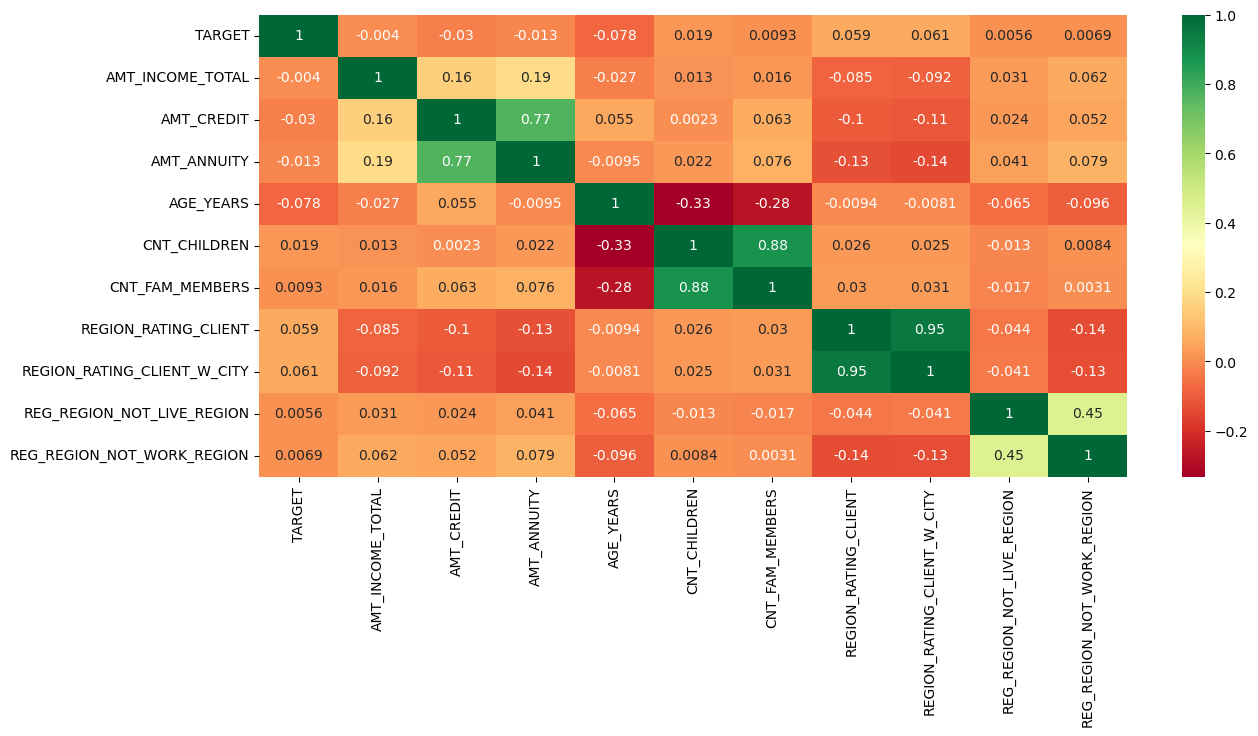

In [442]:
plt.figure(figsize=(14,6))
sns.heatmap(corr_columns_target,annot = True,cmap='RdYlGn')
plt.show()

### From above correlation plot ,we can clearly see TOP correlation 
We can observe positive and negative correlation:
TOP correlations:
1. 'AMT_INCOME_TOTAL' Vs 'AMT_CREDIT'
2. 'AMT_INCOME_TOTAL' Vs 'AMT_ANNUITY'
3. 'AMT_CREDIT' Vs 'AMT_ANNUITY'
4. 'CNT_FAM_MEMBERS' Vs 'CNT_CHILDREN'
5. 'REGION_RATING_CLIENT' Vs 'REGION_RATING_CLIENT_W_CITY'
6. 'REG_REGION_NOT_WORK_REGION' Vs 'REG_REGION_NOT_LIVE_REGION'. 
7. 'CNT_CHILDREN' Vs 'AGE_YEARS' (negative correlation)
8. 'CNT_FAM_MEMBERS' Vs 'AGE_YEARS'(negative correlation)
9. 'REGION_RATING_CLIENT_W_CITY' Vs 'AMT_CREDIT' (negative correlation)
10. 'REG_REGION_NOT_WORK_REGION' Vs 'REGION_RATING_CLIENT' (negative correlation)
11. 'REG_REGION_NOT_WORK_REGION' Vs  'REGION_RATING_CLIENT_W_CITY'(negative correlation)

### Multivariate analysis

#### Analysing 'AMT_INCOME_TOTAL' Vs 'AMT_CREDIT' Vs 'TARGET'

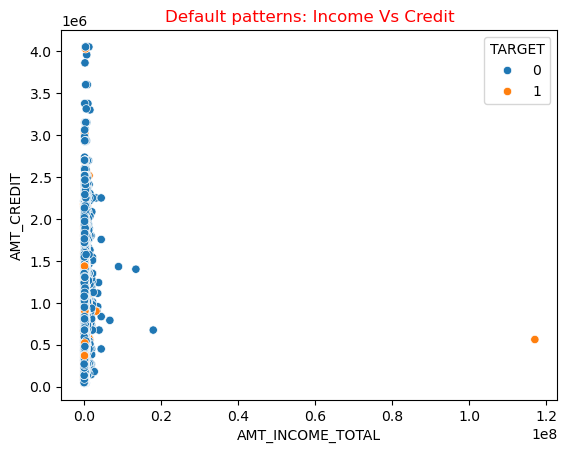

In [447]:
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Income Vs Credit',color='r')
plt.show()

#### Insights: 
For clients with lower income,credit amount is varying so probability is clients with lower income with more credit are likely to be defaulter.

#### Analysing 'AMT_INCOME_TOTAL_RANGE' Vs 'AMT_CREDIT_RANGE' Vs 'TARGET'

 As there are outliers in AMT_INCOME_TOTAL and  in AMT_CREDIT so for better understanding ,plotting a bar graph between AMT_INCOME_TOTAL_RANGE Vs AMT_CREDIT_RANGE

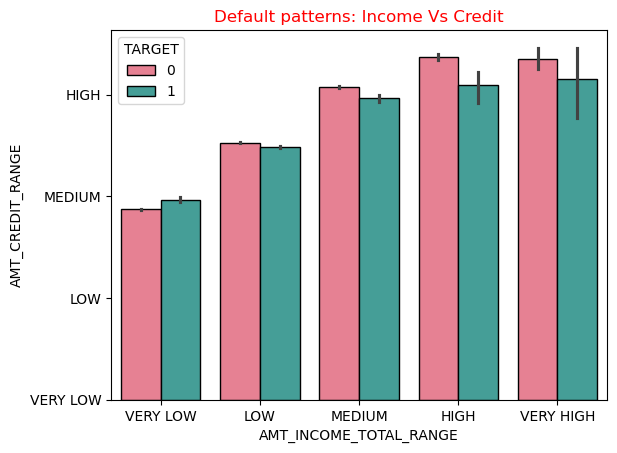

In [453]:
sns.barplot(x='AMT_INCOME_TOTAL_RANGE',y='AMT_CREDIT_RANGE',hue='TARGET',data=df_app_data,palette='husl',edgecolor='black')
plt.gca().invert_yaxis() 
plt.title('Default patterns: Income Vs Credit',color='r')
plt.show()

#### Insights: 
1. We can see clients with higher income have higher credit also as income increases credit tends to increase.
2. Clients with very low income range are likely to be defaulters.

#### Analysing 'AMT_INCOME_TOTAL' Vs 'AMT_ANNUITY' Vs 'TARGET'


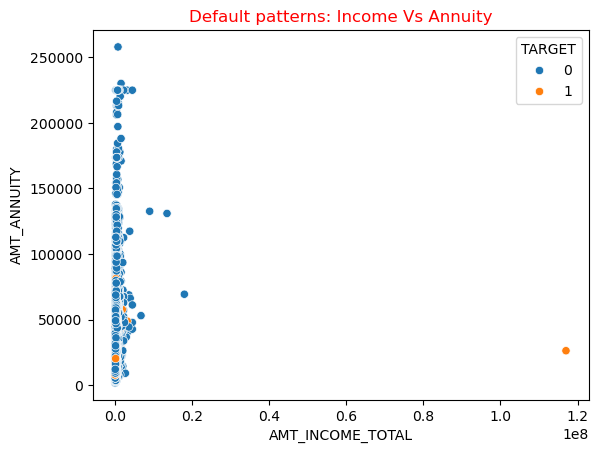

In [459]:
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_ANNUITY',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Income Vs Annuity',color='r')
plt.show()

#### Insights: 
1. We can see number of data points are more at lower income side.This means that the ratio of clients more for lower income  who are taking loans.
2. outliers are also there.
3. Graph suggests us that clients who have lower income and if their annuity amount is more then they are likely to be deafaulter.

for more better understanding ,plotting a bar graph between AMT_INCOME_TOTAL_RANGE Vs AMT_CREDIT_RANGE

#### Analysing 'AMT_INCOME_TOTAL_RANGE' Vs 'AMT_ANNUITY_RANGE' Vs 'TARGET'

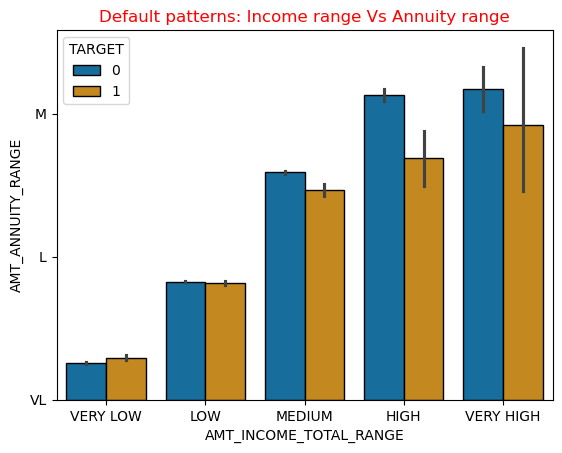

In [464]:
sns.barplot(x='AMT_INCOME_TOTAL_RANGE',y='AMT_ANNUITY_RANGE',data= df_app_data,hue= 'TARGET',palette='colorblind',edgecolor='black')
plt.gca().invert_yaxis() 
plt.title('Default patterns: Income range Vs Annuity range',color='r')
plt.show()

# Insights: 
 1. Here we can observe that clients who have lower income range are likely to be deafaulter.
 2. As  income range increases, annuity tends to increase.


#### Analysing 'AMT_CREDIT' Vs 'AMT_ANNUITY' Vs 'TARGET'

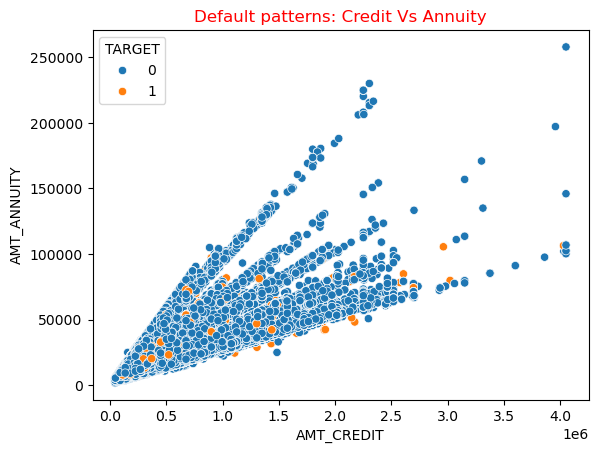

In [467]:
sns.scatterplot(x='AMT_CREDIT',y='AMT_ANNUITY',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Credit Vs Annuity',color='r')
plt.show()

#### Insights: 
1. We can see positive correlation between AMT_ANNUITY and AMT_CREDIT. if AMT_CREDIT increases then AMT_ANNUITY also increases.
2. We can see data is imbalanced as there are larger number of loan approvals than rejections.

Plotting a bar graph between feature engineering columns AMT_CREDIT_RANGE Vs AMT_ANNUITY_RANGE

#### Analysing 'AMT_CREDIT_RANGE' Vs 'AMT_ANNUITY_RANGE' Vs 'TARGET'

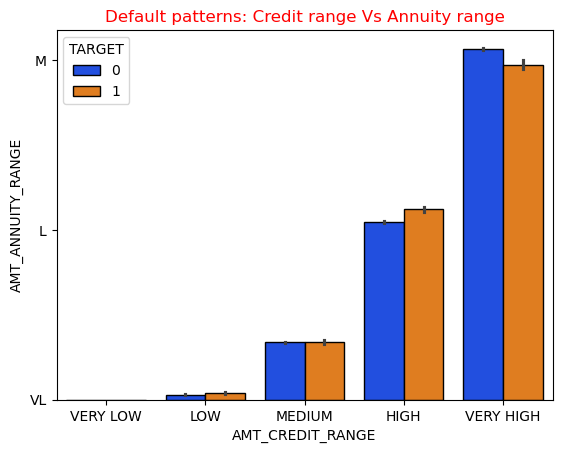

In [471]:
sns.barplot(x='AMT_CREDIT_RANGE',y='AMT_ANNUITY_RANGE',data= df_app_data,hue= 'TARGET',palette='bright',edgecolor='black')
plt.gca().invert_yaxis() 
plt.title('Default patterns: Credit range Vs Annuity range',color='r')
plt.show()

#### Insights: 
1. We can see as AMT_CREDIT increases ,AMT_ANNUITY also increases.
2. Cliets with LOW and HIGH credit category are likely to be defaulters.

#### Analysing 'CNT_FAM_MEMBERS' Vs 'CNT_CHILDREN' Vs 'TARGET'

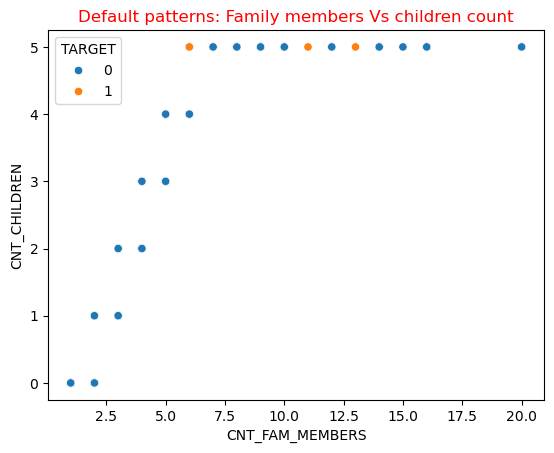

In [474]:
sns.scatterplot(x='CNT_FAM_MEMBERS',y='CNT_CHILDREN',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Family members Vs children count',color='r')
plt.show()

#### Insights: 
1. We can observe clients with more children means more family members practically also true.
2. Clients with less family count and children count are not defaulters.
3. Clients with more than 4 children are likely to be defaulters.

#### Analysing 'REGION_RATING_CLIENT' Vs 'REGION_RATING_CLIENT_W_CITY'

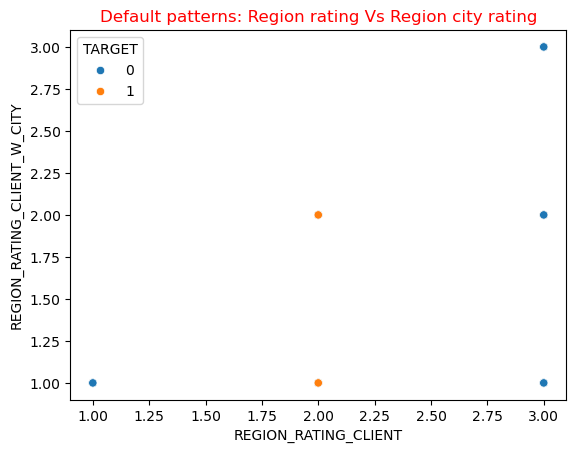

In [477]:
sns.scatterplot(x='REGION_RATING_CLIENT',y='REGION_RATING_CLIENT_W_CITY',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Region rating Vs Region city rating',color='r')
plt.show()

#### Insights: 
Here we can observe that clients with lower region rating and lower region rating as per city, are more likely to be defaulters.

#### Analysing ''AGE_YEARS' Vs 'AMT_CREDIT' Vs 'TARGET'

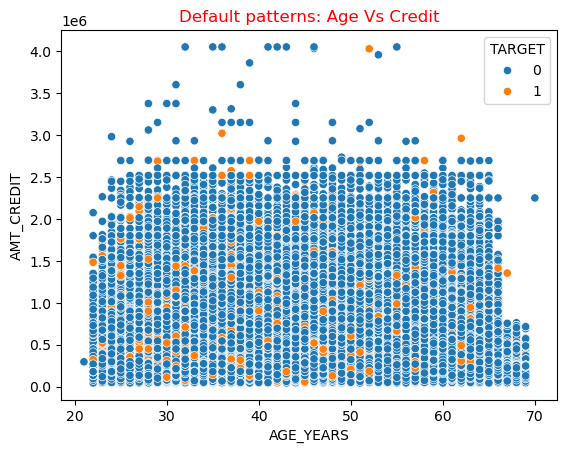

In [480]:
sns.scatterplot(x='AGE_YEARS',y='AMT_CREDIT',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Age Vs Credit',color='r')
plt.show()

#### Insights: 
1. Data points are scattered between 20 to 70 years of age that means cliets are in range of 20 to 70 years. 
2. We can see that clients in age range of 25 to 45 are taking more credit amounts.

For more better understanding can plot bar graph for feature engineering columns.

#### Analysing 'AGE_YEARS_GROUP' Vs 'AMT_CREDIT_RANGE' Vs 'TARGET'

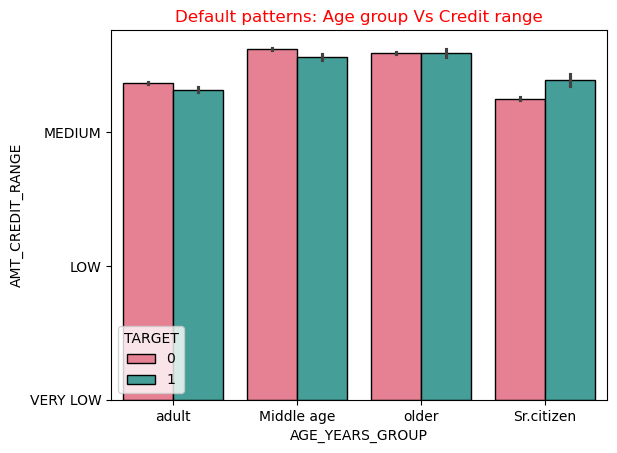

In [485]:
sns.barplot(x='AGE_YEARS_GROUP',y='AMT_CREDIT_RANGE',data= df_app_data,hue= 'TARGET',palette='husl',edgecolor='black')
plt.gca().invert_yaxis() 
plt.title('Default patterns: Age group Vs Credit range',color='r')
plt.show()

#### Insights: 
Sr.citizens with high credit amount are more likely to be defaulters .

#### Analysing 'CNT_FAM_MEMBERS' VS 'AMT_ANNUITY' Vs 'TARGET'

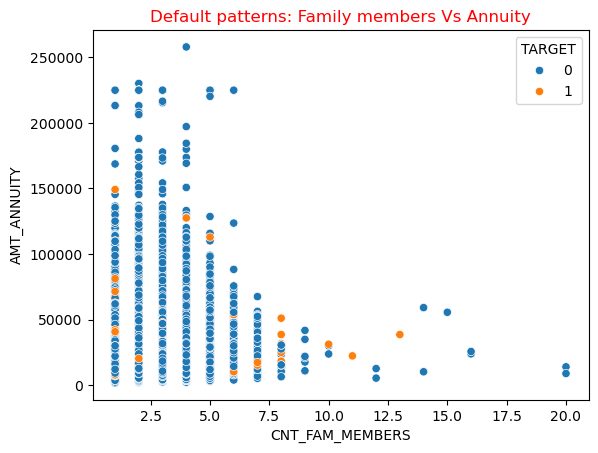

In [488]:
sns.scatterplot(x='CNT_FAM_MEMBERS',y='AMT_ANNUITY',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Family members Vs Annuity',color='r')
plt.show()

#### Insights: 
1. Here we can see negative correlation as count of family members increases, annuity amount decreases.
2. in some cases there is high annuity amount for more number of family members.

#### Analysing 'CNT_CHILDREN' Vs 'AGE_YEARS' Vs 'TARGET'

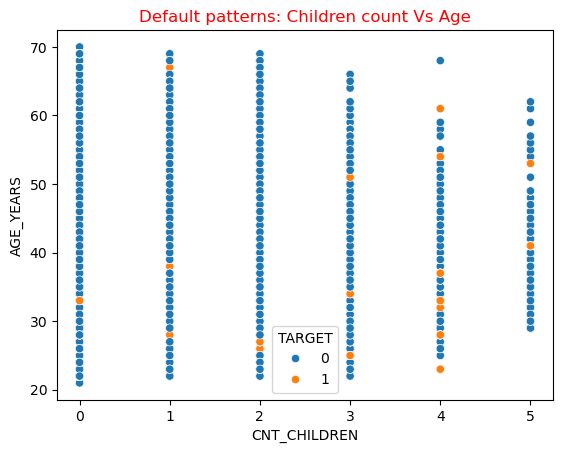

In [491]:
sns.scatterplot(x='CNT_CHILDREN',y='AGE_YEARS',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Children count Vs Age',color='r')
plt.show()

#### Insights:
 We can observe that young people are slightly more who likely to be defaulters.    


#### Analysing 'REGION_RATING_CLIENT_W_CITY' Vs 'AMT_CREDIT' Vs 'TARGET'

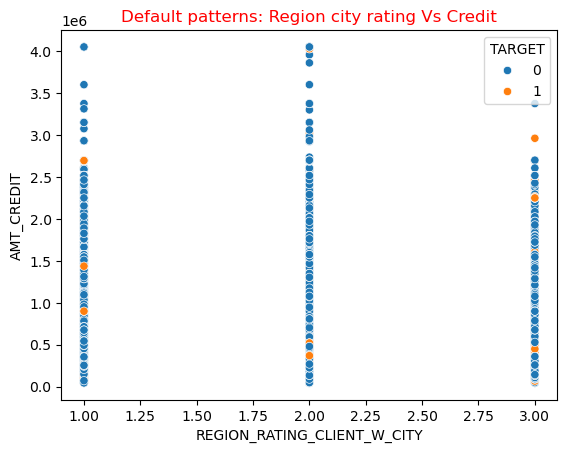

In [494]:
sns.scatterplot(x='REGION_RATING_CLIENT_W_CITY',y='AMT_CREDIT',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Region city rating Vs Credit',color='r')
plt.show()

#### Analysing 'NAME_FAMILY_STATUS' Vs 'CNT_CHILDREN' Vs 'TARGET'

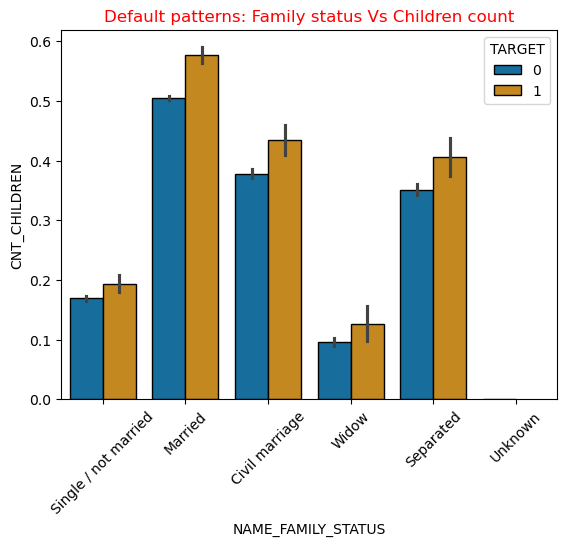

In [496]:
sns.barplot(x='NAME_FAMILY_STATUS',y='CNT_CHILDREN',data= df_app_data,hue= 'TARGET',palette='colorblind',edgecolor='black')
plt.xticks(rotation=45)
plt.title('Default patterns: Family status Vs Children count',color='r')
plt.show()

#### Insights : 
1. We can clearly see that married clients with more children are likely to be defaulters.
2. Separated clients having more children are also 

#### Analysing 'AMT_CREDIT' Vs 'AMT_GOODS_PRICE' Vs 'TARGET'

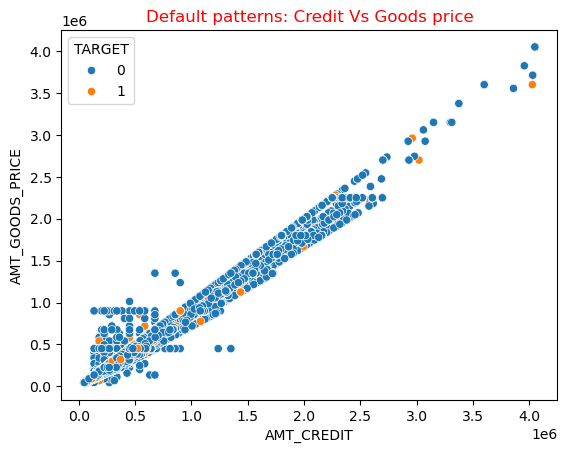

In [500]:
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data= df_app_data,hue= 'TARGET')
plt.title('Default patterns: Credit Vs Goods price',color='r')
plt.show()

#### Insights from above graph : 
1. This scatter plot shows positive correlation between amt_credit and amt goods price. it means more the price of goods, more credit amounts.
2. Clients with lower goods price and lower credit amount are more likely to be defaulter.Some are in higher range also but percentage is more for lower amount.

#### Analysing 'NAME_INCOME_TYPE' Vs 'NAME_EDUCATION_TYPE' Vs 'TARGET'

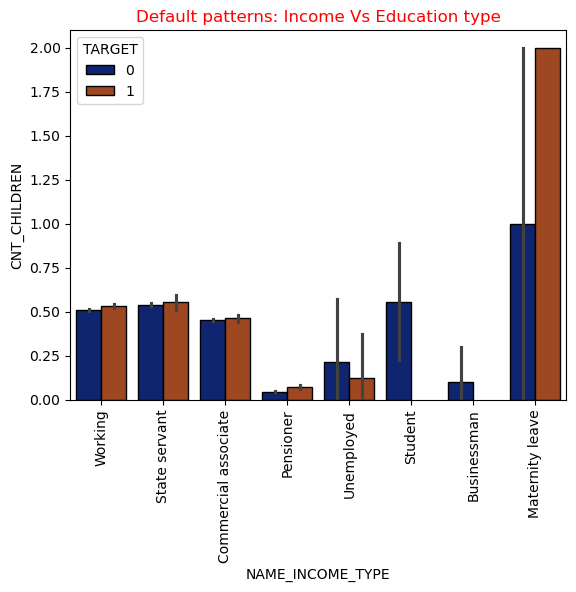

In [503]:
sns.barplot(x='NAME_INCOME_TYPE',y='CNT_CHILDREN' ,data= df_app_data,hue= 'TARGET',palette='dark',edgecolor='black')
plt.xticks(rotation=90)
plt.title('Default patterns: Income Vs Education type',color='r')
plt.show()

#### Insighs:
1. females who are on maternity leave are more prone to take loans 
2. clients with working status also have defaulters but percentage is low.
3. clients who are state servert also have less number of defaulters
4. females who are on maternity leave are more likely to be defaulter.

In [505]:
df_app_data.shape

(307511, 38)

#### Loading the Previous application Data set as df_previous_data

In [507]:
df_previous_data = pd.read_csv("previous_application.csv")
df_previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [508]:
df_previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [509]:
df_previous_data.shape

(1670214, 37)

In [510]:
df_previous_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Handling missing values

In [512]:
#Finding missing value in 
df_previous_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [513]:
#percentage of missing values:
df_previous_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [515]:
# setting a threshold value 40 that means columns having more than 40% missing values
threshold_value= 40
columns_drop_prev =list(df_previous_data.columns[100*df_previous_data.isnull().mean()>threshold_value])
print(columns_drop_prev)

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [516]:
#Dropping the columns having more than 40% missing values
df_previous_data=df_previous_data.drop(columns_drop_prev,axis=1)

In [517]:
df_previous_data.shape

(1670214, 26)

In [518]:
# checking again percentage of missing value after dropping columns more than 40% missing value:
df_previous_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [519]:
df_previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [520]:
df_previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### Handling missing values

#### Handling the missing values of  'AMT_ANNUITY'

In [523]:
df_previous_data['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

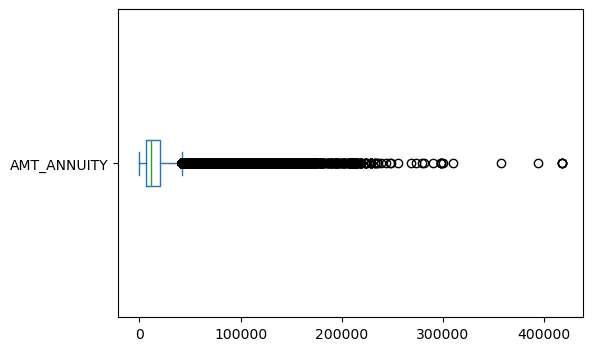

In [524]:
plt.figure(figsize=(6,4))
df_previous_data['AMT_ANNUITY'].plot.box(vert=False)
plt.show()

In [525]:
df_previous_data['AMT_ANNUITY'].mode()

0    2250.0
Name: AMT_ANNUITY, dtype: float64

In [527]:
df_previous_data['AMT_ANNUITY'].median()

11250.0

In [528]:
#imputing missing value with median as data type is float and that too percent is too less so we can opt any.
df_previous_data['AMT_ANNUITY'] = df_previous_data['AMT_ANNUITY'].fillna(df_previous_data['AMT_ANNUITY'].median())

In [529]:
df_previous_data['AMT_ANNUITY'].isnull().sum()

0

#### Handling the missing values of 'AMT_CREDIT'

In [531]:
df_previous_data['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

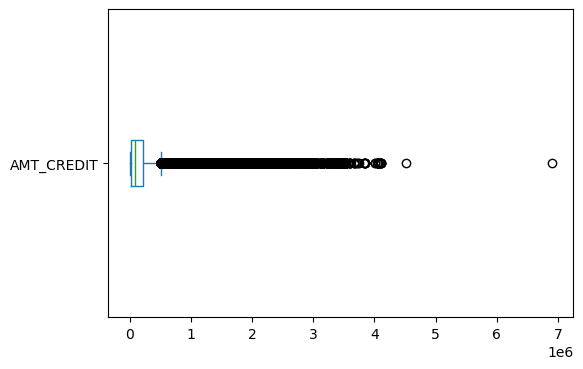

In [532]:
plt.figure(figsize=(6,4))
df_previous_data['AMT_CREDIT'].plot.box(vert=False)
plt.show()

In [533]:
df_previous_data['AMT_CREDIT'].mode()

0    0.0
Name: AMT_CREDIT, dtype: float64

In [534]:
#As we can see there are many outliers so imputing missing value with mode rather then mean.
df_previous_data['AMT_CREDIT'] = df_previous_data['AMT_CREDIT'].fillna(df_previous_data['AMT_CREDIT'].mode()[0])

In [535]:
df_previous_data['AMT_CREDIT'].isnull().sum()

0

#### Handling the missing values of 'AMT_GOODS_PRICE'

In [537]:
df_previous_data['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

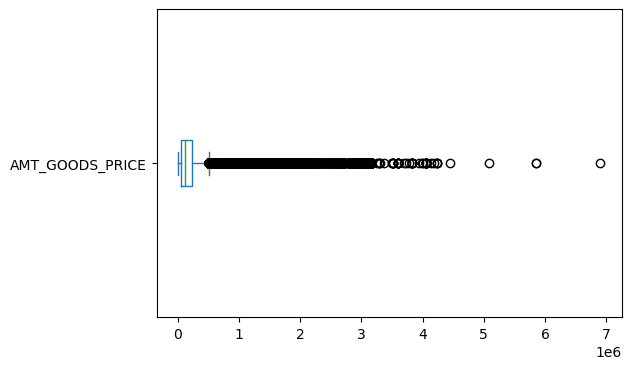

In [538]:
plt.figure(figsize=(6,4))
df_previous_data['AMT_GOODS_PRICE'].plot.box(vert=False)
plt.show()

In [539]:
df_previous_data['AMT_GOODS_PRICE'].median()

112320.0

In [540]:
#As we can see there are many outliers so imputing missing value with median rather then mean.
df_previous_data['AMT_GOODS_PRICE'] = df_previous_data['AMT_GOODS_PRICE'].fillna(df_previous_data['AMT_GOODS_PRICE'].median())

In [541]:
df_previous_data['AMT_GOODS_PRICE'].isnull().sum()

0

#### Handling the missing values of 'CNT_PAYMENT'

In [543]:
df_previous_data['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

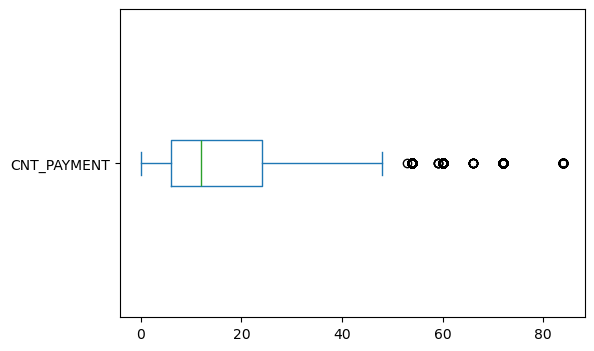

In [544]:
plt.figure(figsize=(6,4))
df_previous_data['CNT_PAYMENT'].plot.box(vert=False)
plt.show()

In [545]:
df_previous_data['CNT_PAYMENT'].median() 

12.0

In [547]:
#As we can see there are many outliers so imputing missing value with median rather then mean.
df_previous_data['CNT_PAYMENT'] = df_previous_data['CNT_PAYMENT'].fillna(df_previous_data['CNT_PAYMENT'].median())

In [548]:
df_previous_data['CNT_PAYMENT'].isnull().sum()

0

#### Handling the missing values of 'PRODUCT_COMBINATION'

In [550]:
df_previous_data['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [551]:
df_previous_data['PRODUCT_COMBINATION'].mode()[0]

'Cash'

In [552]:
# As product_combination is categorical variable so we can fill missing values by mode().
df_previous_data['PRODUCT_COMBINATION'] = df_previous_data['PRODUCT_COMBINATION'].fillna(df_previous_data['PRODUCT_COMBINATION'].mode()[0])

In [553]:
df_previous_data['PRODUCT_COMBINATION'].isnull().sum()

0

In [554]:
#check again percentage of missing values after imputation
df_previous_data.isnull().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

##### Now there are no missing values in columns.

#### Handling the XAP and XNA values in NAME CASH LOAN PURPOSE 

In [558]:
df_previous_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

Since count of XAP and XNA values are too high so can replace with 'Unknown'.

In [560]:
df_previous_data['NAME_CASH_LOAN_PURPOSE'] = df_previous_data['NAME_CASH_LOAN_PURPOSE'].apply(lambda x: x.replace('XNA','Unknown'))
df_previous_data['NAME_CASH_LOAN_PURPOSE'] = df_previous_data['NAME_CASH_LOAN_PURPOSE'].apply(lambda x: x.replace('XAP','Unknown'))


In [561]:
df_previous_data['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
Unknown                             1600579
Repairs                               23765
Other                                 15608
Urgent needs                           8412
Buying a used car                      2888
Building a house or an annex           2693
Everyday expenses                      2416
Medicine                               2174
Payments on other loans                1931
Education                              1573
Journey                                1239
Purchase of electronic equipment       1061
Buying a new car                       1012
Wedding / gift / holiday                962
Buying a home                           865
Car repairs                             797
Furniture                               749
Buying a holiday home / land            533
Business development                    426
Gasification / water supply             300
Buying a garage                         136
Hobby                                    55
Money for

#### Handling the XNA values in NAME_PAYMENT_TYPE column

In [563]:
df_previous_data['NAME_PAYMENT_TYPE'].value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

Since count of  XNA values are too high so can replace with 'Unknown'.

In [565]:
df_previous_data['NAME_PAYMENT_TYPE'] = df_previous_data['NAME_PAYMENT_TYPE'].apply(lambda x: x.replace('XNA','Unknown'))

In [566]:
df_previous_data['NAME_PAYMENT_TYPE'].value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
Unknown                                       627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

#### Handling the XAP and XNA values in CODE_REJECT_REASON column

In [568]:
df_previous_data['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

Since count of XAP values are too high .XNA values are not too high as compared to XAP but can replace with 'Unknown'.

In [570]:
df_previous_data['CODE_REJECT_REASON'] = df_previous_data['CODE_REJECT_REASON'].apply(lambda x: x.replace('XAP','Unknown'))
df_previous_data['CODE_REJECT_REASON'] = df_previous_data['CODE_REJECT_REASON'].apply(lambda x: x.replace('XNA','Unknown'))

In [571]:
df_previous_data['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
Unknown    1358337
HC          175231
LIMIT        55680
SCO          37467
CLIENT       26436
SCOFR        12811
VERIF         3535
SYSTEM         717
Name: count, dtype: int64

#### Handling the  XNA values in NAME_SELLER_INDUSTRY column

In [573]:
df_previous_data['NAME_SELLER_INDUSTRY'].value_counts()

NAME_SELLER_INDUSTRY
XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: count, dtype: int64

Since count of XNA values are too high so can replace with 'Unknown'.

In [575]:
df_previous_data['NAME_SELLER_INDUSTRY'] = df_previous_data['NAME_SELLER_INDUSTRY'].apply(lambda x: x.replace('XNA','Unknown'))

In [576]:
df_previous_data['NAME_SELLER_INDUSTRY'].value_counts()

NAME_SELLER_INDUSTRY
Unknown                 855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: count, dtype: int64

#### Handling the  XNA values in NAME_PRODUCT_TYPE column

In [578]:
df_previous_data['NAME_PRODUCT_TYPE'].value_counts()

NAME_PRODUCT_TYPE
XNA        1063666
x-sell      456287
walk-in     150261
Name: count, dtype: int64

Since count of XNA values are too high so can replace with 'Unknown'.

In [581]:
df_previous_data['NAME_PRODUCT_TYPE'] = df_previous_data['NAME_PRODUCT_TYPE'].apply(lambda x: x.replace('XNA','Unknown'))

In [582]:
df_previous_data['NAME_PRODUCT_TYPE'].value_counts()

NAME_PRODUCT_TYPE
Unknown    1063666
x-sell      456287
walk-in     150261
Name: count, dtype: int64

#### Handling the  XNA values in NAME_CLIENT_TYPE column

In [584]:
df_previous_data['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: count, dtype: int64

In [585]:
df_previous_data['NAME_CLIENT_TYPE'].mode()

0    Repeater
Name: NAME_CLIENT_TYPE, dtype: object

In [586]:
df_previous_data['NAME_CLIENT_TYPE'] = df_previous_data['NAME_CLIENT_TYPE'].apply(lambda x: x.replace('XNA','Repeater'))

In [587]:
df_previous_data['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     1233202
New           301363
Refreshed     135649
Name: count, dtype: int64

In [588]:
df_previous_data['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: count, dtype: int64

In [589]:
df_previous_data['NAME_PORTFOLIO'] = df_previous_data['NAME_PORTFOLIO'].apply(lambda x: x.replace('XNA','Unknown'))

In [590]:
df_previous_data['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS        691011
Cash       461563
Unknown    372230
Cards      144985
Cars          425
Name: count, dtype: int64

#### Handling the  XNA values in NAME_GOODS_CATEGORY column

In [592]:
df_previous_data['NAME_GOODS_CATEGORY'].value_counts()

NAME_GOODS_CATEGORY
XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1


Since count of XNA values are too high so can replace with 'Unknown'.

In [594]:
df_previous_data['NAME_GOODS_CATEGORY'] = df_previous_data['NAME_GOODS_CATEGORY'].apply(lambda x: x.replace('XNA','Unknown'))

In [595]:
df_previous_data['NAME_GOODS_CATEGORY'].value_counts()

NAME_GOODS_CATEGORY
Unknown                     950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1


In [596]:
df_previous_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

Now we can check for outliers in numeric columns.

### Handling Outliers

'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT','NFLAG_LAST_APPL_IN_DAY'

#### Handling outliers in AMT_GOODS_PRICE

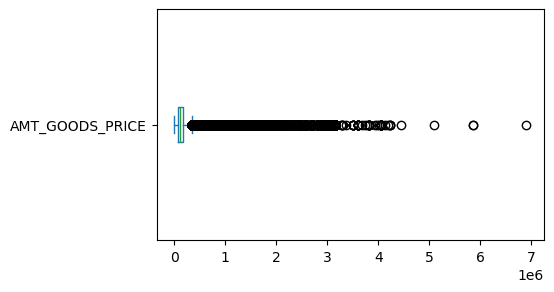

In [602]:
plt.figure(figsize=(5,3))
df_previous_data['AMT_GOODS_PRICE'].plot.box(vert=False)
plt.show()

In [603]:
df_previous_data['AMT_GOODS_PRICE'].describe()

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [604]:
#Outliers are there in AMT_GOODS_PRICE so here we can use Binning method.we can make buckets and this will reduce impact of outliers.
#so buckets are ['VL,'L','M','H','VH'] as VL for very low,L for low,M for medium,H for high,VH for very high.
df_previous_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(df_previous_data['AMT_GOODS_PRICE'],[0,100000,250000,500000,1000000,7000000],labels = ['VL','L','M','H','VH'])
df_previous_data['AMT_GOODS_PRICE_RANGE'].describe()

count     1663345
unique          5
top             L
freq       761336
Name: AMT_GOODS_PRICE_RANGE, dtype: object

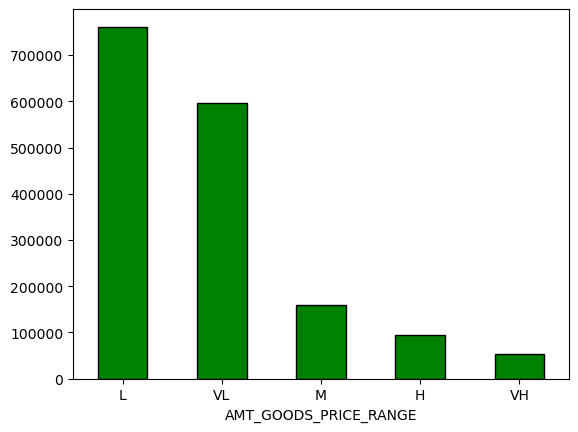

In [605]:
df_previous_data['AMT_GOODS_PRICE_RANGE'].value_counts().plot.bar(color= 'g',edgecolor='black')
plt.xticks(rotation=0)
plt.show()

#### Handling outliers in AMT_CREDIT

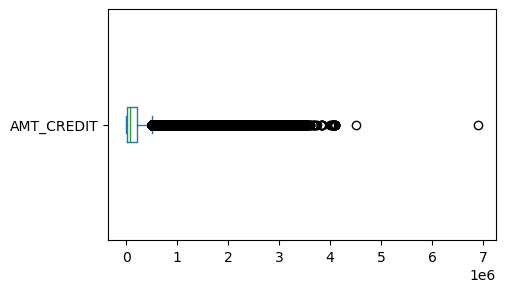

In [607]:
plt.figure(figsize=(5,3))
df_previous_data['AMT_CREDIT'].plot.box(vert=False)
plt.show()

In [608]:
# for handling outliers we can use binning.we can make buckets and this will reduce impact of outliers.
#so buckets are  very low, low,medium, high, very high.
df_previous_data['AMT_CREDIT'].describe()

count    1.670214e+06
mean     1.961139e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [609]:
df_previous_data['AMT_CREDIT_RANGE'] = pd.cut(df_previous_data['AMT_CREDIT'],[0,100000,250000,500000,1000000,7000000],labels = ['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])

In [610]:
df_previous_data['AMT_CREDIT'].value_counts()

AMT_CREDIT
0.00         336769
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: count, Length: 86803, dtype: int64

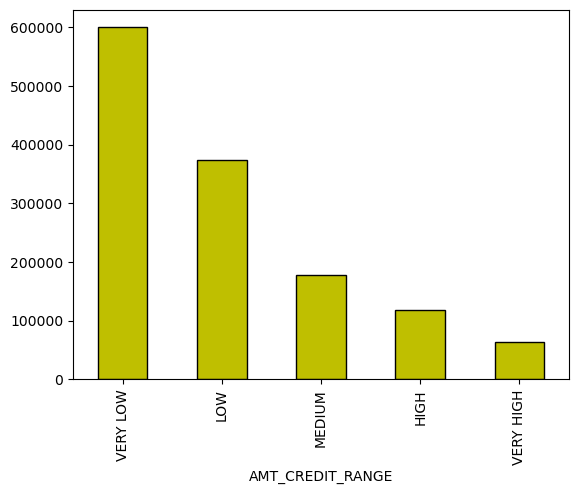

In [611]:
df_previous_data['AMT_CREDIT_RANGE'].value_counts().plot.bar(color='y',edgecolor='black')
plt.show()

#### Handling outliers in AMT_ANNUITY

In [613]:
# for handling outliers we can use binning.we can make buckets and this will reduce impact of outliers.
#so buckets are 'VL','L','M','H','VH'.
df_previous_data['AMT_ANNUITY'].describe()

count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

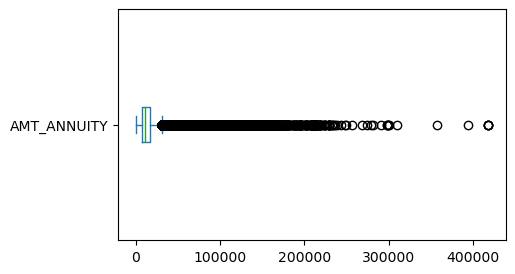

In [614]:
plt.figure(figsize=(5,3))
df_previous_data['AMT_ANNUITY'].plot.box(vert=False)
plt.show()

In [615]:
df_previous_data['AMT_ANNUITY_RANGE'] = pd.cut(df_previous_data['AMT_ANNUITY'],[0,20000,50000,100000,200000,500000],labels = ['VL','L','M','H','VH'])

In [616]:
df_previous_data['AMT_ANNUITY_RANGE'].value_counts()

AMT_ANNUITY_RANGE
VL    1329444
L      292451
M       43955
H        2616
VH        111
Name: count, dtype: int64

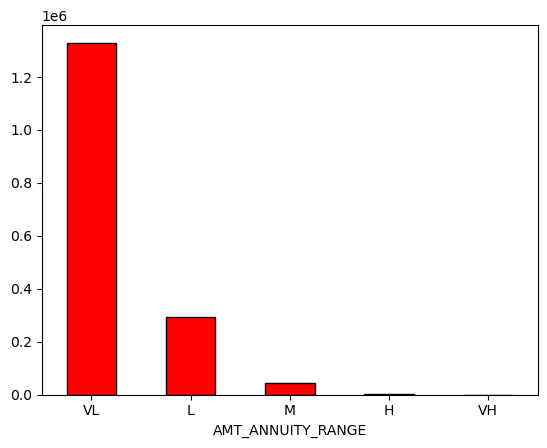

In [618]:
df_previous_data['AMT_ANNUITY_RANGE'].value_counts().plot.bar(color='r',edgecolor='black')
plt.xticks(rotation=0)
plt.show()

#### Handling outliers in CNT_PAYMENT

In [620]:
df_previous_data['CNT_PAYMENT'].describe()

count    1.670214e+06
mean     1.515057e+01
std      1.295220e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.600000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

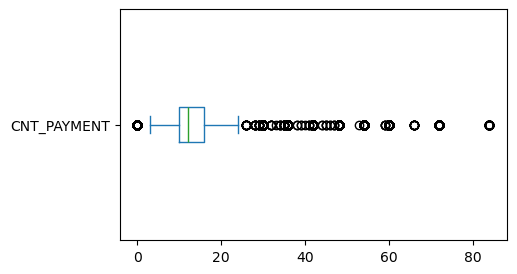

In [621]:
plt.figure(figsize=(5,3))
df_previous_data['CNT_PAYMENT'].plot.box(vert=False)
plt.show()

In [622]:
#capping at 25 as 75% value is 16 .mostly values lies there.
df_previous_data['CNT_PAYMENT'] =df_previous_data['CNT_PAYMENT'].apply(lambda x: 60 if x > 25 else x)

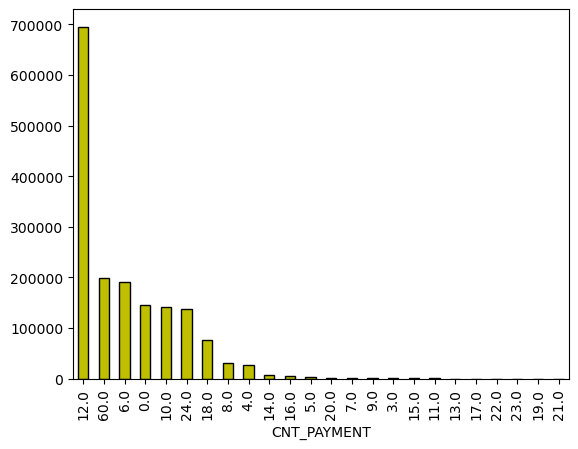

In [623]:
df_previous_data['CNT_PAYMENT'].value_counts().plot.bar(color='y',edgecolor='black')
plt.show()

#### Handling outliers in AMT_APPLICATION

In [625]:
df_previous_data['AMT_APPLICATION'].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

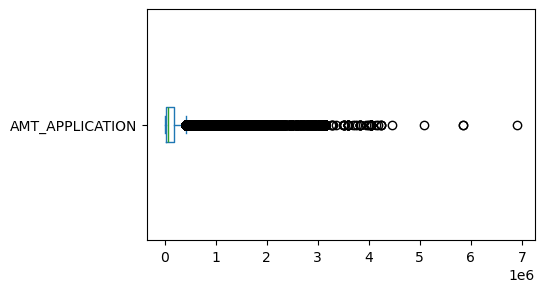

In [627]:
plt.figure(figsize=(5,3))
df_previous_data['AMT_APPLICATION'].plot.box(vert=False)
plt.show()

In [628]:
df_previous_data['AMT_APPLICATION_RANGE'] = pd.cut(df_previous_data['AMT_APPLICATION'],[0,50000,100000,500000,1000000,7000000],labels = ['VL','L','M','H','VH'])

In [629]:
df_previous_data['AMT_APPLICATION_RANGE'].value_counts()

AMT_APPLICATION_RANGE
M     535861
VL    310204
L     285461
H      93598
VH     52688
Name: count, dtype: int64

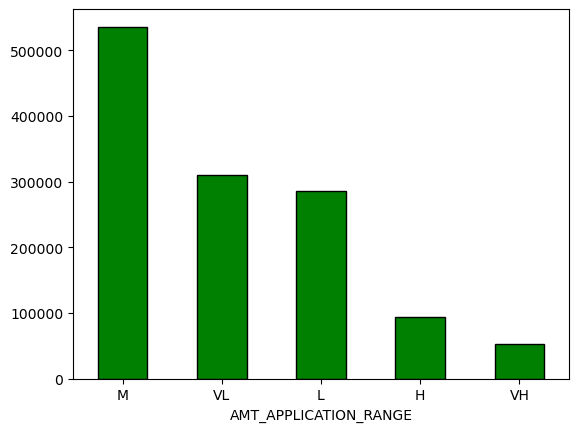

In [630]:
df_previous_data['AMT_APPLICATION_RANGE'].value_counts().plot.bar(color='g',edgecolor='black')
plt.xticks(rotation=0)
plt.show()

## Standardising values

#### 'DAYS_DECISION' and 'SELLERPLACE_AREA' have negative values so changing them into positivs as well as converting DAYS_DECISION into YEARS_DECISION

In [633]:
df_previous_data['YEARS_DECISION'] = abs(df_previous_data['DAYS_DECISION']//365.25).astype(int)

In [634]:
df_previous_data = df_previous_data.drop(['DAYS_DECISION'],axis=1)

In [635]:
df_previous_data['SELLERPLACE_AREA'] = abs(df_previous_data['SELLERPLACE_AREA'] )

### Analysing categorical , numeric and feature category type columns

In [637]:
categorical_features=[feature for feature in df_previous_data.columns if df_previous_data[feature].dtype=="O"]
print(len(categorical_features))
print(categorical_features)


15
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [638]:
numeric_features=[feature for feature in df_previous_data.columns if df_previous_data[feature].dtype!="O" and  df_previous_data[feature].dtype!="category"]
print(len(numeric_features))
print(numeric_features)


11
['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'YEARS_DECISION']


In [639]:
category_feature=[feature for feature in df_previous_data.columns if df_previous_data[feature].dtype == "category" ]
print(len(category_feature))
print(category_feature)                  

4
['AMT_GOODS_PRICE_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE', 'AMT_APPLICATION_RANGE']


In [640]:
df_previous_data.shape

(1670214, 30)

### Merging Application data set and Previous application data set

In [642]:
df_merge = pd.merge(df_app_data,df_previous_data,on='SK_ID_CURR',how='inner',suffixes= ('_APP','_PREV'))

In [643]:
df_merge.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_APP CODE_GENDER FLAG_OWN_CAR  \
0      100002      1             Cash loans           M            N   
1      100003      0             Cash loans           F            N   
2      100003      0             Cash loans           F            N   
3      100003      0             Cash loans           F            N   
4      100004      0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_APP  \
0               Y             0          202500.0        406597.5   
1               N             0          270000.0       1293502.5   
2               N             0          270000.0       1293502.5   
3               N             0          270000.0       1293502.5   
4               Y             0           67500.0        135000.0   

   AMT_ANNUITY_APP  AMT_GOODS_PRICE_APP NAME_INCOME_TYPE  \
0          24700.5             351000.0          Working   
1          35698.5            1129500.0    State servant   
2          35698.5            1129500.0    State servant   
3          35698.5            1129500.0    State servant   
4           6750.0             135000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers                1                     2   
1      Core staff                2                     1   
2      Core staff                2                     1   
3      Core staff                2                     1   
4        Laborers                1                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            1                           0   
3                            1                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           0  Business Entity Type 3      0.262949   
1                           0                  School      0.622246   
2                           0                  School      0.622246   
3                           0                  School      0.622246   
4                           0              Government      0.555912   

   EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0      0.139376                  1134.0                1   
1      0.510853                   828.0                1   
2      0.510853                   828.0                1   
3      0.510853                   828.0                1   
4      0.729567                   815.0                0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_GOODS_PRICE_RANGE_APP  \
0                         1.0                         M   
1                         0.0                        VH   
2                         0.0                        VH   
3                         0.0                        VH   
4                         0.0                         L   

  AMT_INCOME_TOTAL_RANGE AMT_CREDIT_RANGE_APP AMT_ANNUITY_RANGE_APP  \
0                    LOW    

In [645]:
df_merge.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_APP CODE_GENDER FLAG_OWN_CAR  \
0      100002      1             Cash loans           M            N   
1      100003      0             Cash loans           F            N   
2      100003      0             Cash loans           F            N   
3      100003      0             Cash loans           F            N   
4      100004      0        Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_APP  \
0               Y             0          202500.0        406597.5   
1               N             0          270000.0       1293502.5   
2               N             0          270000.0       1293502.5   
3               N             0          270000.0       1293502.5   
4               Y             0           67500.0        135000.0   

   AMT_ANNUITY_APP  AMT_GOODS_PRICE_APP NAME_INCOME_TYPE  \
0          24700.5             351000.0          Working   
1          35698.5            1129500.0    State servant   
2          35698.5            1129500.0    State servant   
3          35698.5            1129500.0    State servant   
4           6750.0             135000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers                1                     2   
1      Core staff                2                     1   
2      Core staff                2                     1   
3      Core staff                2                     1   
4        Laborers                1                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            1                           0   
3                            1                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE  EXT_SOURCE_2  \
0                           0  Business Entity Type 3      0.262949   
1                           0                  School      0.622246   
2                           0                  School      0.622246   
3                           0                  School      0.622246   
4                           0              Government      0.555912   

   EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  \
0      0.139376                  1134.0                1   
1      0.510853                   828.0                1   
2      0.510853                   828.0                1   
3      0.510853                   828.0                1   
4      0.729567                   815.0                0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_GOODS_PRICE_RANGE_APP  \
0                         1.0                         M   
1                         0.0                        VH   
2                         0.0                        VH   
3                         0.0                        VH   
4                         0.0                         L   

  AMT_INCOME_TOTAL_RANGE AMT_CREDIT_RANGE_APP AMT_ANNUITY_RANGE_APP  \
0                    LOW    

In [646]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 67 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  category
 2   NAME_CONTRACT_TYPE_APP       1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_APP               1413701 non-null  float64 
 9   AMT_ANNUITY_APP              1413701 non-null  float64 
 10  AMT_GOODS_PRICE_APP          1413701 non-null  float64 
 11  NAME_INCOME_TYPE             1413701 non-null  object  
 12  NAME_EDUCATION_TYPE         

In [647]:
df_merge.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE_APP              0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT_APP                      0
AMT_ANNUITY_APP                     0
AMT_GOODS_PRICE_APP                 0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
OCCUPATION_TYPE                     0
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
ORGANIZATION_TYPE                   0
EXT_SOURCE_2                        0
EXT_SOURCE_3                        0
DAYS_LAST_PHONE_CHANGE              0
FLAG_DOCUMENT_3                     0
AMT_REQ_CRED

### Handling missing values after merging datasets

In [649]:
df_merge['AMT_CREDIT_RANGE_PREV'].value_counts()

AMT_CREDIT_RANGE_PREV
VERY LOW     516696
LOW          317757
MEDIUM       149135
HIGH          99223
VERY HIGH     54312
Name: count, dtype: int64

In [650]:
df_merge['AMT_CREDIT_RANGE_PREV'].mode()

0    VERY LOW
Name: AMT_CREDIT_RANGE_PREV, dtype: category
Categories (5, object): ['VERY LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY HIGH']

In [651]:
df_merge['AMT_CREDIT_RANGE_PREV'] = df_merge['AMT_CREDIT_RANGE_PREV'].fillna(df_merge['AMT_CREDIT_RANGE_PREV'].mode()[0])

In [652]:
df_merge['AMT_CREDIT_RANGE_PREV'].isnull().sum()

0

In [653]:
df_merge['AMT_APPLICATION_RANGE'].value_counts()

AMT_APPLICATION_RANGE
M     452302
VL    268638
L     243762
H      78490
VH     45207
Name: count, dtype: int64

In [654]:
df_merge['AMT_APPLICATION_RANGE'].mode()

0    M
Name: AMT_APPLICATION_RANGE, dtype: category
Categories (5, object): ['VL' < 'L' < 'M' < 'H' < 'VH']

In [655]:
df_merge['AMT_APPLICATION_RANGE'] = df_merge['AMT_APPLICATION_RANGE'].fillna(df_merge['AMT_APPLICATION_RANGE'].mode()[0])

In [656]:
df_merge['AMT_APPLICATION_RANGE'].isnull().sum()

0

In [657]:
df_merge['AMT_ANNUITY_RANGE_PREV'].value_counts() 

AMT_ANNUITY_RANGE_PREV
VL    1127054
L      246145
M       36944
H        2231
VH         87
Name: count, dtype: int64

In [658]:
df_merge['AMT_ANNUITY_RANGE_PREV'].mode() 

0    VL
Name: AMT_ANNUITY_RANGE_PREV, dtype: category
Categories (5, object): ['VL' < 'L' < 'M' < 'H' < 'VH']

In [659]:
df_merge['AMT_ANNUITY_RANGE_PREV'] = df_merge['AMT_ANNUITY_RANGE_PREV'].fillna(df_merge['AMT_ANNUITY_RANGE_PREV'].mode()[0])

In [660]:
df_merge['AMT_ANNUITY_RANGE_PREV'].isnull().sum()

0

In [661]:
df_merge['AMT_GOODS_PRICE_RANGE_PREV'].value_counts()

AMT_GOODS_PRICE_RANGE_PREV
L     638315
VL    512398
M     133479
H      78542
VH     45207
Name: count, dtype: int64

In [662]:
df_merge['AMT_GOODS_PRICE_RANGE_PREV'].mode()

0    L
Name: AMT_GOODS_PRICE_RANGE_PREV, dtype: category
Categories (5, object): ['VL' < 'L' < 'M' < 'H' < 'VH']

In [663]:
df_merge['AMT_GOODS_PRICE_RANGE_PREV'] = df_merge['AMT_GOODS_PRICE_RANGE_PREV'].fillna(df_merge['AMT_GOODS_PRICE_RANGE_PREV'].mode()[0])

In [664]:
df_merge['AMT_GOODS_PRICE_RANGE_PREV'].isnull().sum()

0

In [665]:
df_merge['AMT_ANNUITY_RANGE_APP'].value_counts()

AMT_ANNUITY_RANGE_APP
VL    711640
L     361789
M     248952
H      89476
VH      1819
Name: count, dtype: int64

In [666]:
df_merge['AMT_ANNUITY_RANGE_APP'].mode()

0    VL
Name: AMT_ANNUITY_RANGE_APP, dtype: category
Categories (5, object): ['VL' < 'L' < 'M' < 'H' < 'VH']

In [667]:
df_merge['AMT_ANNUITY_RANGE_APP'] = df_merge['AMT_ANNUITY_RANGE_APP'].fillna(df_merge['AMT_ANNUITY_RANGE_APP'].mode()[0])

In [668]:
df_merge['AMT_ANNUITY_RANGE_APP'].isnull().sum()

0

In [669]:
df_merge.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE_APP         0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT_APP                 0
AMT_ANNUITY_APP                0
AMT_GOODS_PRICE_APP            0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_3                0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_REQ_CREDIT_BUREAU_YEAR     0
AMT_GOODS_PRICE_RANGE_APP      0
AMT_INCOME

In [670]:
### Finding categorical and numeric and feature Engg. category type columns for ease of analysis:

In [671]:
categorical_features=[feature for feature in df_merge.columns if df_merge[feature].dtype=="O"]
print(len(categorical_features))
print(categorical_features)


25
['NAME_CONTRACT_TYPE_APP', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE_PREV', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [673]:
numeric_features=[feature for feature in df_merge.columns if df_merge[feature].dtype != "O" and df_merge[feature].dtype != "category" ]
print(len(numeric_features))
print(numeric_features)

32
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_APP', 'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_APP', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'SK_ID_PREV', 'AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'YEARS_DECISION']


In [674]:
#after binning new columns type will also be category
category_feature=[feature for feature in df_merge.columns if df_merge[feature].dtype == "category" ]
print(len(category_feature))
print(category_feature)           

10
['TARGET', 'AMT_GOODS_PRICE_RANGE_APP', 'AMT_INCOME_TOTAL_RANGE', 'AMT_CREDIT_RANGE_APP', 'AMT_ANNUITY_RANGE_APP', 'AGE_YEARS_GROUP', 'AMT_GOODS_PRICE_RANGE_PREV', 'AMT_CREDIT_RANGE_PREV', 'AMT_ANNUITY_RANGE_PREV', 'AMT_APPLICATION_RANGE']


In [675]:
df_merge.shape

(1413701, 67)

#### Finding TOP correlation

In [677]:
corr_merge_col = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_APP', 'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_APP', 'CNT_FAM_MEMBERS',  'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE_YEARS', 'YEARS_EMPLOYED',   'AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV', 'CNT_PAYMENT', 'YEARS_DECISION']

In [678]:
corr_merge_cols_target = df_merge[['TARGET'] + [i for i in corr_merge_col]].corr()
corr_merge_cols_target

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
TARGET                     1.000000      0.020338         -0.002152   
CNT_CHILDREN               0.020338      1.000000          0.011814   
AMT_INCOME_TOTAL          -0.002152      0.011814          1.000000   
AMT_CREDIT_APP            -0.023622      0.003015          0.166257   
AMT_ANNUITY_APP           -0.007408      0.029675          0.206288   
AMT_GOODS_PRICE_APP       -0.032562     -0.000850          0.167689   
CNT_FAM_MEMBERS            0.014847      0.877942          0.014119   
AMT_REQ_CREDIT_BUREAU_QRT -0.005179     -0.012545          0.008816   
AGE_YEARS                 -0.074784     -0.364635         -0.025666   
YEARS_EMPLOYED            -0.070765     -0.256278         -0.055445   
AMT_ANNUITY_PREV          -0.015789     -0.032631          0.099077   
AMT_APPLICATION           -0.005583     -0.034237          0.071491   
AMT_CREDIT_PREV           -0.002352     -0.034942          0.070651   
AMT_GOODS_PRICE_PREV      -0.002796     -0.040253          0.076404   
CNT_PAYMENT                0.025629     -0.045960          0.015966   
YEARS_DECISION            -0.040007      0.012774         -0.003750   

                           AMT_CREDIT_APP  AMT_ANNUITY_APP  \
TARGET                          -0.023622        -0.007408   
CNT_CHILDREN                     0.003015         0.029675   
AMT_INCOME_TOTAL                 0.166257         0.206288   
AMT_CREDIT_APP                   1.000000         0.758419   
AMT_ANNUITY_APP                  0.758419         1.000000   
AMT_GOODS_PRICE_APP              0.986105         0.762005   
CNT_FAM_MEMBERS                  0.063287         0.084369   
AMT_REQ_CREDIT_BUREAU_QRT        0.022924         0.002283   
AGE_YEARS                        0.047762        -0.028967   
YEARS_EMPLOYED                  -0.021894        -0.082570   
AMT_ANNUITY_PREV                 0.137996         0.178169   
AMT_APPLICATION                  0.118809         0.112062   
AMT_CREDIT_PREV                  0.116746         0.107646   
AMT_GOODS_PRICE_PREV             0.122087         0.116673   
CNT_PAYMENT                      0.034869        -0.004283   
YEARS_DECISION                   0.060686         0.034779   

                           AMT_GOODS_PRICE_APP  CNT_FAM_MEMBERS  \
TARGET                               -0.032562         0.014847   
CNT_CHILDREN                         -0.000850         0.877942   
AMT_INCOME_TOTAL                      0.167689         0.014119   
AMT_CREDIT_APP                        0.986105         0.063287   
AMT_ANNUITY_APP                       0.762005         0.084369   
AMT_GOODS_PRICE_APP                   1.000000         0.061401   
CNT_FAM_MEMBERS                       0.061401         1.000000   
AMT_REQ_CREDIT_BUREAU_QRT             0.023429        -0.008954   
AGE_YEARS                             0.046059        -0.326214   
YEARS_EMPLOYED                       -0.018822        -0.245880   
AMT_ANNUITY_PREV                      0.139916        -0.004577   
AMT_APPLICATION                       0.120691        -0.005809   
AMT_CREDIT_PREV                       0.117164        -0.005233   
AMT_GOODS_PRICE_PREV                  0.123561        -0.009501   
CNT_PAYMENT                           0.032628        -0.026910   
YEARS_DECISION                        0.062104         0.017386   

                           AMT_REQ_CREDIT_BUREAU_QRT  AGE_YEARS  \
TARGET                                     -0.005179  -0.074784   
CNT_CHILDREN                               -0.012545  -0.364635   
AMT_INCOME_TOTAL                            0.008816  -0.025666   
AMT_CREDIT_APP                              0.022924   0.047762   
AMT_ANNUITY_APP                             0.002283  -0.028967   
AMT_GOODS_PRICE_APP                         0.023429   0.046059   
CNT_FAM_MEMBERS                            -0.008954  -0.326214   
AMT_REQ_CREDIT_BUREAU_QRT                   1.000000   0.021290   
AGE_YEARS              

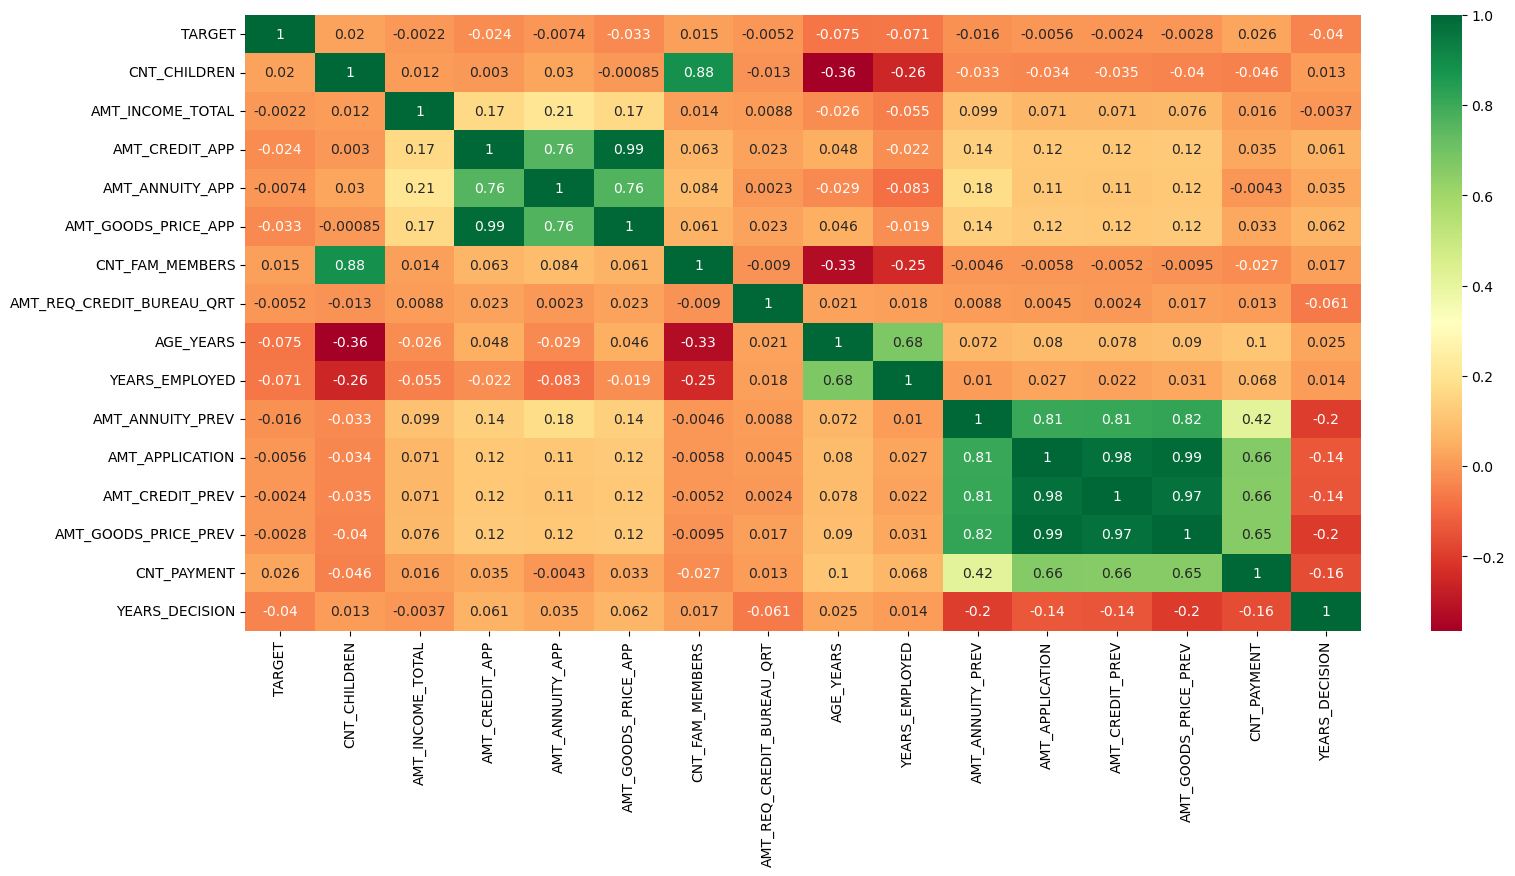

In [679]:
plt.figure(figsize=(18,8))
sns.heatmap(corr_merge_cols_target,annot = True,cmap='RdYlGn')
plt.show()

#### Top 10 correlation(way 2)

In [681]:
corr_merge = df_merge.corr(numeric_only=True).abs()
corr_merge =corr_merge.unstack().sort_values(ascending=False)
corr_merge =corr_merge.dropna()
corr_merge =corr_merge[corr_merge!=1.0]
top_10_corr= corr_merge.head(10)
print(top_10_corr)

AMT_GOODS_PRICE_PREV         AMT_APPLICATION                0.987374
AMT_APPLICATION              AMT_GOODS_PRICE_PREV           0.987374
AMT_GOODS_PRICE_APP          AMT_CREDIT_APP                 0.986105
AMT_CREDIT_APP               AMT_GOODS_PRICE_APP            0.986105
AMT_APPLICATION              AMT_CREDIT_PREV                0.975683
AMT_CREDIT_PREV              AMT_APPLICATION                0.975683
AMT_GOODS_PRICE_PREV         AMT_CREDIT_PREV                0.971417
AMT_CREDIT_PREV              AMT_GOODS_PRICE_PREV           0.971417
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.945596
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.945596
dtype: float64


#### Analysing 'NAME_CASH_LOAN_PURPOSE'

In [683]:
df_merge['NAME_CASH_LOAN_PURPOSE'].value_counts()

NAME_CASH_LOAN_PURPOSE
Unknown                             1354288
Repairs                               20117
Other                                 13432
Urgent needs                           7236
Buying a used car                      2469
Building a house or an annex           2344
Everyday expenses                      2052
Medicine                               1871
Payments on other loans                1573
Education                              1334
Journey                                1042
Purchase of electronic equipment        934
Buying a new car                        886
Wedding / gift / holiday                801
Buying a home                           701
Car repairs                             691
Furniture                               660
Buying a holiday home / land            463
Business development                    359
Gasification / water supply             251
Buying a garage                         116
Hobby                                    45
Money for

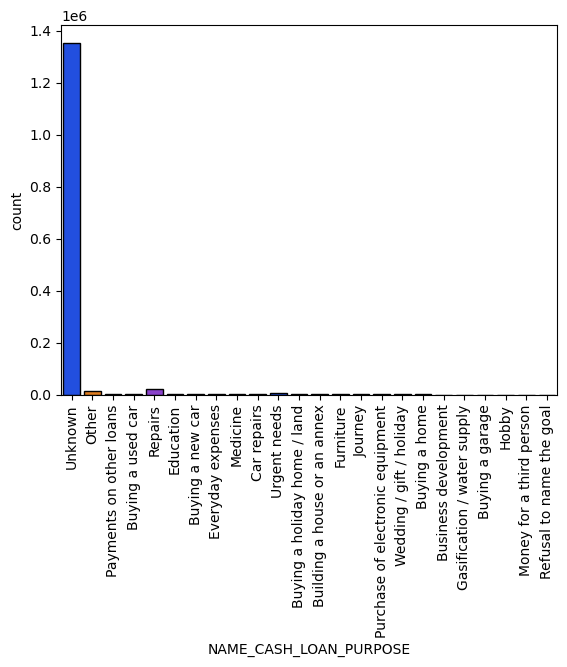

In [684]:
sns.countplot(data=df_merge, x='NAME_CASH_LOAN_PURPOSE',palette='bright',edgecolor='black')
plt.xticks(rotation=90)
plt.show()

#### Insighs:
there are too many unknown values so no clear insight we can observe

#### Analysing 'NAME_CONTRACT_STATUS'

In [687]:
df_merge['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: count, dtype: int64

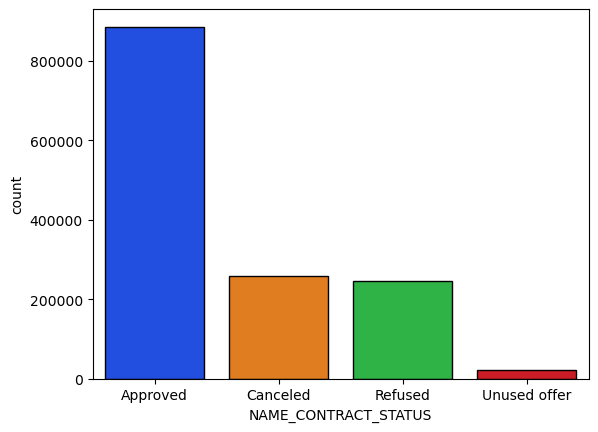

In [688]:
sns.countplot(data=df_merge, x='NAME_CONTRACT_STATUS',palette='bright',edgecolor='black')
plt.show()

#### Insights:
Approved loans are higher in number as compared to others.

#### Analysing ''NAME_PAYMENT_TYPE''

In [691]:
df_merge['NAME_PAYMENT_TYPE'].value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        882700
Unknown                                      522960
Non-cash from your account                     7100
Cashless from the account of the employer       941
Name: count, dtype: int64

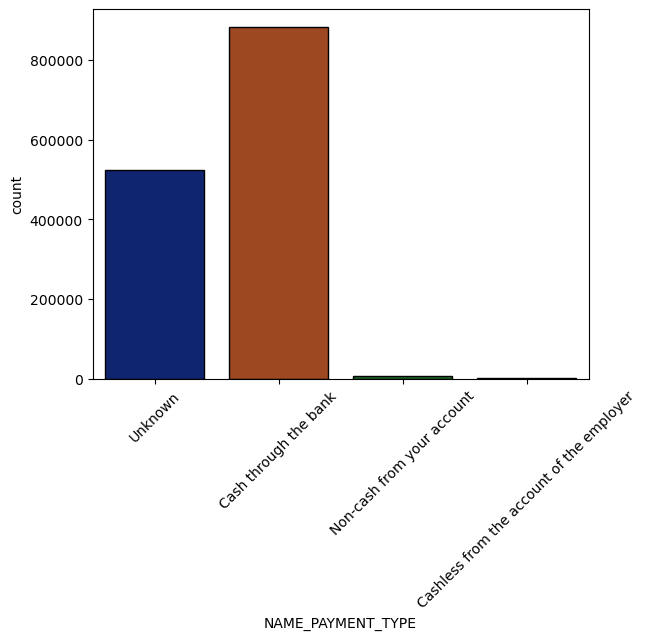

In [692]:
sns.countplot(data=df_merge, x='NAME_PAYMENT_TYPE',palette='dark',edgecolor='black')
plt.xticks(rotation=45)
plt.show()

#### Insights:
mostly clients lie in cash through the bank category.


#### Analysing 'CODE_REJECT_REASON'

In [695]:
df_merge['CODE_REJECT_REASON'].value_counts()

CODE_REJECT_REASON
Unknown    1149911
HC          145984
LIMIT        47773
SCO          32636
CLIENT       22771
SCOFR        10875
VERIF         3079
SYSTEM         672
Name: count, dtype: int64

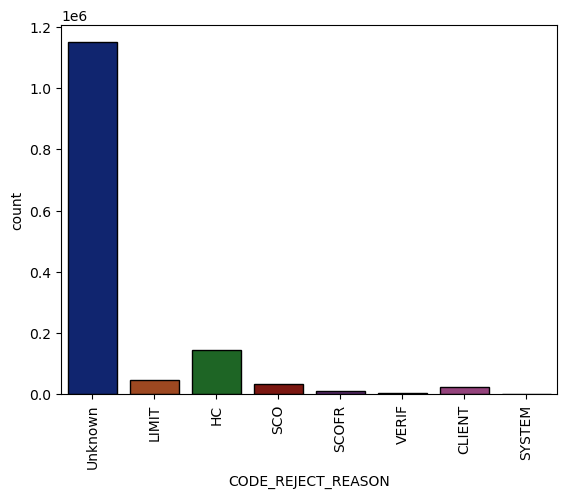

In [696]:
sns.countplot(data=df_merge, x='CODE_REJECT_REASON',palette='dark',edgecolor='black')
plt.xticks(rotation=90)
plt.show()

#### Insights:
1. Code reject reason column also have many unknown values so insights may be biased.
2. Apart from unknown ,it is clearly visible that HC has more values than others.

#### Analysing 'NAME_CLIENT_TYPE'

In [699]:
df_merge['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     1039225
New           259540
Refreshed     114936
Name: count, dtype: int64

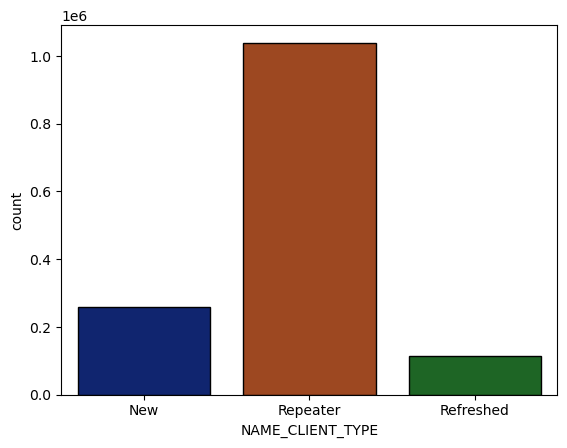

In [700]:
sns.countplot(data=df_merge, x='NAME_CLIENT_TYPE',palette='dark',edgecolor='black')
plt.xticks(rotation=0)
plt.show()

#### Insights:
Mostly clients are repeater.

# Bivariate analysis 

#### As per correalation heatmap plot we can observe top 10 correlation for analysis
1. 'AMT_CREDIT_PREV' Vs 'AMT_GOODS_PRICE_PREV'
2. 'AMT_APPLICATION' Vs'AMT_GOODS_PRICE_PREV'
3. 'AMT_APPLICATION' Vs'AMT_CREDIT_PREV'
4. 'AMT_APPLICATION' Vs 'AMT_ANNUITY_PREV'
5. 'AMT_ANNUITY_PREV' Vs'AMT_GOODS_PRICE_PREV'
6. 'AMT_ANNUITY_PREV' Vs'AMT_CREDIT_PREV'
7. 'CNT_PAYMENT' Vs 'AMT_GOODS_PRICE_PREV'
8. 'CNT_PAYMENT' Vs 'AMT_CREDIT_PREV'
9. 'CNT_PAYMENT' Vs 'AMT_APPLICATION'
10. 'CNT_PAYMENT' Vs 'AMT_ANNUITY_PREV'NG_CLIENT

#### Analysing 'AMT_CREDIT_PREV' Vs'AMT_GOODS_PRICE_PREV'

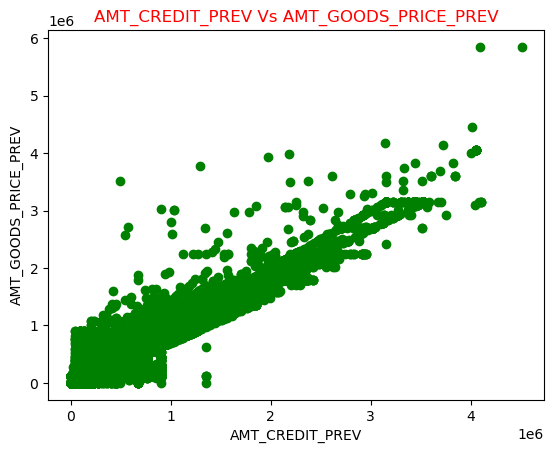

In [705]:
plt.scatter(df_merge['AMT_CREDIT_PREV'],df_merge['AMT_GOODS_PRICE_PREV'],color='green' )
plt.xlabel('AMT_CREDIT_PREV')
plt.ylabel('AMT_GOODS_PRICE_PREV')
plt.title('AMT_CREDIT_PREV Vs AMT_GOODS_PRICE_PREV',color='r')
plt.show()

#### Insights:
1. There is a strong positive correlation.as credit amount increases, amt of goods price also increases. clients who take high amount of loan,buys expensive goods.
2. data points are clusterred at vertical line ,shows correlation.


#### Analysing 'AMT_APPLICATION' Vs'AMT_GOODS_PRICE_PREV'

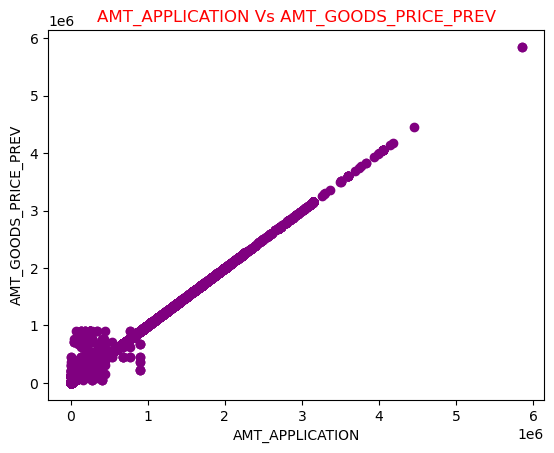

In [709]:
plt.scatter(df_merge['AMT_APPLICATION'],df_merge['AMT_GOODS_PRICE_PREV'],color='purple' )
plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_GOODS_PRICE_PREV')
plt.title('AMT_APPLICATION Vs AMT_GOODS_PRICE_PREV',color='r')
plt.show()

#### Insights:
1. there we can see positive correlation betwwen amt goods price and amt application.
2. As applied amount increases,amount of goods also increases.
3. we can predict like people who take larger loans previously,paid it without any difficulty have more chances to get higher loans in present.


#### Analysing 'AMT_APPLICATION' Vs'AMT_CREDIT_PREV'

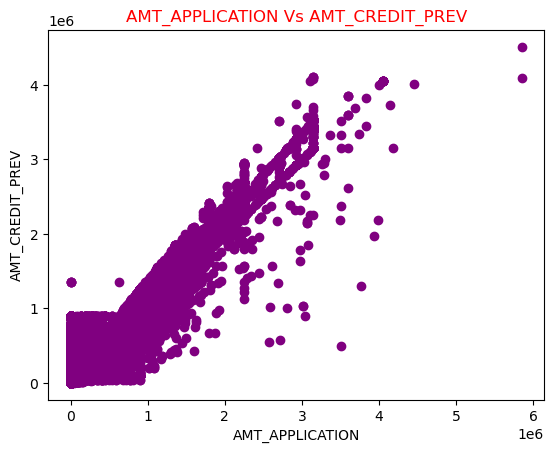

In [712]:
plt.scatter(df_merge['AMT_APPLICATION'],df_merge['AMT_CREDIT_PREV'],color='purple' )
plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_CREDIT_PREV')
plt.title('AMT_APPLICATION Vs AMT_CREDIT_PREV',color='r')
plt.show()

#### Insights:
1. there is a strong correlation between amount credit and amount application .

#### Analysing 'AMT_APPLICATION' Vs 'AMT_ANNUITY_PREV'

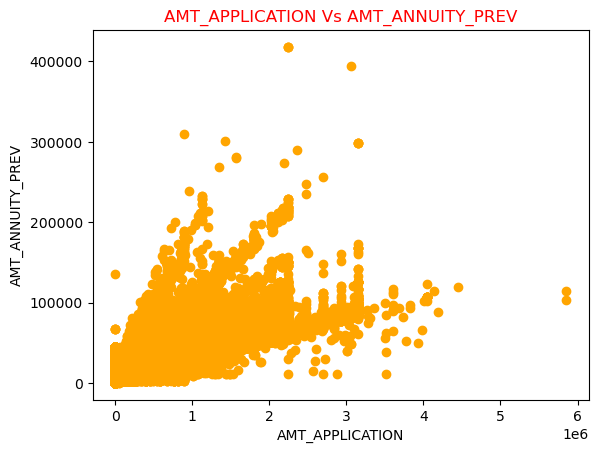

In [715]:
plt.scatter(df_merge['AMT_APPLICATION'],df_merge['AMT_ANNUITY_PREV'],color='orange' )
plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_ANNUITY_PREV')
plt.title('AMT_APPLICATION Vs AMT_ANNUITY_PREV',color='r')
plt.show()

#### Insights:
Here we can see positive correlation between amount application and amount annuity as amount applied increases,amount annuity will also increase.

#### Analysing 'AMT_ANNUITY_PREV' Vs'AMT_GOODS_PRICE_PREV'

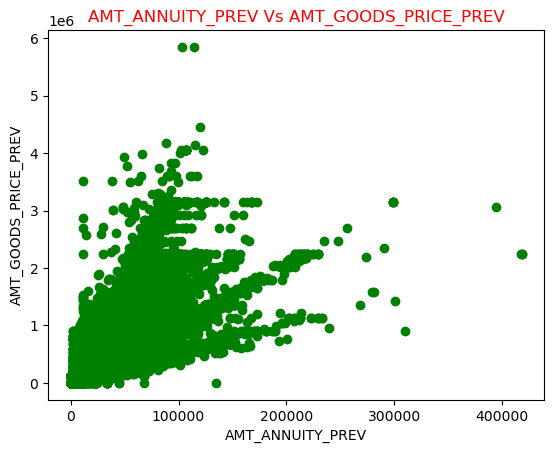

In [718]:
plt.scatter(df_merge['AMT_ANNUITY_PREV'],df_merge['AMT_GOODS_PRICE_PREV'],color='green' )
plt.xlabel('AMT_ANNUITY_PREV')
plt.ylabel('AMT_GOODS_PRICE_PREV')
plt.title('AMT_ANNUITY_PREV Vs AMT_GOODS_PRICE_PREV',color='r')
plt.show()

#### Insights:
There is a positive correlation between amount annuity and amount goods price as amount goods price increases ,annuity will also increase.
There are two outliers are clearly visible.

#### Analysing 'AMT_ANNUITY_PREV' Vs'AMT_CREDIT_PREV'

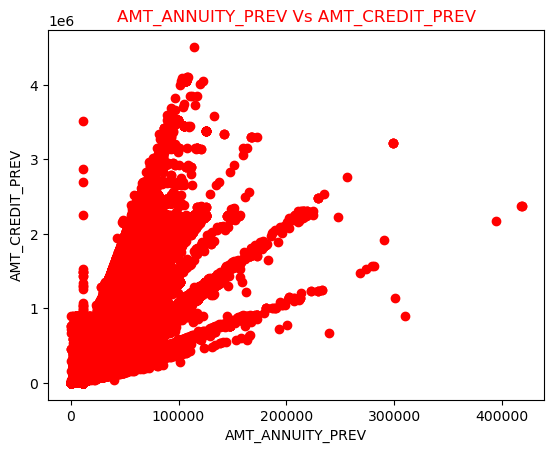

In [722]:
plt.scatter(df_merge['AMT_ANNUITY_PREV'],df_merge['AMT_CREDIT_PREV'],color='red' )
plt.xlabel('AMT_ANNUITY_PREV')
plt.ylabel('AMT_CREDIT_PREV')
plt.title('AMT_ANNUITY_PREV Vs AMT_CREDIT_PREV',color='r')
plt.show()

#### Insights:
There is also a positive correlation between amount annuity and amount credit.

#### Analysing 'AMT_CREDIT_RANGE_PREV'  Vs 'TARGET'

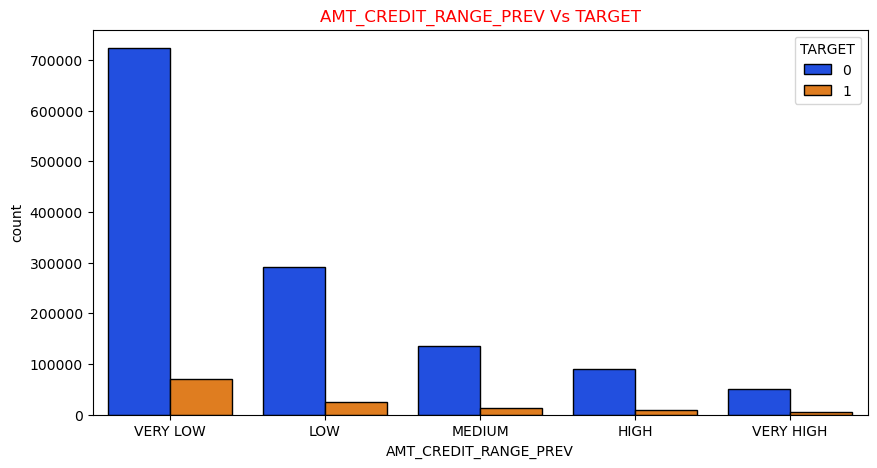

In [725]:
plt.figure(figsize=(10,5))
sns.countplot(x='AMT_CREDIT_RANGE_PREV',data=df_merge,hue='TARGET',palette = 'bright',edgecolor='black' )
plt.title('AMT_CREDIT_RANGE_PREV Vs TARGET',color='r')
plt.show()

#### Insights:
We can see that clients who have very low credit amounts are tend to be defaulters.

#### Analysing 'CNT_PAYMENT' Vs  ['AMT_GOODS_PRICE_PREV','AMT_CREDIT_PREV', 'AMT_APPLICATION','AMT_ANNUITY_PREV']

In [728]:
col_numeric =[ 'AMT_GOODS_PRICE_PREV','AMT_CREDIT_PREV', 'AMT_APPLICATION','AMT_ANNUITY_PREV']

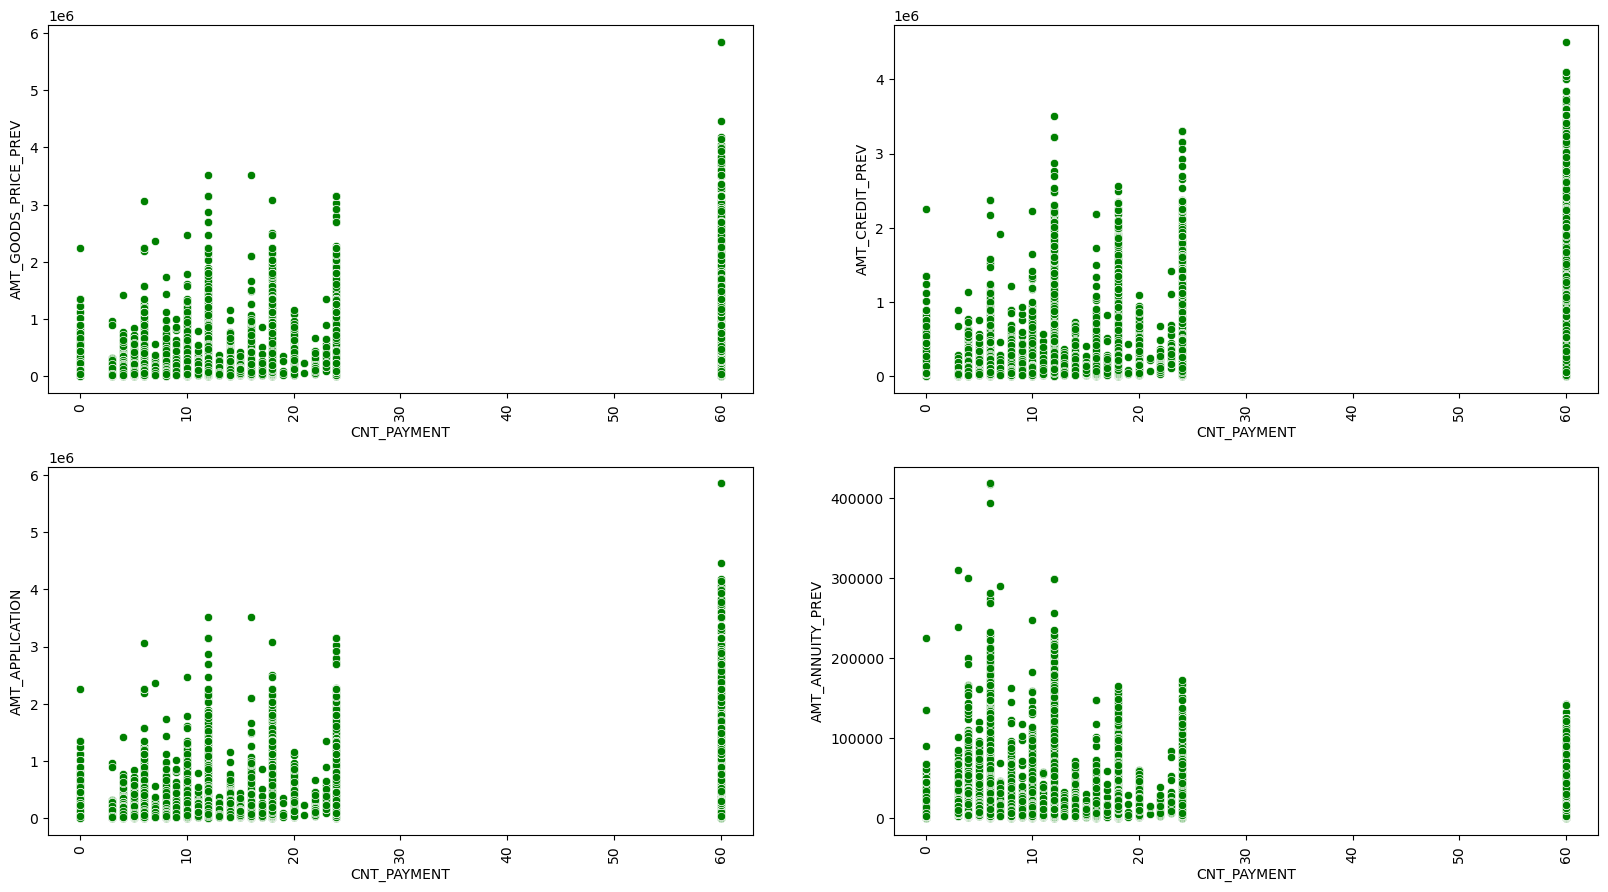

In [729]:
plt.figure(figsize=(20,22))

for i in enumerate([feature for feature in col_numeric]):
    plt.subplot(4, 2, i[0]+1)
    sns.scatterplot(data=df_merge,x='CNT_PAYMENT', y=i[1],color='green')
    plt.xticks(rotation=90)
   

#### Insights:
 most of clients have smaller previous loans but some of have higher previous loans also as we can see data points for higher values of annuity.

# Multivariate Analysis

#### Analysing categorical variables Vs 'NAME_CONTRACT_STATUS'
Name contract status is main parameter which descibes the status of loan. weather loan is approved, reject, cancelled, unused.

In [733]:
#here creating a list of some categorical columns.
col_category = [ 'NAME_INCOME_TYPE','NAME_CLIENT_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',  'NAME_CONTRACT_TYPE_PREV']

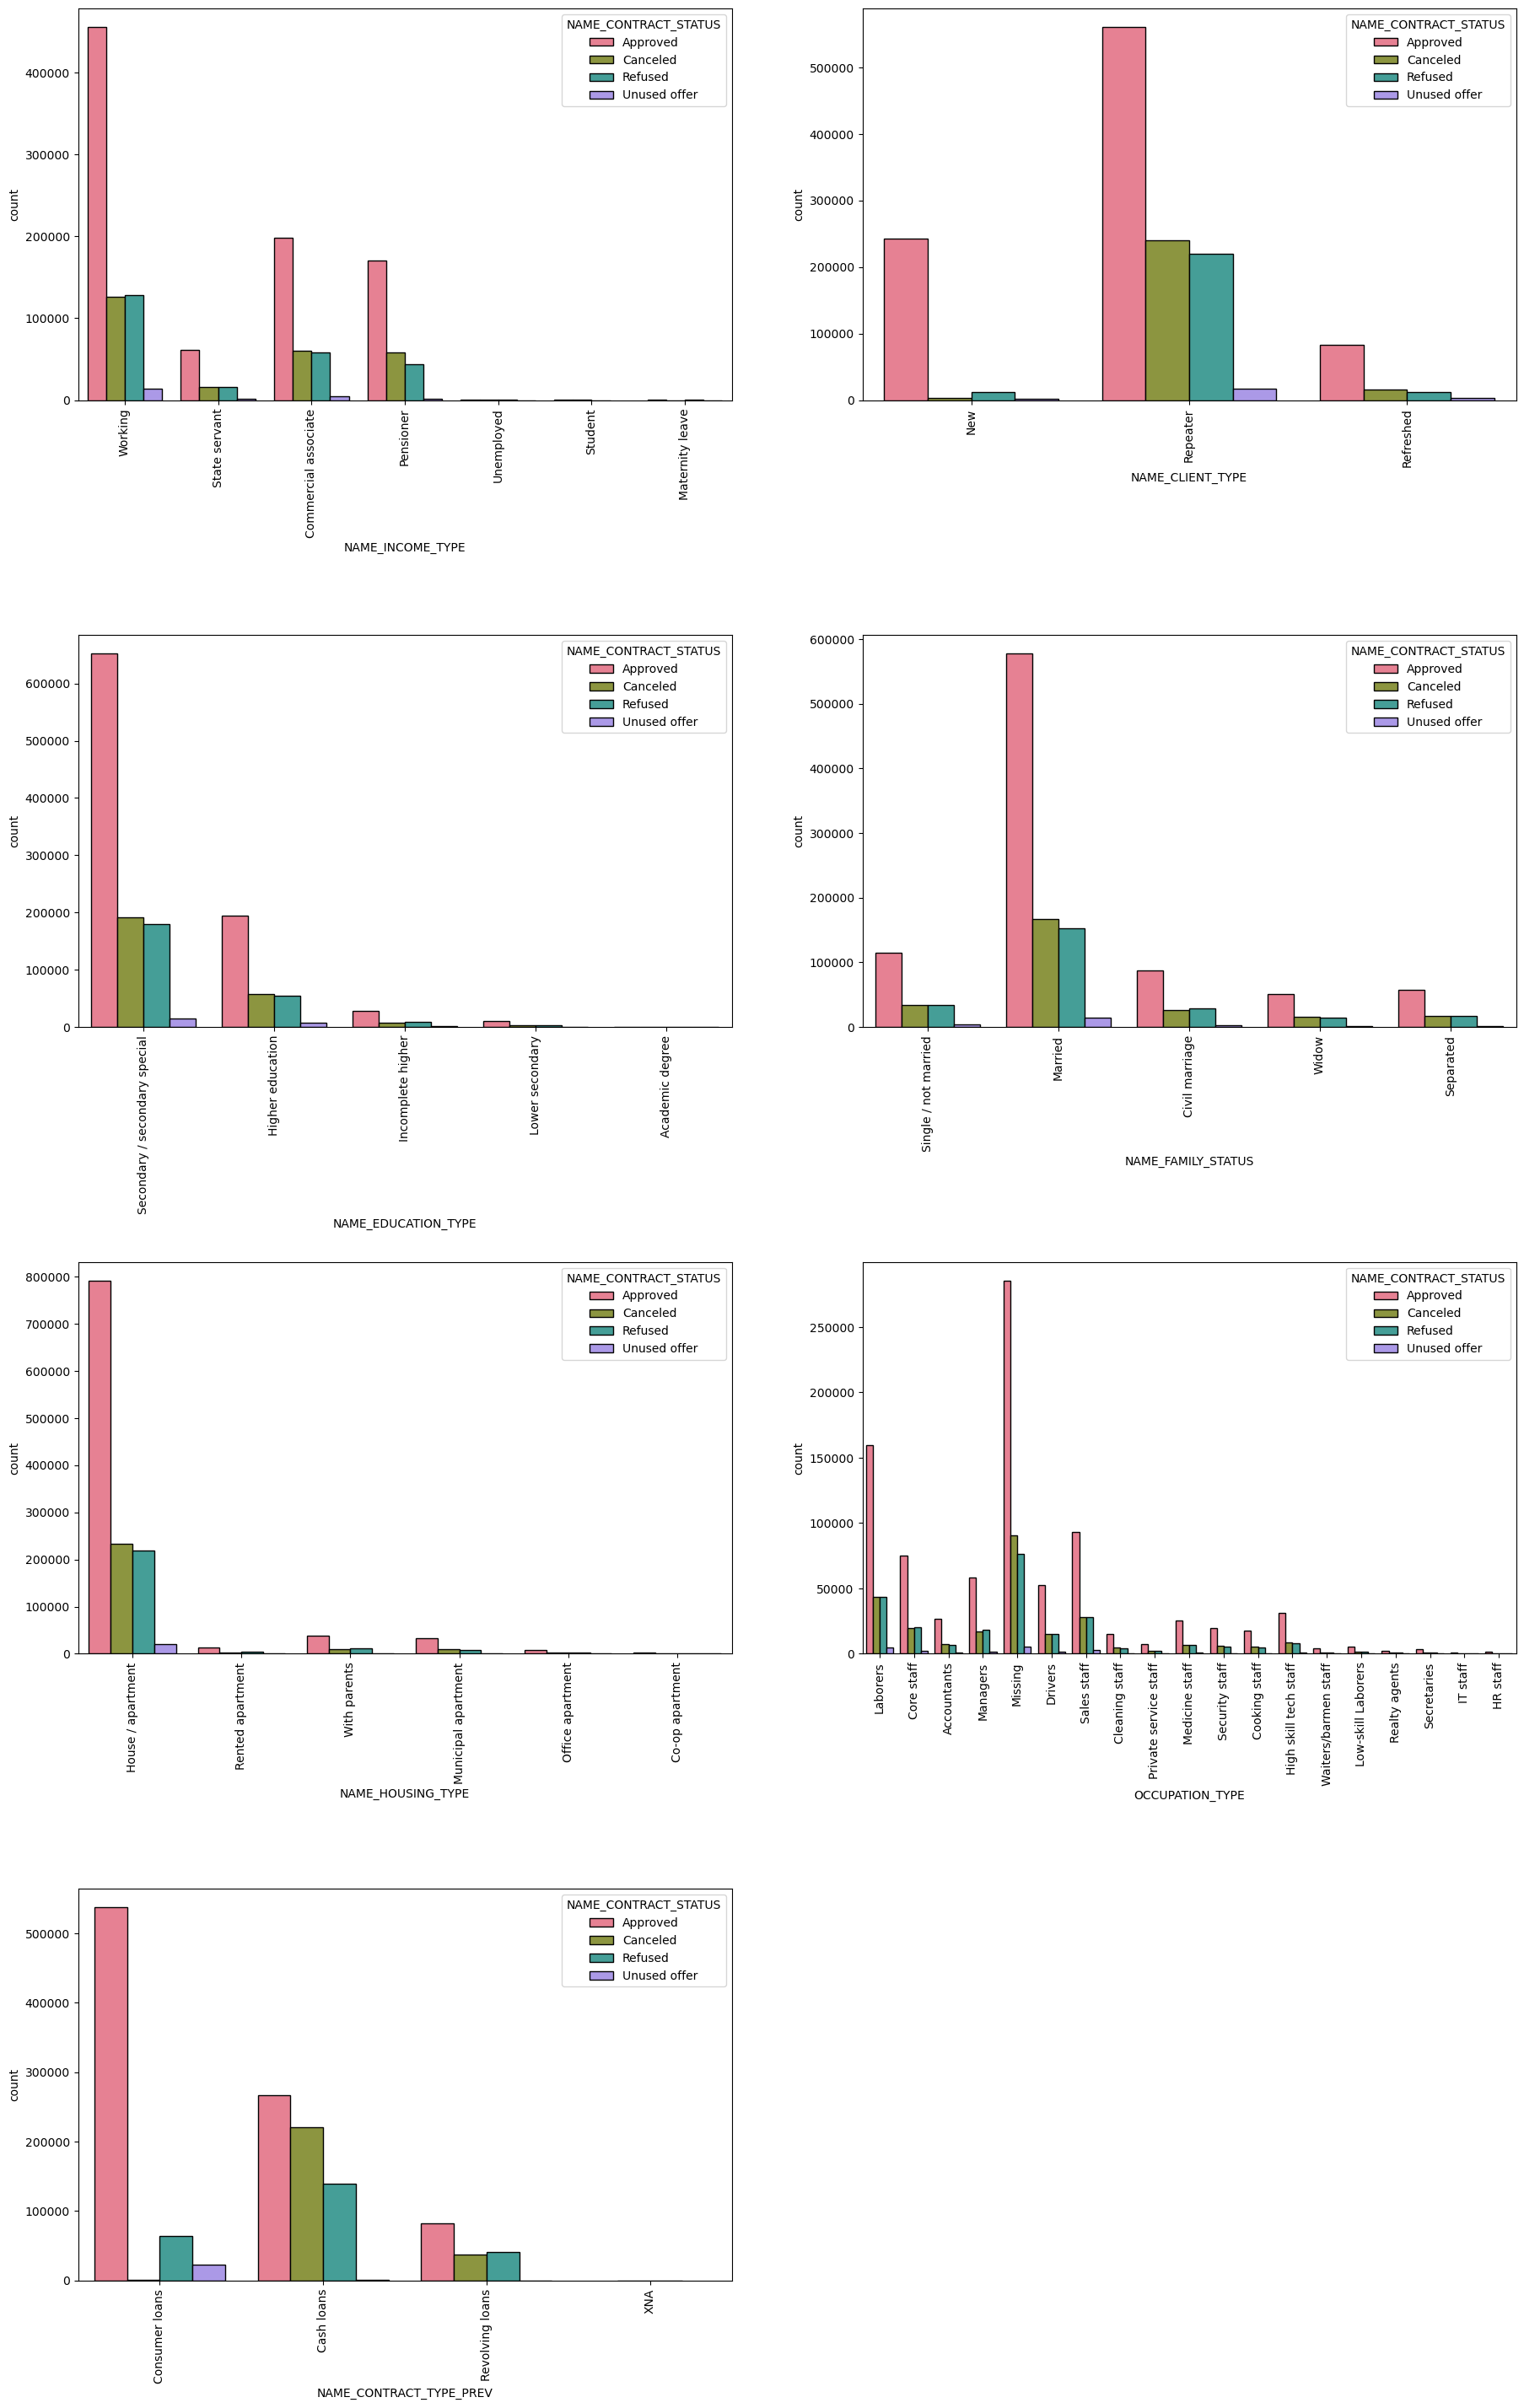

In [734]:
plt.figure(figsize=(22,35))

for i in enumerate([feature for feature in col_category]):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(data=df_merge,x=i[1], hue='NAME_CONTRACT_STATUS',palette='husl',edgecolor='black')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=0.6)
   

#### Insights:
1. We can see in income type category, working individuals loans are approved.The percencentage of working clients are more as compared to others
2. But for rest of categories also, approval rate is high than rejected.
3. Secondary/secondary special clients are more in number and their approval rate is also high.
4. We can see that approval rate is high for repeater clients.
5. Married people's loan approval rate is high as compared to refusal.
6. Clients who owns their house have high approval rate as compared to refusal.
7. Laberors are more in number who applied for loan and their approval rate is also high as compared to refusal.
8. From here we can see that previously bank used to give consumer loans,cash loans ,revolving loans.
9. Approval rate is high for consumer loans.


#### Analysing NAME_CONTRACT_STATUS Vs'TARGET Vs CODE_GENDER

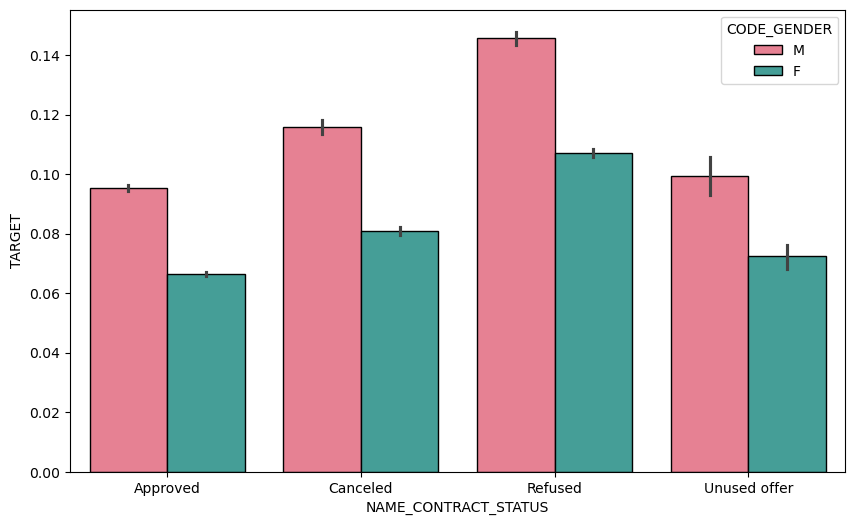

In [737]:
plt.figure(figsize=(10,6))
sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data= df_merge,hue= 'CODE_GENDER',palette='husl',edgecolor='black')
plt.gca().invert_yaxis() 
plt.show()

#### Insights:
1. It is clearly visible that previously male's application are more refused than approved .That means male are most likely to be defaulter .their rejection ration is high as compared to females.
2. Male ratio is high in every category.

#### Analysing NAME_CONTRACT_STATUS Vs'TARGET Vs AMT_INCOME_TOTAL_RANGE 

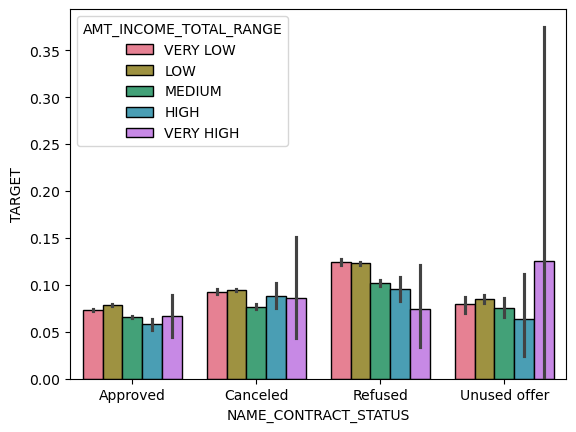

In [740]:

sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data= df_merge,hue= 'AMT_INCOME_TOTAL_RANGE',palette='husl',edgecolor='black')
plt.gca().invert_yaxis() 
plt.show()

#### Insights:
1. We can see that clients who are previously canceled are in low income range.the percentage of low income range category is more than others. 
2. Clients who are previously rejected are in very low and low income range.
3. A very high income range clients previously cancelled their loan at different stage of process(unused offer).



#### Analysing NAME_CONTRACT_STATUS Vs'TARGET Vs NAME_CLIENT_TYPE

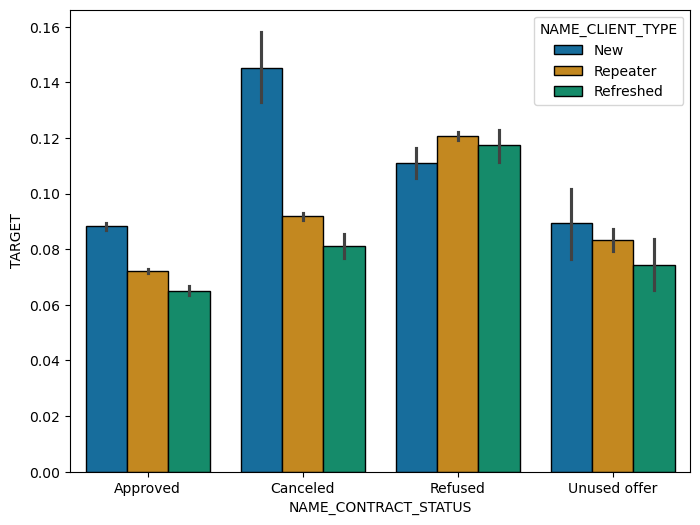

In [744]:
plt.figure(figsize=(8,6))
sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data= df_merge,hue= 'NAME_CLIENT_TYPE',palette='colorblind',edgecolor='black')
plt.gca().invert_yaxis() 
plt.show()

#### Insights:
1. In previously refused status, repeaters are more in numbers than others that means repeaters are likely to default.
2. Mostly new clients applications are approved.
3. New clients have more cancelled application also.


#### Analysing NAME_CONTRACT_STATUS Vs'TARGET Vs AGE_YEARS_GROUP

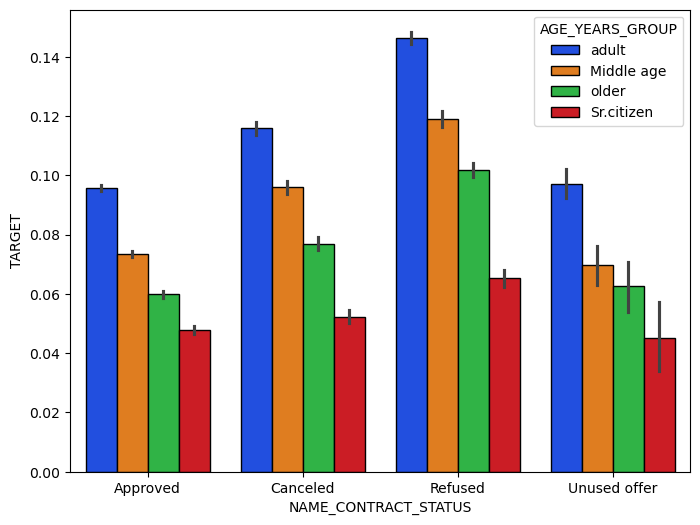

In [747]:
plt.figure(figsize=(8,6))
sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data= df_merge,hue= 'AGE_YEARS_GROUP',palette='bright',edgecolor='black')
plt.gca().invert_yaxis() 
plt.show()

#### Insights:
1. previously adults loan applications are refused more than others.
2. Sr.citizens applications are less refused.
3. Rest in each category,adults ratio is high than others.

#### Analysing NAME_CONTRACT_STATUS Vs'TARGET Vs 'NAME_PORTFOLIO'

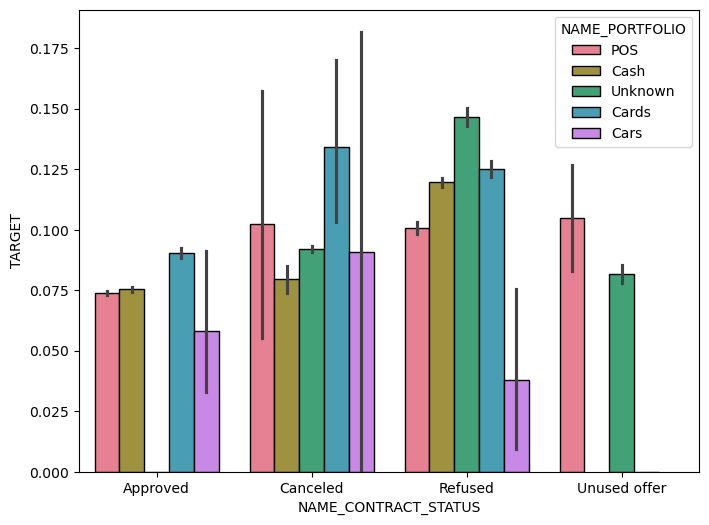

In [750]:
plt.figure(figsize=(8,6))
sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data= df_merge,hue= 'NAME_PORTFOLIO',palette='husl',edgecolor='black')
plt.gca().invert_yaxis() 
plt.show()

#### Insights:
1. previously people who used cards and cash for taking loans are likely to be rejected. we are not considering unknown data.
2. There is slight difference between cards and cash ,cards ratio is bit more than cash.


# Conclusion:

### As data is highly imbalanced so analysis can be biased .
As per data given here are some observations made by me:
1.  Clients with lower income group are likely to be defaulters. In other words we can sat that lower income salary people can not repay loans ,they will face some difficulty.
2.  Banks should check those clients properly who were previosly defaulted.
3.  Bank should check status of married people having more number of children as they can be defaulter.
4.  Clients with higher education are les likely to default so banl should consider their application more as compared to secondary education people.
5.  Banks should focus on sactioning revolving loans as cash loans have more number of defaulters.
6.  Banks should focus on new clients more rather than repeaters.
7.  Clients in adult age group are likely to default so we can predict that may be at young age they are not settled much .after age 35 people are more likely to be settled .
 